# PID with Cherenkov Radiation

In [2]:
#Import necesary modules to run the code
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
   
from matplotlib import rc
import matplotlib
from matplotlib.ticker import MultipleLocator
import math
import scipy
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from numpy import sqrt, sin, cos, pi
import csv
import time

<font size=5>

Non-relativistic approx: 
    
The kinetic energy of the particle is approximated with the classical formula, 
    
$$ 
T = \frac{1}{2} mv^2 = \frac{1}{2} mc^2 \beta^2 
$$

Therefore, $$\beta = \sqrt{\frac{2T}{mc^2}}$$

Momentum of a Particle, 
$$
p = \frac{mc\beta}{\sqrt{1-\beta^{2}}} 
$$

Cerenkov angle can be calculated from,
$$
cos\theta = \frac{1}{\beta n}= \frac{\sqrt{(1+\frac{m^{2}c^{2}}{p^{2}})}}{n} = \frac{\sqrt{(1+\frac{mc^{2}}{2T})}}{n}
$$

where, $\theta$ is the Cerenkov angle

    
    
Relativistic approach:
    
We take the full relativistic formula for the kinetic energy (T) thus $\beta$,  

$$ T = \gamma mc^2 - mc^2 = (\gamma - 1) mc^2 $$  
$$ \gamma = 1 + \frac{T}{mc^2} = \frac{1}{\sqrt{(1- \beta^2)}} $$

$$
\beta = \sqrt{1 - \frac{1}{(1 + \frac{T}{mc^2})^2}} 
$$

Cherenkov angle can be calculated from,
$$
cos\theta = \frac{1}{\beta n}= \frac{1}{(\sqrt{1 - \frac{1}{(1 + \frac{T}{mc^2})^2}}) n}   %= \frac{\sqrt{(1+\frac{mc^{2}}{2T})}}{n}
$$
    

1.)  Relativistic vs nonrelativistic Bethe-Bloch
2.)  NIST vs Bethe-Bloch (stopping power curves)
    
The average energy loss per unit length for the particle travelling in LAr can be found from the Bethe-Bloch equation, 
$$
-\frac{dE}{dx} = K\frac{\rho Z}{A} \frac{z^2}{\beta^2} [ln \space (\frac{2m_{e}c^2\gamma^2\beta^2}{I}) - \beta^2] = \frac{k_{1}}{\beta^2} ln(k_{2} \frac{\beta^2}{1-\beta^2}) - k_{1}
$$

Here, 
$ k_{1} =  K\frac{\rho Z}{A} z^2 $ and  $ k_{2} = \frac{2m_{e}c^2}{I} $

where, z is the charge of the travelling particle; $\rho$ is the density of LAr, Z is its atomic number and A atomic mass. 

Mean excitation potential For LAr, I = 23.6 eV 

The constant K is given by, 

$$ K = \frac{4\pi a^2 (\hbar c)^2 N_{A} (10^3 kg)}{m_{e} c^2} = 30.7 \space keVm^2/kg = 0.0307 \space MeVm^2/kg = 0.307 \space MeVcm^2/g $$ 
    

# Cherenkov Angle & PID

0.7299270072992701 1.4630040626110135 0.4342978107291306
(1000,) (1000,)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_14292\349866812.py:63: RuntimeWarning: divide by zero encountered in divide
  thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_14292\349866812.py:63: RuntimeWarning: invalid value encountered in arccos
  thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_14292\349866812.py:83: RuntimeWarning: divide by zero encountered in divide
  thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_14292\349866812.py:83: RuntimeWarning: invalid value encountered in arccos
  thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_14292\349866812.py:93: RuntimeWarning: divide by zero encountered in divide
  thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
C:\

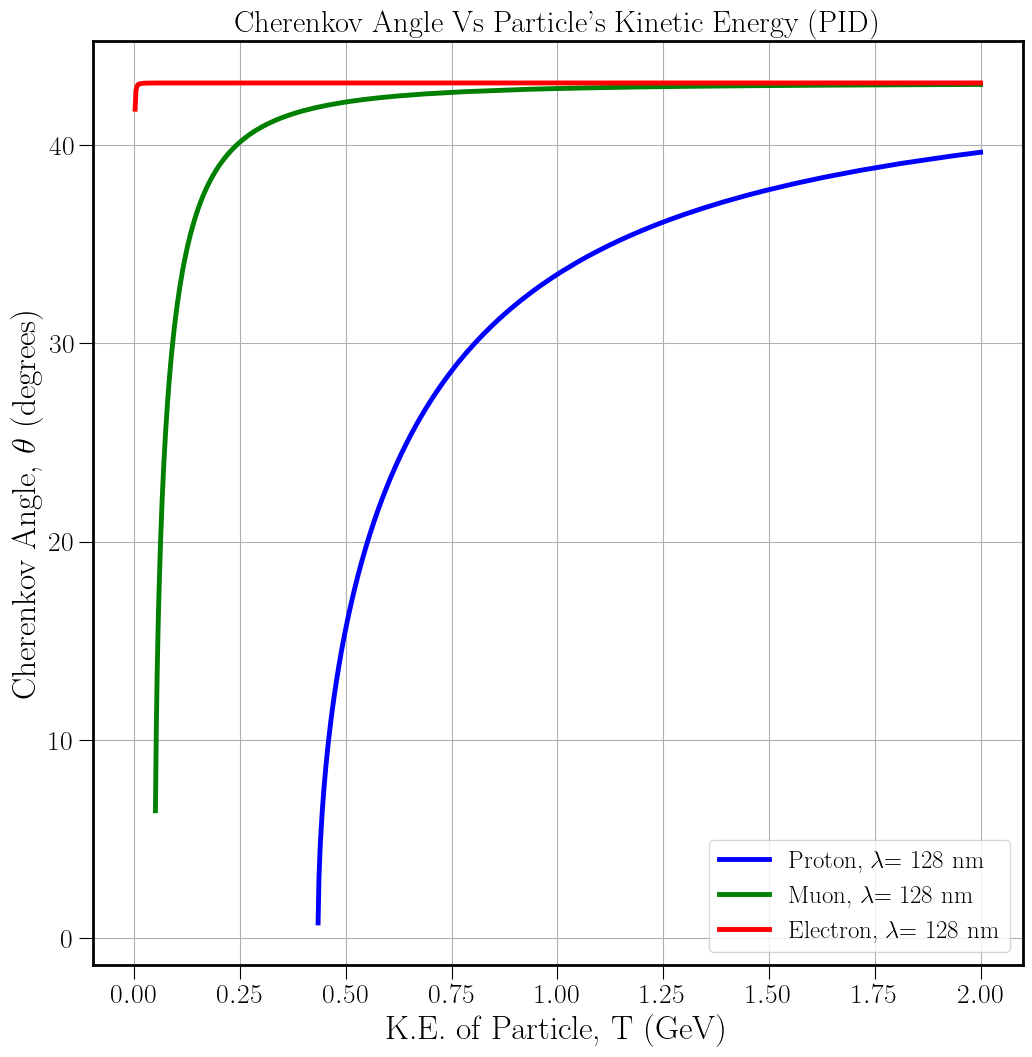

In [3]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the scintillation wavelength of 128 nm)

c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
m = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV

    
t = np.linspace(0, 2000, 1000) #K.E of Proton  in MeV
# t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

tgev= t/1000  #1 GeV = 1.602e-10 J

# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)



# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

mom= (m*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 


def thetap(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
    
    return thetap

cer_angp = thetap(t,n)*(180/np.pi) #Converting radian in degree

# Create a boolean mask where True indicates non-NaN values
# valid_values = ~np.isnan(cer_angp)
# valid_values = ~np.isnan(cer_angp)

# Use the mask to filter the array
# cer_angp = cer_angp[valid_values]

print(np.shape(tgev), np.shape(cer_angp))
# print(tgev, cer_angp)


def thetamu(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
    
    return thetamu

cer_angmu = thetamu(t,n)*(180/np.pi) #Converting radian in degree


def thetae(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
    
    return thetae

cer_ange = thetae(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev, cer_angp, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_angmu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(momgev, cer_angp, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(momgev, cer_angmu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(momgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.set_title(r"Cherenkov Angle Vs Proton's Momentum (PID)", fontsize=22)
ax.set_title(r"Cherenkov Angle Vs Particle's Kinetic Energy (PID)", fontsize=22)

ax.set_xlabel(r"K.E. of Particle, T (GeV)",fontsize=24)
# ax.set_xlabel(r"Momentum of Particle, T (GeV)",fontsize=24)
ax.set_ylabel(r"Cherenkov Angle, $\theta$ (degrees)",fontsize=24) #

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov Angle_vs_Protons_Kinetic_Energy_leq1GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Electrons_Kinetic_Energy_leq2GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Particles_Kinetic_Energy_leq2GeV_PID.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Particles_Momentum_leq2GeV_PID.jpg", bbox_inches= 'tight')

0.7299270072992701 1.4630040626110135 0.4342978107291306
(1000,) (1000,)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_1520\212432354.py:70: RuntimeWarning: divide by zero encountered in divide
  thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_1520\212432354.py:70: RuntimeWarning: invalid value encountered in arccos
  thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_1520\212432354.py:90: RuntimeWarning: divide by zero encountered in divide
  thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_1520\212432354.py:90: RuntimeWarning: invalid value encountered in arccos
  thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_1520\212432354.py:100: RuntimeWarning: divide by zero encountered in divide
  thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
C:\User

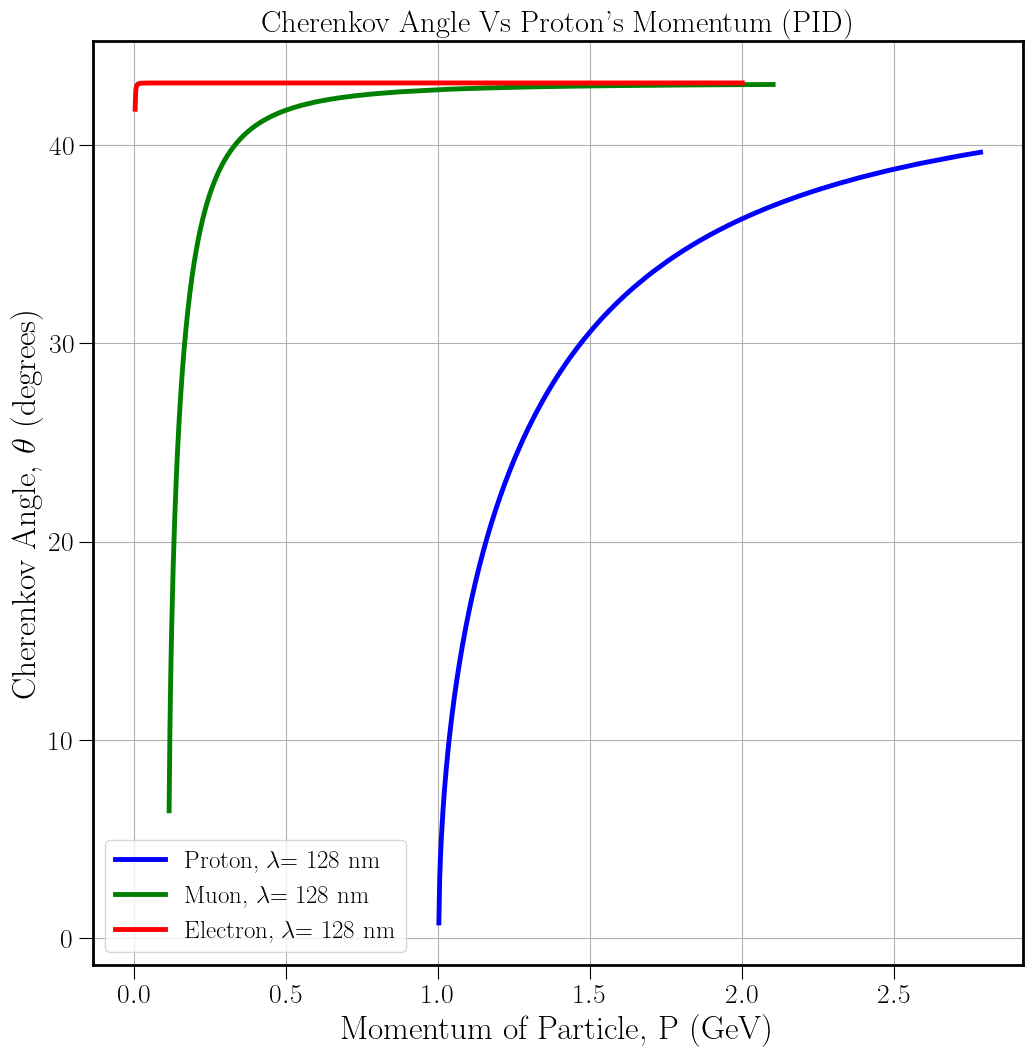

In [40]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the scintillation wavelength of 128 nm)

c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mu = 1.88e-28  #mass of a muon is approximately 1.883531627 x 10^-28 kg. This is about 207 times the mass of an electron.
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
p = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV

    
t = np.linspace(0, 2000, 1000) #K.E of Proton  in MeV
# t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

tgev= t/1000  #1 GeV = 1.602e-10 J

# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)



# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

momp = (p*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
mompgev= momp/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

mommu = (mu*c*betamu)*(1-betamu**2)**(-0.5)  #momentum of proton in kgm/s
mommugev= mommu/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

mome = (e*c*betae)*(1-betae**2)**(-0.5)  #momentum of proton in kgm/s
momegev= mome/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 


def thetap(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetap = np.arccos(np.round((1/(betap*n)),5))    #theta= cerenkov angle
    
    return thetap

cer_angp = thetap(t,n)*(180/np.pi) #Converting radian in degree

# Create a boolean mask where True indicates non-NaN values
# valid_values = ~np.isnan(cer_angp)
# valid_values = ~np.isnan(cer_angp)

# Use the mask to filter the array
# cer_angp = cer_angp[valid_values]

print(np.shape(tgev), np.shape(cer_angp))
# print(tgev, cer_angp)


def thetamu(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetamu = np.arccos(np.round((1/(betamu*n)),5))    #theta= cerenkov angle
    
    return thetamu

cer_angmu = thetamu(t,n)*(180/np.pi) #Converting radian in degree


def thetae(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
    
    return thetae

cer_ange = thetae(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


# ax.plot(tgev, cer_angp, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(tgev, cer_angmu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(tgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

ax.plot(mompgev, cer_angp, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(mommugev, cer_angmu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(momegev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_title(r"Cherenkov Angle Vs Proton's Momentum (PID)", fontsize=22)
# ax.set_title(r"Cherenkov Angle Vs Particle's Kinetic Energy (PID)", fontsize=22)

# ax.set_xlabel(r"K.E. of Particle, T (GeV)",fontsize=24)
ax.set_xlabel(r"Momentum of Particle, P (GeV)",fontsize=24)
ax.set_ylabel(r"Cherenkov Angle, $\theta$ (degrees)",fontsize=24) #

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov Angle_vs_Protons_Kinetic_Energy_leq1GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Electrons_Kinetic_Energy_leq2GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Particles_Kinetic_Energy_leq2GeV_PID.jpg", bbox_inches= 'tight')
plt.savefig("Cherenkov Angle_vs_Particles_Momentum_leq2GeV_PID.jpg", bbox_inches= 'tight')

0.7299270072992701 1.4630040626110135 0.4342978107291306


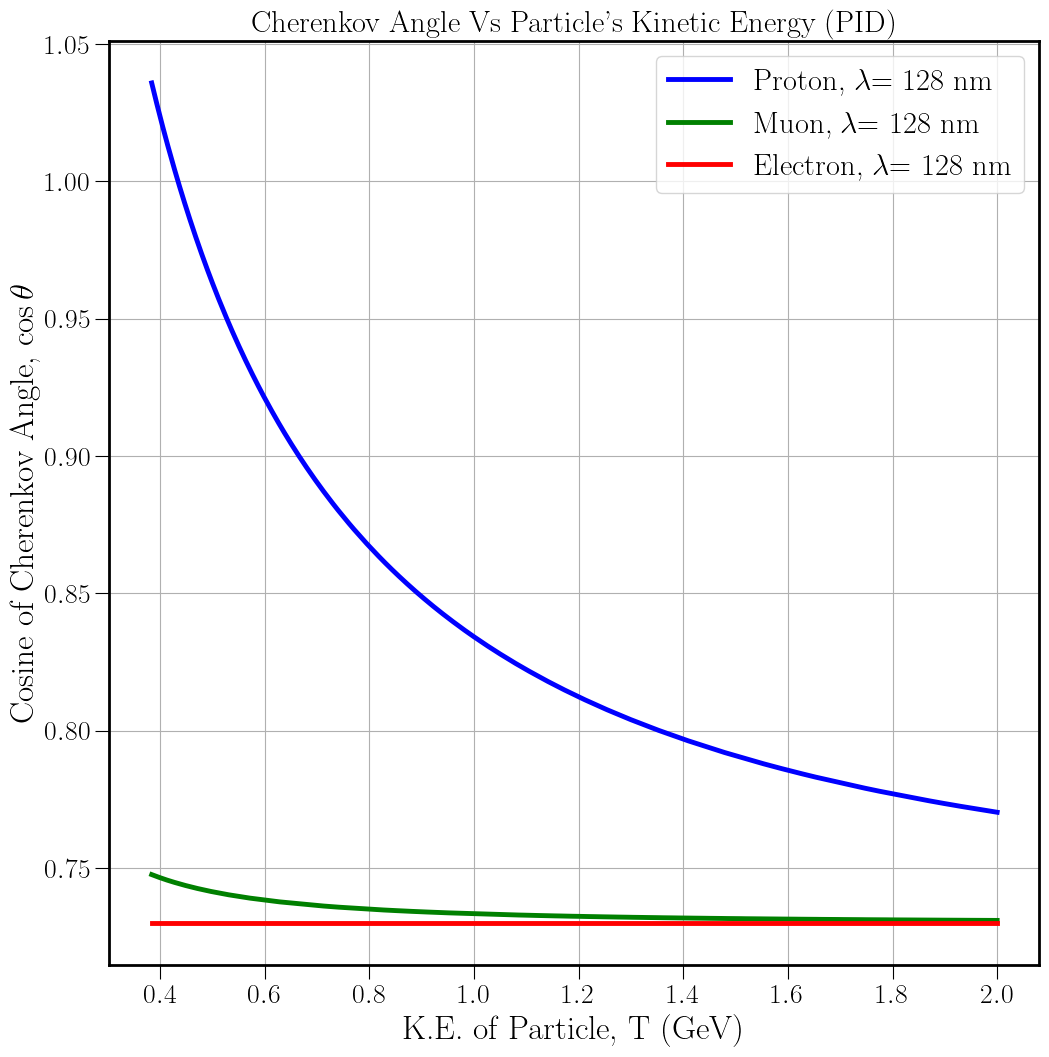

In [5]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the scintillation wavelength of 128 nm)

c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
m = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV

    
t = np.linspace(384, 2000, 1000) #K.E of Proton  in MeV
# t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

tgev= t/1000  #1 GeV = 1.602e-10 J
# print('t = {}'.format(t))
# t=500
# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)

# print(betap, betamu, betae)
# print(1/(betap*n)) #, 1/(betamu*n), 1/(betae*n))


# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

mom= (m*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 


def costhetap(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    costhetap = np.round((1/(betap*n)),5)    #theta= cerenkov angle
    
    return costhetap

costhetap = costhetap(t,n)

# print(costhetap)

# plt.plot(t,costhetap)

# cer_angp = thetap(t,n)*(180/np.pi) #Converting radian in degree

# Create a boolean mask where True indicates non-NaN values
# valid_values = ~np.isnan(cer_angp)
# valid_values = ~np.isnan(cer_angp)

# Use the mask to filter the array
# cer_angp = cer_angp[valid_values]

# print(np.shape(tgev), np.shape(cer_angp))
# print(tgev, cer_angp)


def costhetamu(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    costhetamu = np.round((1/(betamu*n)),5)    #theta= cerenkov angle
    
    return costhetamu

costhetamu = costhetamu(t,n)
# cer_angmu = thetamu(t,n)*(180/np.pi) #Converting radian in degree
# print(costhetamuc)

def costhetae(t,n):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    costhetae = np.round((1/(betae*n)),5)   #theta= cerenkov angle
    
    return costhetae

costhetae = costhetae(t,n)


# cer_ange = thetae(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev, costhetap, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, costhetamu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, costhetae, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(momgev, cer_angp, color='b', lw=3.5, label="Proton, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(momgev, cer_angmu, color='g', lw=3.5, label="Muon, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])
# ax.plot(momgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.set_title(r"Cherenkov Angle Vs Proton's Momentum (PID)", fontsize=22)
ax.set_title(r"Cherenkov Angle Vs Particle's Kinetic Energy (PID)", fontsize=22)

ax.set_xlabel(r"K.E. of Particle, T (GeV)",fontsize=24)
# ax.set_xlabel(r"Momentum of Particle, T (GeV)",fontsize=24)
ax.set_ylabel(r"Cosine of Cherenkov Angle, $\cos \theta$",fontsize=24) #

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=22)
# plt.savefig("Cherenkov Angle_vs_Protons_Kinetic_Energy_leq1GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Electrons_Kinetic_Energy_leq2GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov Angle_vs_Particles_Kinetic_Energy_leq2GeV_PID.jpg", bbox_inches= 'tight')
# plt.savefig("Cosine_Cherenkov Angle_vs_Particles_KE_leq2GeV_PID.jpg", bbox_inches= 'tight')


[ 0.97908842  0.9870936   0.99520243  1.00341758  1.01174183  1.02017803
  1.02872916  1.03739831  1.04618869  1.05510362  1.06414656  1.0733211
  1.08263097  1.09208006  1.10167242  1.11141223  1.1213039   1.13135199
  1.14156126  1.15193667  1.16248342  1.17320691  1.18411281  1.19520703
  1.20649576  1.21798547  1.22968294  1.24159529  1.25372997  1.26609481
  1.278698    1.2915482   1.30465448  1.31802639  1.331674    1.3456079
  1.3598393   1.37437999  1.38924247  1.40443994  1.41998638  1.43589658
  1.45218628  1.46887214  1.48597189  1.50350441  1.52148978  1.53994946
  1.55890632  1.57838485  1.59841125  1.61901361  1.64022209  1.66206914
  1.68458967  1.70782137  1.73180494  1.75658444  1.78220766  1.80872652
  1.83619753  1.86468239  1.89424851  1.92496983  1.95692759  1.99021127
  2.02491976  2.06116263  2.09906167  2.13875272  2.18038779  2.2241377
  2.2701951   2.31877827  2.37013562  2.42455135  2.4823523   2.54391659
  2.60968445  2.68017205  2.75598916  2.83786231  2.92

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_9292\1527723357.py:12: RuntimeWarning: divide by zero encountered in power
  mom= (m*c*beta)*(1-beta**2)**(-0.5)  #momentum of proton in kgm/s


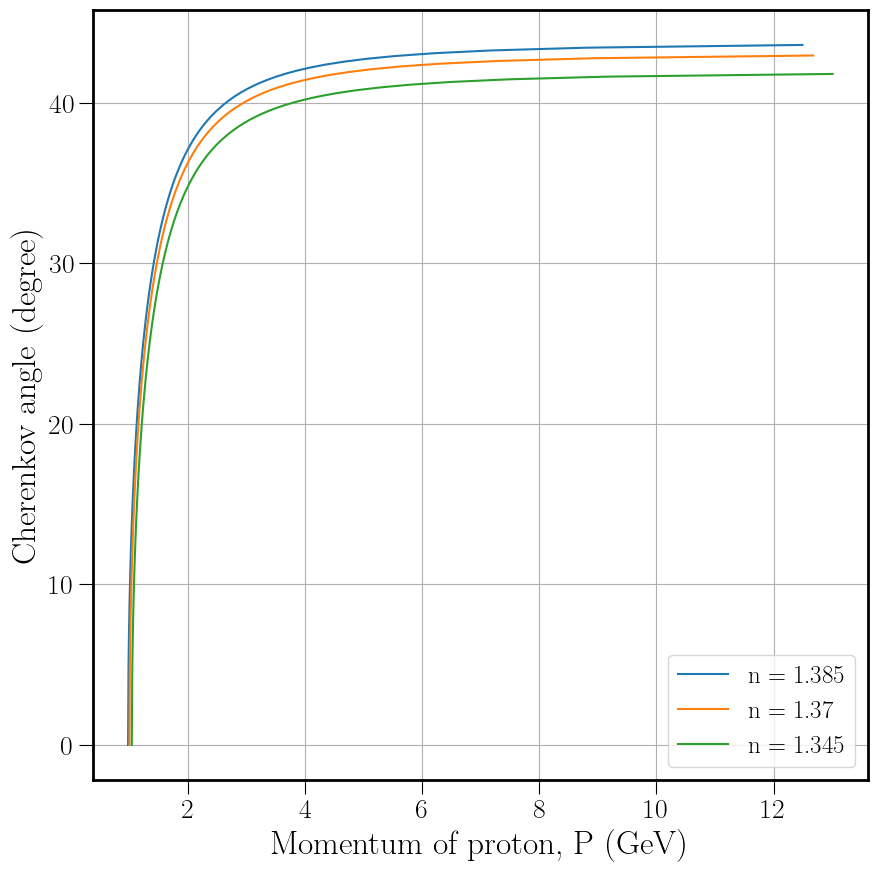

In [15]:
m = 1.67e-27  #mass of proton in Kg
c= 3e8  #speed of light in m/s
n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                   #https://arxiv.org/abs/2002.09346
betamin= 1/n
beta= np.linspace(betamin,1,100)  #beta= v/c

#beta[:,n] All rows in n-th column 


#m= 1.67e-27*((1-beta**2)**(-0.5))  #m = relativistic mass of proton 
mom= (m*c*beta)*(1-beta**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #1 GeV = 5.34e-19 kgm/s
print(momgev[:,0]) #Momentum of proton in GeV 

def theta(mom,n):
    theta= np.arccos(np.round(((1+(m**2*c**2/mom**2))**0.5*n**(-1)),5))     #theta= cerenkov angle
    return theta
cer_ang= theta(mom,n)*(180/np.pi) #Converting radian to degree


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)

ax.plot(momgev[:,0],cer_ang[:,0],label="n = {}".format(n[0]))
ax.plot(momgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
ax.plot(momgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Momentum of proton, P (GeV)",fontsize=24)
ax.set_ylabel('Cherenkov angle (degree)',fontsize=24)
              
ax.grid()

ax.legend(fontsize=18)


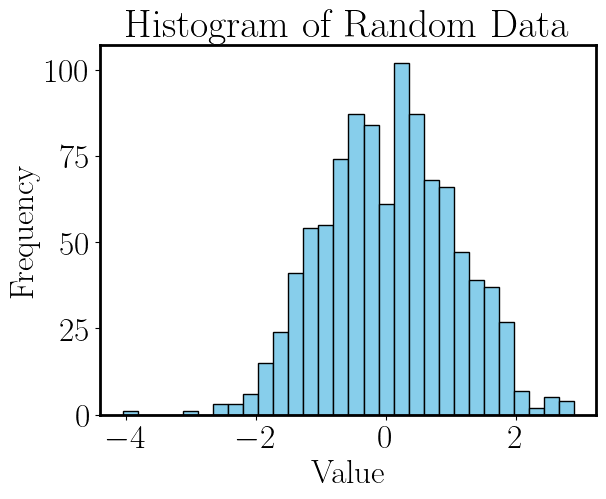

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data
data = np.random.randn(1000)

# Create a histogram
plt.hist(data, bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Random Data')

# Show the plot
plt.show()

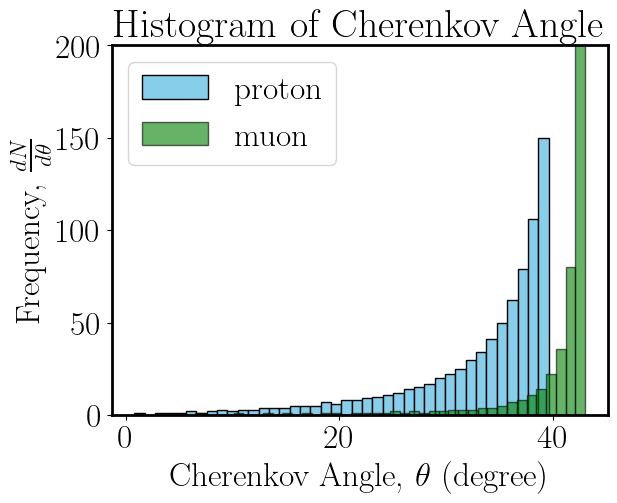

In [6]:
# Create a histogram
plt.hist(cer_angp, bins=40, color='skyblue', edgecolor='black', label='proton')
plt.hist(cer_angmu, bins=40, color='green', edgecolor='black', label='muon', alpha=0.6)

# Add labels and title
plt.xlabel(r'Cherenkov Angle, $\theta$ (degree)')
plt.ylabel(r'Frequency, $\frac{dN}{d\theta}$')
plt.title('Histogram of Cherenkov Angle')

plt.ylim(0,200)
plt.legend()

plt.savefig("Cherenkov_angle_histogram2.jpg", bbox_inches='tight')
# Show the plot
plt.show()


[218   0   1   0   2   1   2   2   2   2   3   3   4   4   4   5   6   6
   6   7   8   9  10  10  12  14  15  16  19  22  25  30  34  41  50  63
  80 108 156] [ 0.          1.01601422  2.03202843  3.04804265  4.06405687  5.08007109
  6.0960853   7.11209952  8.12811374  9.14412795 10.16014217 11.17615639
 12.1921706  13.20818482 14.22419904 15.24021326 16.25622747 17.27224169
 18.28825591 19.30427012 20.32028434 21.33629856 22.35231277 23.36832699
 24.38434121 25.40035543 26.41636964 27.43238386 28.44839808 29.46441229
 30.48042651 31.49644073 32.51245494 33.52846916 34.54448338 35.5604976
 36.57651181 37.59252603 38.60854025 39.62455446]
1.0160142170200877
1.1036487190449231


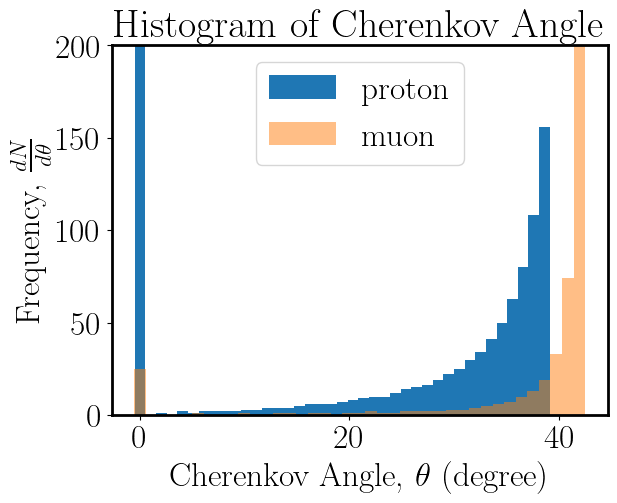

2


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
# data = np.random.normal(0, 1, 1000)  # Example data

#Setting NaN to 0 or any desired value for histogram function

# data = np.array([1, np.nan, 3, 5, 1, 2, 5, 2, 4, 1, 2, np.nan, 2, 1, np.nan, 2, np.nan, 1, 2])
# data_filled = np.nan_to_num(data, nan=0) # Replaces NaN with 0, or any other desired value
# plt.hist(data_filled)

cer_angp_filled = np.nan_to_num(cer_angp, nan=0) # Replaces NaN with 0, or any other desired value
# print(cer_angp_filled)

cer_angmu_filled = np.nan_to_num(cer_angmu, nan=0) # Replaces NaN with 0, or any other desired value
# print(cer_angmu_filled)

# Calculate histogram
histp, bin_edgesp = np.histogram(cer_angp_filled, bins=39)
histmu, bin_edgesmu = np.histogram(cer_angmu_filled, bins=39)

print(histp, bin_edgesp)

# Calculate bar width
bin_widthp = bin_edgesp[1] - bin_edgesp[0]
print(bin_widthp)

bin_widthmu = bin_edgesmu[1] - bin_edgesmu[0]
print(bin_widthmu)

# Create the histogram
plt.bar(bin_edgesp[:-1], histp, width=bin_widthp, label='proton')
plt.bar(bin_edgesmu[:-1], histmu, width=bin_widthmu, alpha=0.5, label='muon')

# plt.xlabel("Value")
# plt.ylabel("Frequency")
# plt.title("Histogram")

# Add labels and title
plt.xlabel(r'Cherenkov Angle, $\theta$ (degree)')
plt.ylabel(r'Frequency, $\frac{dN}{d\theta}$')
plt.title('Histogram of Cherenkov Angle')

plt.legend()
plt.ylim(0,200)

plt.savefig("Cherenkov_angle_histogram3.jpg", bbox_inches='tight')

plt.show()

# Accessing the frequency of a specific bin
# Example: get the frequency of the 5th bin
frequency_of_5th_bin_p = histp[4]
print(frequency_of_5th_bin_p)

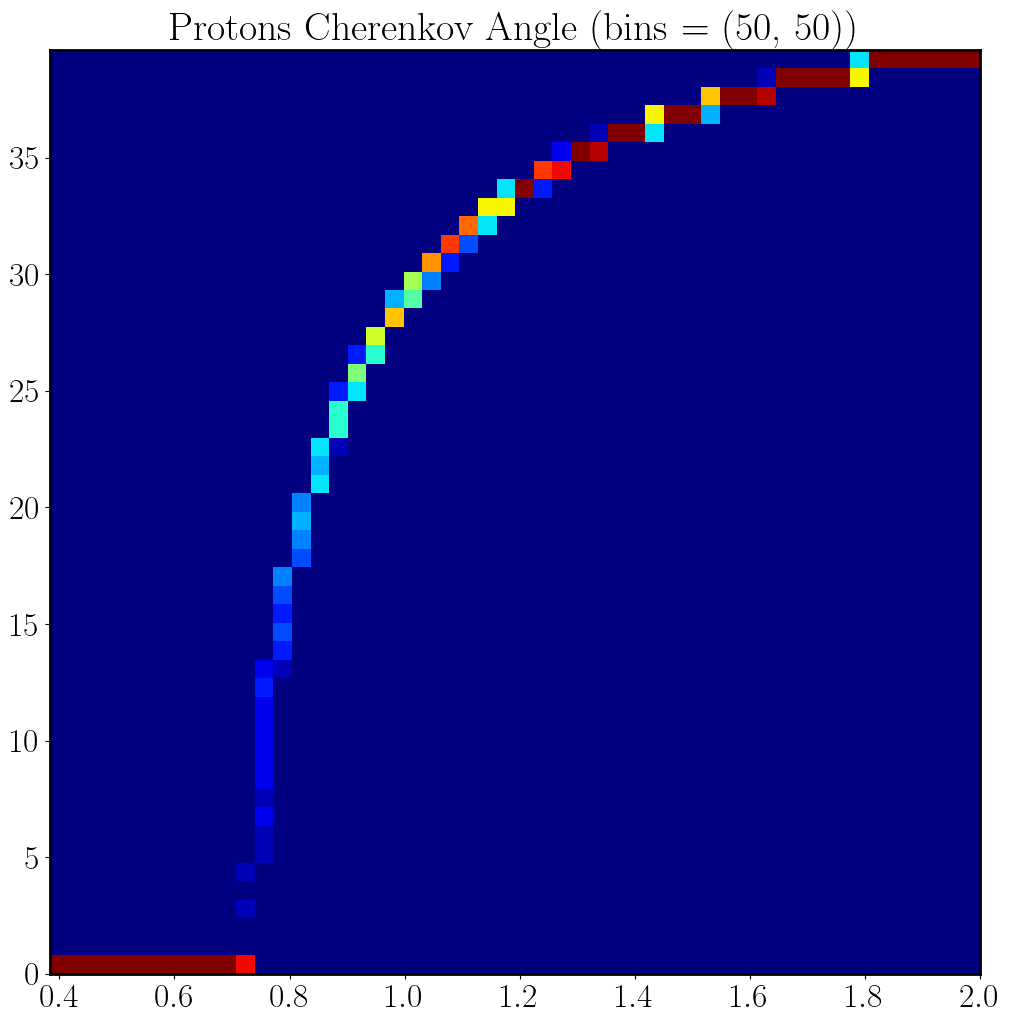

In [8]:
#2D Histogram 

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

# Big bins
# plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
ax.hist2d(tgev, cer_angp_filled, bins=(50, 50), cmap=plt.cm.jet, label='proton')
# ax.hist2d(tgev, cer_angmu_filled, bins=(50, 50), cmap=plt.cm.jet, label='muon')

ax.set_title('Protons Cherenkov Angle (bins = (50, 50))')

# ax.legend()

plt.savefig("Cherenkov_angle_T_Proton_2D_histogram.jpg", bbox_inches='tight')
plt.show()


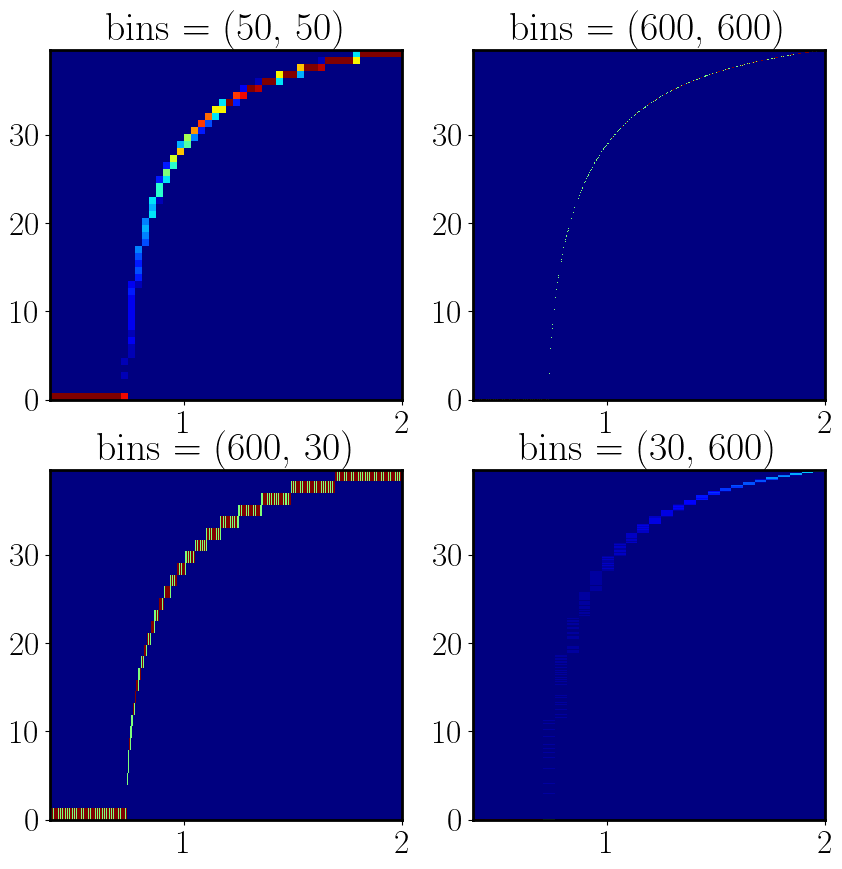

In [9]:
#Proton's Cherenkov Angle 2D Histogram

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

x = tgev
y = cer_angp_filled
z = cer_angmu_filled

#Proton

# Big bins
axs[0,0].hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet) #, label='proton'
# axs[0,0].hist2d(x, ym, bins=(50, 50), cmap=plt.cm.jet, label='muon')
axs[0, 0].set_title('bins = (50, 50)')
 
# Small bins
axs[0,1].hist2d(x, y, bins=(600, 600), cmap=plt.cm.jet)
axs[0, 1].set_title('bins = (600, 600)')
 
# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,0].hist2d(x, y, bins=(600, 30), cmap=plt.cm.jet)
axs[1, 0].set_title('bins = (600, 30)')

# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,1].hist2d(x, y, bins=(30, 600), cmap=plt.cm.jet)
axs[1, 1].set_title('bins = (30, 600)')

# plt.legend()
# plt.show()
plt.savefig("Cherenkov_angle_T_Proton_2D_histogram_4pannel.jpg", bbox_inches='tight')

# #Muon

# # Big bins
# axs[0,0].hist2d(x, z, bins=(50, 50), cmap=plt.cm.jet) #, label='muon'
# # axs[0,0].hist2d(x, ym, bins=(50, 50), cmap=plt.cm.jet, label='muon')
# axs[0, 0].set_title('bins = (50, 50)')
 
# # Small bins
# axs[0,1].hist2d(x, z, bins=(600, 600), cmap=plt.cm.jet)
# axs[0, 1].set_title('bins = (600, 600)')
 
# # If you do not set the same values for X and Y, the bins won't be a square!
# axs[1,0].hist2d(x, z, bins=(600, 30), cmap=plt.cm.jet)
# axs[1, 0].set_title('bins = (600, 30)')

# # If you do not set the same values for X and Y, the bins won't be a square!
# axs[1,1].hist2d(x, z, bins=(30, 600), cmap=plt.cm.jet)
# axs[1, 1].set_title('bins = (30, 600)')

# # plt.legend()
plt.show()
# # plt.savefig("Cherenkov_angle_T_Muon_2D_histogram_4pannel.jpg", bbox_inches='tight')



# Refractive Indices & PID

In [31]:
#Refractive index new fit: M. Sievert (Mathematica equivalent)
# initially
# a_0 = 1.189
# a_pvs = 0.00029
# tau = 0.0005

# {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
tau = 0.000693652

a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239


# lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd = np.linspace(90,700,2000)   #wavelength of light 


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd_peak = 115.11 #where n is max 


#Formula: 
n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + tau**2)))

n_jackson = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#absorption co-efficient, alpha 

sigma = (lamd_peak - lamd_uv)
mu = lamd_peak
abs_coeff = np.exp(-(lamd - lamd_peak)**2/(2*sigma**2))/(np.sqrt(2*np.pi*sigma**2))

# plt.plot(n_pvs)

#Plot of n vs lambda in the LAr medium.

x = np.array([643.9, 578.0, 546.1, 508.6, 475.3, 435.8, 406.3, 365.0, 361.2, 128.0]) #xdata: wavelength in nm 
y = np.array([1.2256, 1.2264, 1.2269, 1.2277, 1.2285, 1.2297, 1.2308, 1.2331, 1.2326, 1.358]) #ydata: refractive index 1.358+/-0.003

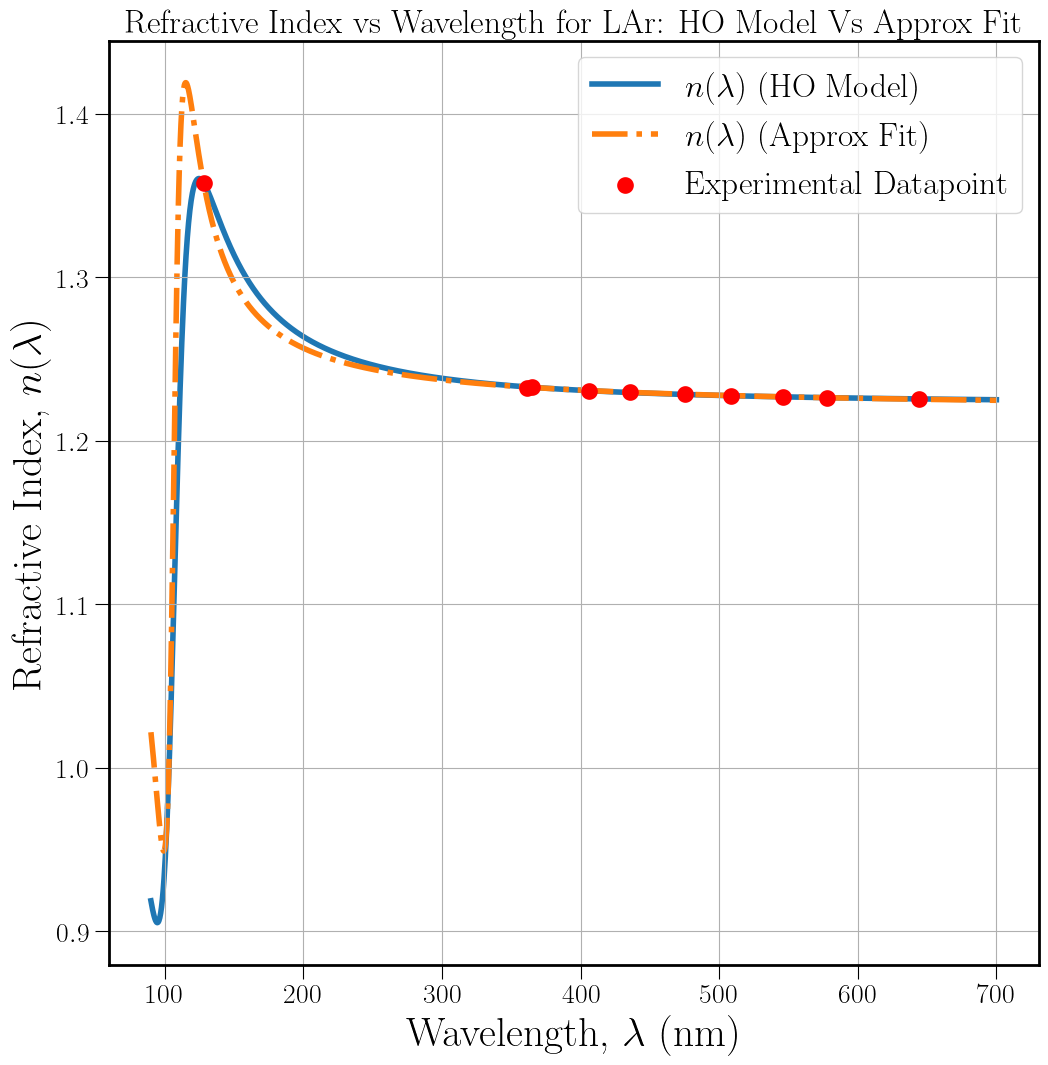

In [32]:
# plt.plot(x, y, 'ro')
# pyplot.scatter(x, y)
#Plot of n vs lambda in the LAr medium near Resonance  



fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

# plt.rc('text', usetex=False)
# plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# #     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
# plt.rcParams["font.weight"] = "bold"     
# #     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Refractive Index vs Wavelength for LAr: HO Model Vs Approx Fit", fontsize=24)
# # ax.set_title("Refractive Index vs Wavelength for LAr:  Absorptive Fits", fontsize=24)
ax.plot(lamd, n_jackson, linewidth = 4, label=r'$n(\lambda)$ (HO Model)', zorder=1)
ax.plot(lamd, n_pvs, ls= 'dashdot', linewidth = 4, label='$n(\lambda)$ (Approx Fit)', zorder=1)

ax.scatter(x, y, color= 'r', linewidth= 6, label= "Experimental Datapoint", zorder=2) #'o', s= 5, color='b'

# # ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel(r'Wavelength, $\lambda$ (nm)',fontsize=30)
ax.set_ylabel(r'Refractive Index, $n(\lambda)$',fontsize=30)
ax.grid()
ax.legend(fontsize=24)

# plt.savefig("n_vs_lambda_hofit_full_withdatapoints.jpg", bbox_inches= 'tight') #Ctrl+/ to comment in or out 
# plt.savefig("n_vs_lambda_absfits_full_withdatapoints.jpg", bbox_inches= 'tight') #Ctrl+/ to comment in or out 

0.7299270072992701 1.4630040626110135 0.4342978107291306


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\2762741834.py:66: RuntimeWarning: divide by zero encountered in divide
  thetap_aprx = np.arccos(np.round((1/(betap*n_aprx)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\2762741834.py:66: RuntimeWarning: invalid value encountered in arccos
  thetap_aprx = np.arccos(np.round((1/(betap*n_aprx)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\2762741834.py:76: RuntimeWarning: divide by zero encountered in divide
  thetap_ho = np.arccos(np.round((1/(betap*n_ho)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\2762741834.py:76: RuntimeWarning: invalid value encountered in arccos
  thetap_ho = np.arccos(np.round((1/(betap*n_ho)),5))    #theta= cerenkov angle
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\2762741834.py:87: RuntimeWarning: divide by zero encountered in divide
  thetamu_aprx = np.arccos(np.round((1/

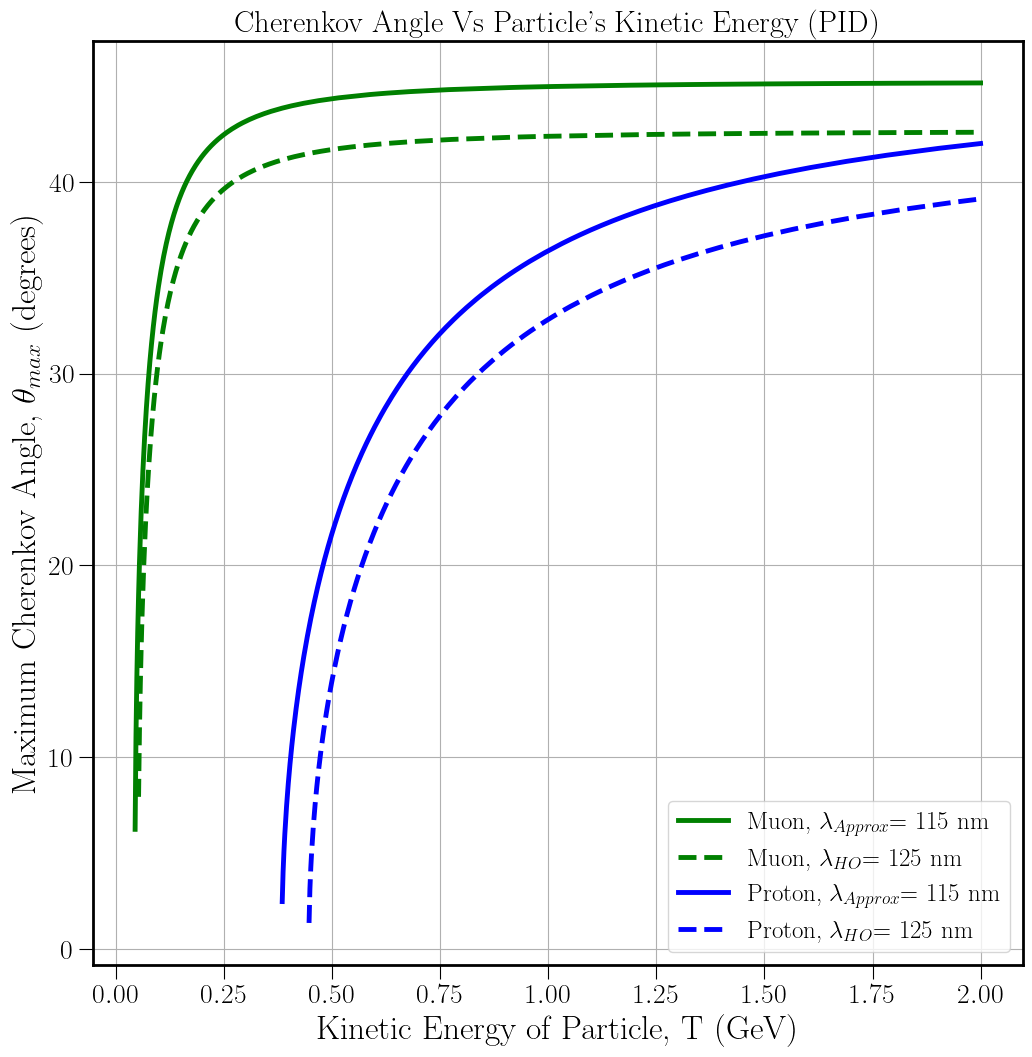

In [17]:
# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the peak wavelength of 115 nm (Approx fit) and 125 nm (HO fit))

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
m = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV


c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                  #https://arxiv.org/abs/2002.09346
n_aprx = 1.42 #at 115 nm
n_ho = 1.36 #at 125 nm
    
t = np.linspace(0, 2000, 1000) #K.E of Proton  in MeV
# t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

tgev= t/1000  #1 GeV = 1.602e-10 J

# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)



# print(beta,gamma)

betamin = 1/n   #n_max
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

mom= (m*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
momgev= mom/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 



def thetap_aprx(t,n_aprx):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetap_aprx = np.arccos(np.round((1/(betap*n_aprx)),5))    #theta= cerenkov angle
    
    return thetap_aprx

cer_angp_aprx = thetap_aprx(t,n_aprx)*(180/np.pi) #Converting radian in degree


def thetap_ho(t,n_ho):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetap_ho = np.arccos(np.round((1/(betap*n_ho)),5))    #theta= cerenkov angle
    
    return thetap_ho

cer_angp_ho = thetap_ho(t,n_ho)*(180/np.pi) #Converting radian in degree



def thetamu_aprx(t,n_aprx):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetamu_aprx = np.arccos(np.round((1/(betamu*n_aprx)),5))    #theta= cerenkov angle
    
    return thetamu_aprx

cer_angmu_aprx = thetamu_aprx(t,n_aprx)*(180/np.pi) #Converting radian in degree


def thetamu_ho(t,n_ho):
          
#     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
    thetamu_ho = np.arccos(np.round((1/(betamu*n_ho)),5))    #theta= cerenkov angle
    
    return thetamu_ho

cer_angmu_ho = thetamu_ho(t,n_ho)*(180/np.pi) #Converting radian in degree


# def thetae(t,n):
          
# #     theta= np.arccos(np.round(((1+m*c**2/(2*t))**0.5*n**(-1)),5))     #theta= cerenkov angle
#     thetae = np.arccos(np.round((1/(betae*n)),5))    #theta= cerenkov angle
    
#     return thetae

# cer_ange = thetae(t,n)*(180/np.pi) #Converting radian in degree


#Plot without considering Energy loss in the LAr medium.

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.plot(tgev, cer_angmu_aprx, color='g', lw=3.5, label="Muon, $\\lambda_{Approx}$= 115 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_angmu_ho, color='g', lw=3.5, ls='dashed', label="Muon, $\\lambda_{HO}$= 125 nm")   #, label="n = {}".format(n[0])

ax.plot(tgev, cer_angp_aprx, color='b', lw=3.5, label="Proton, $\\lambda_{Approx}$= 115 nm")   #, label="n = {}".format(n[0])
ax.plot(tgev, cer_angp_ho, color='b', lw=3.5, ls='dashed', label="Proton, $\\lambda_{HO}$= 125 nm")   #, label="n = {}".format(n[0])


# ax.plot(tgev, cer_ange, color='r', lw=3.5, label="Electron, $\\lambda$= 128 nm")   #, label="n = {}".format(n[0])

# ax.plot(tgev[:,1],cer_ang[:,1],label="n = {}".format(n[1]))
# ax.plot(tgev[:,2],cer_ang[:,2],label="n = {}".format(n[2]))

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# ax.set_title(r"Cherenkov Angle Vs Proton's Kinetic Energy", fontsize=22)
ax.set_title(r"Cherenkov Angle Vs Particle's Kinetic Energy (PID)", fontsize=22)

ax.set_xlabel(r"Kinetic Energy of Particle, T (GeV)",fontsize=24)
ax.set_ylabel(r"Maximum Cherenkov Angle, $\theta_{max}$ (degrees)",fontsize=24) #

# plt.xlim(0,1)

ax.grid()
ax.legend(fontsize=18)
# plt.savefig("Cherenkov_Angle_vs_Protons_Kinetic_Energy_leq1GeV.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_Angle_vs_Electrons_Kinetic_Energy_leq2GeV.jpg", bbox_inches= 'tight')

# plt.savefig("Cherenkov_angle_max_vs_particles_kinetic_energy_leq2GeV_PID.jpg", bbox_inches= 'tight')

# Toy Models (2D Gaussian) Intensity Plot Examples

[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]] [[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]] [[0.13533528 0.14080209 0.14637258 ... 0.15204177 0.14637258 0.14080209]
 [0.14080209 0.14648972 0.15228523 ... 0.15818343 0.15228523 0.14648972]
 [0.14637258 0.15228523 0.15831002 ... 0.16444156 0.15831002 0.15228523]
 ...
 [0.15204177 0.15818343 0.16444156 ... 0.17081059 0.16444156 0.15818343]
 [0.14637258 0.15228523 0.15831002 ... 0.16444156 0.15831002 0.15228523]
 [0.14080209 0.14648972 0.15228523 ... 0.15818343 0.15228523 0.14648972]]
(100, 100) (100, 100) (100, 100)


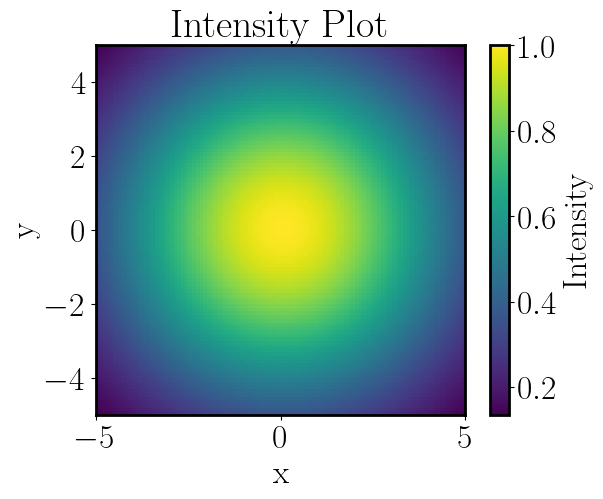

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Generate sample 2D data (e.g., a 2D Gaussian)
x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
z = np.exp(-(x**2 + y**2) / 25)

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))

# Create the intensity plot using imshow
plt.imshow(z, extent=[-5, 5, -5, 5], origin='lower', cmap='viridis')
plt.colorbar(label='Intensity')  # Add a colorbar to show intensity scale
plt.xlabel('x')
plt.ylabel('y')
plt.title('Intensity Plot')
plt.show()

[[500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]
 ...
 [500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]
 [500. 500. 500. ... 500. 500. 500.]] [[90.         90.         90.         ... 90.         90.
  90.        ]
 [89.97133778 89.97133778 89.97133778 ... 89.97133778 89.97133778
  89.97133778]
 [89.94267555 89.94267555 89.94267555 ... 89.94267555 89.94267555
  89.94267555]
 ...
 [ 2.56319972  2.56319972  2.56319972 ...  2.56319972  2.56319972
   2.56319972]
 [ 1.81238033  1.81238033  1.81238033 ...  1.81238033  1.81238033
   1.81238033]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]] [[4.10062500e+18 4.10062500e+18 4.10062500e+18 ... 4.10062500e+18
  4.10062500e+18 4.10062500e+18]
 [4.09540380e+18 4.09540380e+18 4.09540380e+18 ... 4.09540380e+18
  4.09540380e+18 4.09540380e+18]
 [4.09018760e+18 4.09018760e+18 4.09018760e+18 ... 4.09018760e+18
  4.09018760e+18 4.09018760e+18]

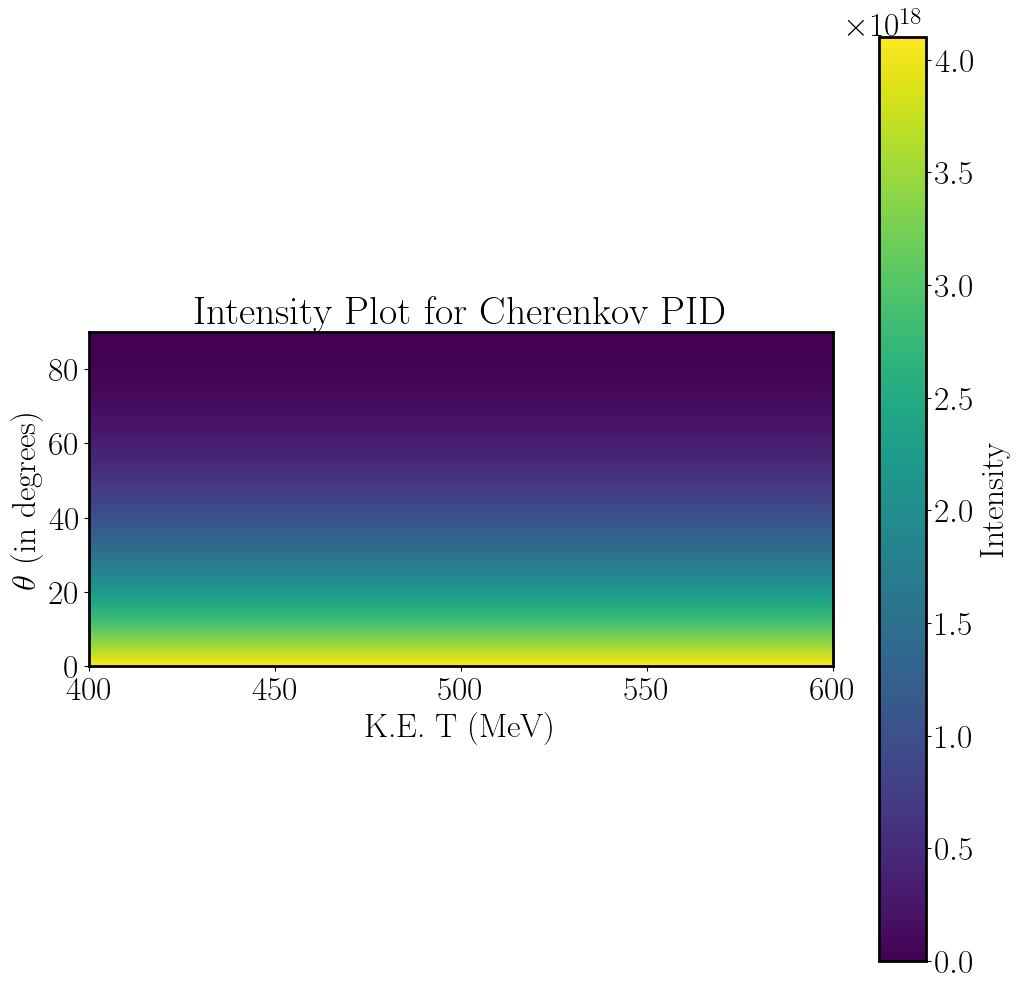

In [19]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Intensity Plot for Cherenkov PID')

# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
y = theta500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
X, Y = np.meshgrid(x, y)

#test intensity functions
# Z = X**2 + Y**2
Z = (X*Y)**4
# z = total500t  #Total AD
# z = (x*y)**4
# Z = np.linspace(total500t, total500t, 2000)
# Z = np.vstack((z, z)).T #you can transpose y >>> y = y.T

print(X, Y, Z)
print(np.shape(X), np.shape(Y), np.shape(Z))

# Create the intensity plot using imshow
# First define a mappable such as an image (with imshow) or a contour set (with contourf).
plt.imshow(Z, extent=[400, 600, np.min(y), np.max(y)], origin='lower', cmap='viridis')
# ax.contourf(Z, extent=[400, 600, np.min(y), np.max(y)], origin='lower', cmap='viridis')
# sns.heatmap(Z, annot=True, linewidths=.5, linecolor='black') #fmt="d", 

plt.colorbar(label='Intensity')  # Add a colorbar to show intensity scale
# plt.xlabel('x')
# plt.ylabel('y')
# plt.title('Intensity Plot')
plt.show()

# plt.contour(X, Y, z)
# ax.plot_surface(X, Y, Z, cmap='viridis')


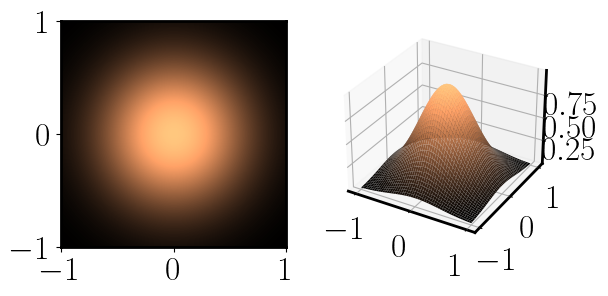

In [27]:
# exploring_meshgrid.py

import matplotlib.pyplot as plt
import numpy as np

wavelength = 0.5
x = y = np.linspace(-1, 1, 1000)

X, Y = np.meshgrid(x, y)

output = np.exp(-5 * (X ** 2) / 2 - 5 * (Y ** 2) / 2)

fig = plt.figure()

ax = fig.add_subplot(121)
ax.imshow(
    output,
    cmap="copper",
    extent=[np.min(x), np.max(x), np.min(y), np.max(y)],
)

ax = fig.add_subplot(122, projection="3d")
ax.plot_surface(X, Y, output, cmap="copper")

plt.show()

# Heatmap Examples

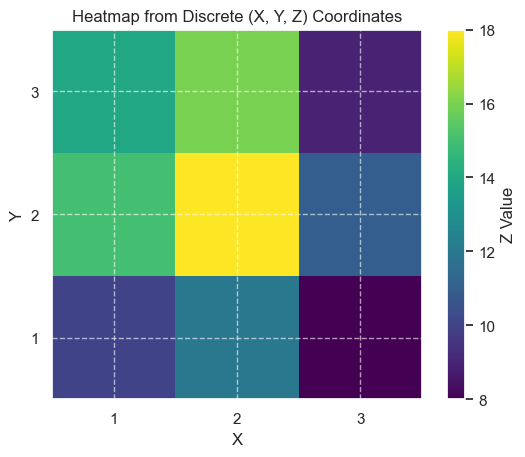

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# Sample discrete (x, y, z) coordinates
x_coords = np.array([1, 1, 2, 2, 3, 3, 1, 2, 3])
y_coords = np.array([1, 2, 1, 2, 1, 2, 3, 3, 3])
z_values = np.array([10, 15, 12, 18, 8, 11, 14, 16, 9])

# 1. Determine the grid dimensions
unique_x = np.unique(x_coords)
unique_y = np.unique(y_coords)
num_x = len(unique_x)
num_y = len(unique_y)

# 2. Create an empty 2D grid (or initialize with a default value like NaN)
heatmap_grid = np.full((num_y, num_x), np.nan)

# 3. Map the (x, y, z) values to the grid
# We need to find the indices in the unique x and y arrays
for i in range(len(x_coords)):
    x_index = np.where(unique_x == x_coords[i])[0][0]
    y_index = np.where(unique_y == y_coords[i])[0][0]
    heatmap_grid[y_index, x_index] = z_values[i]

# 4. Plot the heatmap using imshow()
plt.imshow(heatmap_grid, cmap='viridis', origin='lower',
           extent=[unique_x.min() - 0.5, unique_x.max() + 0.5,
                   unique_y.min() - 0.5, unique_y.max() + 0.5])

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heatmap from Discrete (X, Y, Z) Coordinates')
plt.colorbar(label='Z Value')

# Set ticks to the actual x and y values
plt.xticks(unique_x)
plt.yticks(unique_y)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

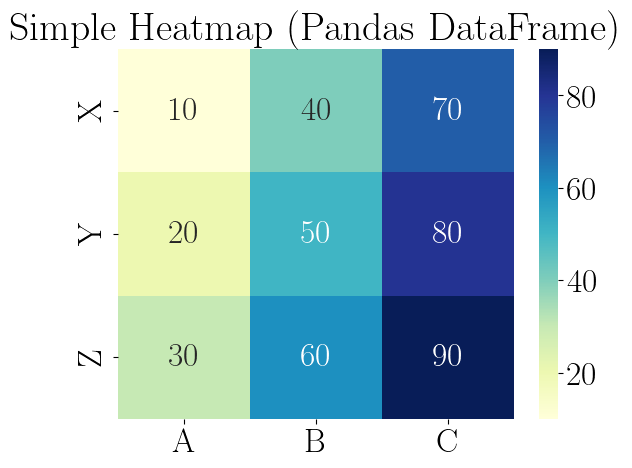

In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame({'A': [10, 20, 30],
                     'B': [40, 50, 60],
                     'C': [70, 80, 90]},
                    index=['X', 'Y', 'Z'])

sns.heatmap(data, annot=True, cmap='YlGnBu')
plt.title("Simple Heatmap (Pandas DataFrame)")
plt.show()

   x  y   z
0  1  1  10
1  1  2  15
2  2  1  12
3  2  2  18
4  3  1   8
5  3  2  14
x   1   2   3
y            
1  10  12   8
2  15  18  14


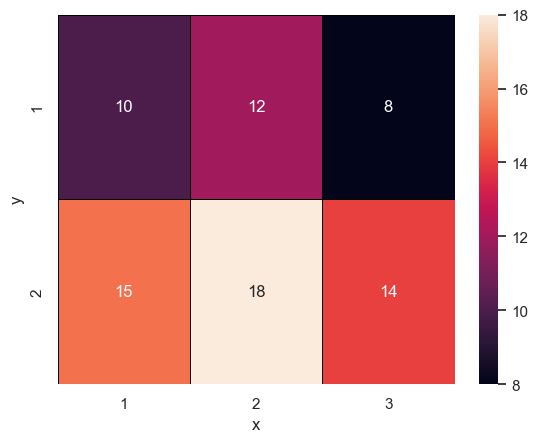

In [131]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Sample data (replace with your actual data)
data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
df = pd.DataFrame(data)
print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z')
print(pivot_df)

# Use heatmap with clear separation
sns.heatmap(pivot_df, annot=True, fmt="d", linewidths=.5, linecolor='black')
plt.show()

[[0.58117017 0.49480416 0.00218453 0.32659522 0.74631403 0.84399898
  0.30101295 0.40547265 0.89401573 0.77722621]
 [0.28577227 0.86487948 0.55299448 0.28018951 0.89789    0.70788821
  0.93446488 0.06617096 0.44029488 0.01924891]
 [0.84409058 0.82969232 0.31586428 0.57760337 0.58500336 0.69884743
  0.39676899 0.21629134 0.76932083 0.54031633]
 [0.93451459 0.53040419 0.14002531 0.06405071 0.09990348 0.05427383
  0.97535199 0.49612757 0.90540397 0.36685102]
 [0.03481456 0.88552973 0.58267234 0.4592122  0.17345373 0.94860867
  0.98233002 0.52361907 0.361334   0.11394355]
 [0.88819869 0.16993579 0.49088516 0.28890948 0.31022684 0.64327778
  0.14618724 0.09157743 0.43598433 0.84380236]
 [0.85534798 0.18902336 0.70847053 0.27022213 0.36687559 0.89239863
  0.35339308 0.72501066 0.18001207 0.4134171 ]
 [0.32732481 0.67358951 0.24046413 0.36572449 0.24776878 0.38237928
  0.69035753 0.42937093 0.23774021 0.97190239]
 [0.58203644 0.18139891 0.58074722 0.95989163 0.69698782 0.53386555
  0.4395415 

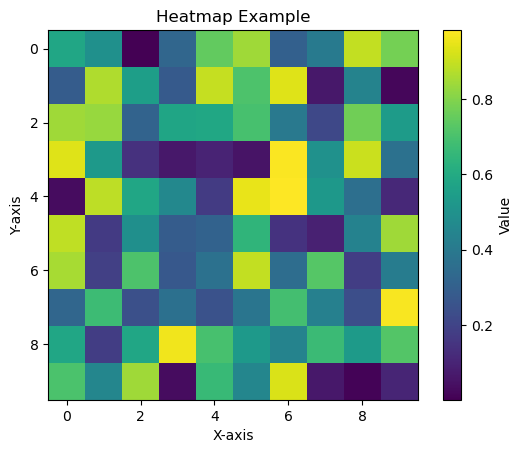

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
data = np.random.rand(10, 10)
print(data)

# Create the heatmap
ax = plt.imshow(data, cmap='viridis', interpolation='nearest')
# ax.invert_yaxis()
# Add a color bar
plt.colorbar(label='Value')

# Add labels (optional)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap Example')

# Show the plot
plt.show()

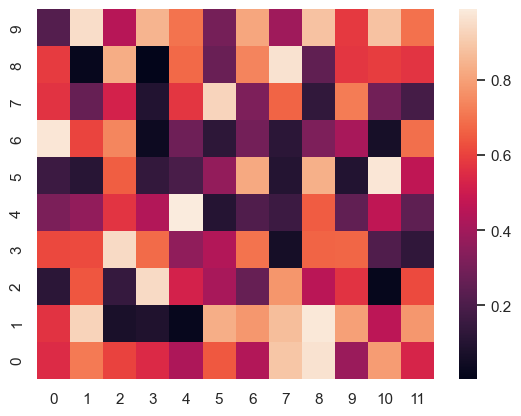

In [56]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)
ax.invert_yaxis()

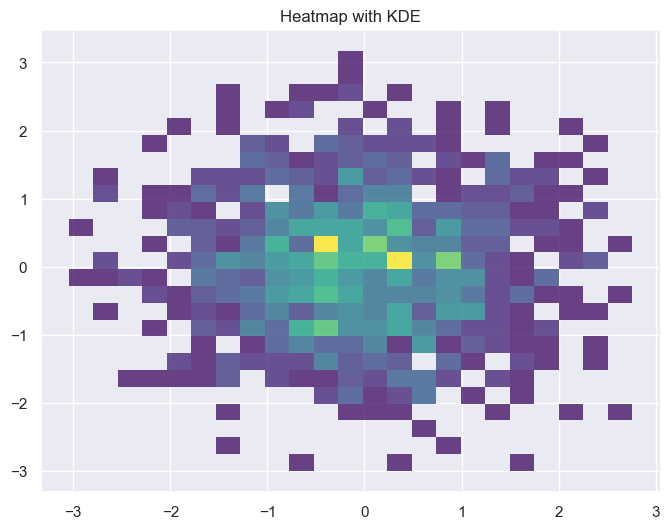

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with your actual data)
np.random.seed(0)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(0, 1, 1000)

# print(x, y)

# Create the KDE plot
plt.figure(figsize=(8, 6))
sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours
# plt.colorbar()
plt.title('Heatmap with KDE')
plt.show()

In [4]:
# import datashader as ds
# import datashader.transfer_functions as tf

# # Sample data (replace with your actual data)
# x = np.random.normal(0, 1, 10000)
# y = np.random.normal(0, 1, 10000)
# z = np.random.rand(10000) # Example data for color mapping

# # Create the plot
# cvs = ds.Canvas(plot_width=500, plot_height=500,
#                 range=(x.min(), x.max()), range=(y.min(), y.max()))
# agg = cvs.points(x, y)

# # Create the heatmap
# heatmap = tf.shade(agg, color_range='viridis')
# heatmap

# Setting ticklabels for heatmaps

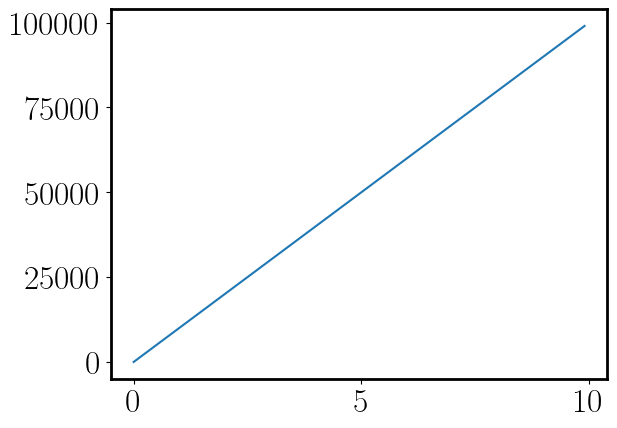

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Sample data
x = np.arange(0, 10, 0.1)
y = x * 10000

# Create plot
fig, ax = plt.subplots()
ax.plot(x, y)

# Format y-axis to show full numbers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

# Show plot
plt.show()

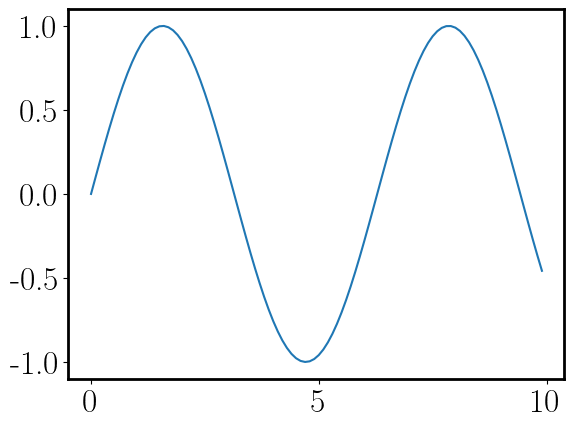

In [67]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

x = np.arange(0, 10, 0.1)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Formats to 0 decimal places
plt.show()

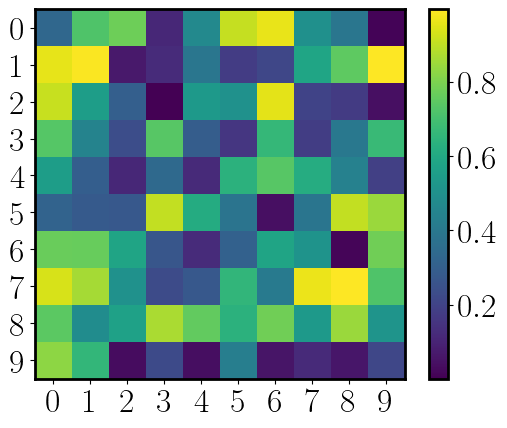

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
data = np.random.rand(10, 10)

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(data)

# Set the x and y tick labels to integers
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))

#Integer tick-labels

# ax.set_xticklabels([int(x) for x in ax.get_xticks()])
# ax.set_yticklabels([int(y) for y in ax.get_yticks()])

# If you need to round the numbers to a specific number of decimal places, you can modify the list comprehension accordingly:Python

ax.set_xticklabels([round(x, 2) for x in ax.get_xticks()])
ax.set_yticklabels([round(y, 2) for y in ax.get_yticks()])

# Add a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Show the plot
plt.show()


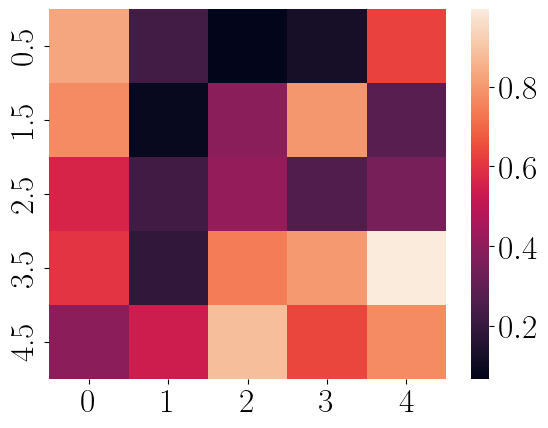

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

data = np.random.rand(5, 5)
df = pd.DataFrame(data)

fig, ax = plt.subplots()
sns.heatmap(df, ax=ax)

# Modify x-axis labels to integers
xticks = ax.get_xticks()
ax.set_xticklabels([int(x) for x in xticks])

# Modify y-axis labels to rounded numbers with one decimal place
yticks = ax.get_yticks()
ax.set_yticklabels([round(y, 1) for y in yticks])

plt.show()

# 3D Plot Examples in Python

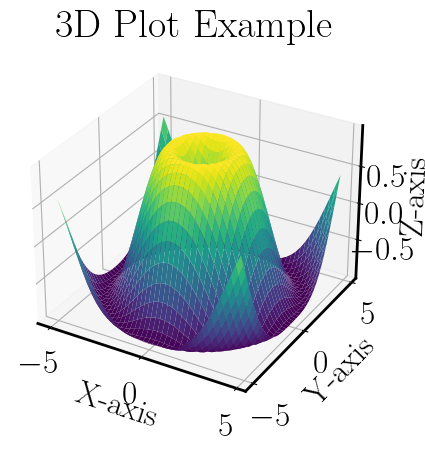

In [56]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure and an axes object for 3D plotting:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Types of 3D plots:

# # 3D Scatter Plot:
# x = np.random.rand(100)
# y = np.random.rand(100)
# z = np.random.rand(100)
# ax.scatter(x, y, z)

# # 3D Line Plot:
# t = np.linspace(0, 10*np.pi, 500)
# x = np.sin(t)
# y = np.cos(t)
# z = t
# ax.plot(x, y, z)

# 3D Surface Plot:
x = np.arange(-5, 5, 0.25)
y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))
ax.plot_surface(X, Y, Z, cmap='viridis')

# # 3D Wireframe Plot:
# x = np.arange(-5, 5, 0.25)
# y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))
# ax.plot_wireframe(X, Y, Z)

# # 3D Contour Plot:
# x = np.arange(-5, 5, 0.25)
# y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))
# ax.contour3D(X, Y, Z, 50, cmap='binary')

# Set labels and title:
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Plot Example')

plt.show()

# Intensity Plot for PID:  (x,y,z) = (T or mom, $\theta_c$, AD ($\frac{dN}{d\theta}$)  )

[500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 700. 700. 700. 700. 700. 700. 700. 700.
 700. 700.] [ 0. 10. 20. 30. 40. 50. 60. 70. 80. 90.  0. 10. 20. 30. 40. 50. 60. 70.
 80. 90.  0. 10. 20. 30. 40. 50. 60. 70. 80. 90.] [  0  12  36  12   0   0   0   0   0   0   0  34  95  34   0   0   0   0
   0   0   0  76 216  76   0   0   0   0   0   0]
(30,) (30,) (30,)
        x     y    z
0   500.0   0.0    0
1   500.0  10.0   12
2   500.0  20.0   36
3   500.0  30.0   12
4   500.0  40.0    0
5   500.0  50.0    0
6   500.0  60.0    0
7   500.0  70.0    0
8   500.0  80.0    0
9   500.0  90.0    0
10  600.0   0.0    0
11  600.0  10.0   34
12  600.0  20.0   95
13  600.0  30.0   34
14  600.0  40.0    0
15  600.0  50.0    0
16  600.0  60.0    0
17  600.0  70.0    0
18  600.0  80.0    0
19  600.0  90.0    0
20  700.0   0.0    0
21  700.0  10.0   76
22  700.0  20.0  216
23  700.0  30.0   76
24  700.0  40.0    0
25  700.0  50.0    0
26  700.0  60.0

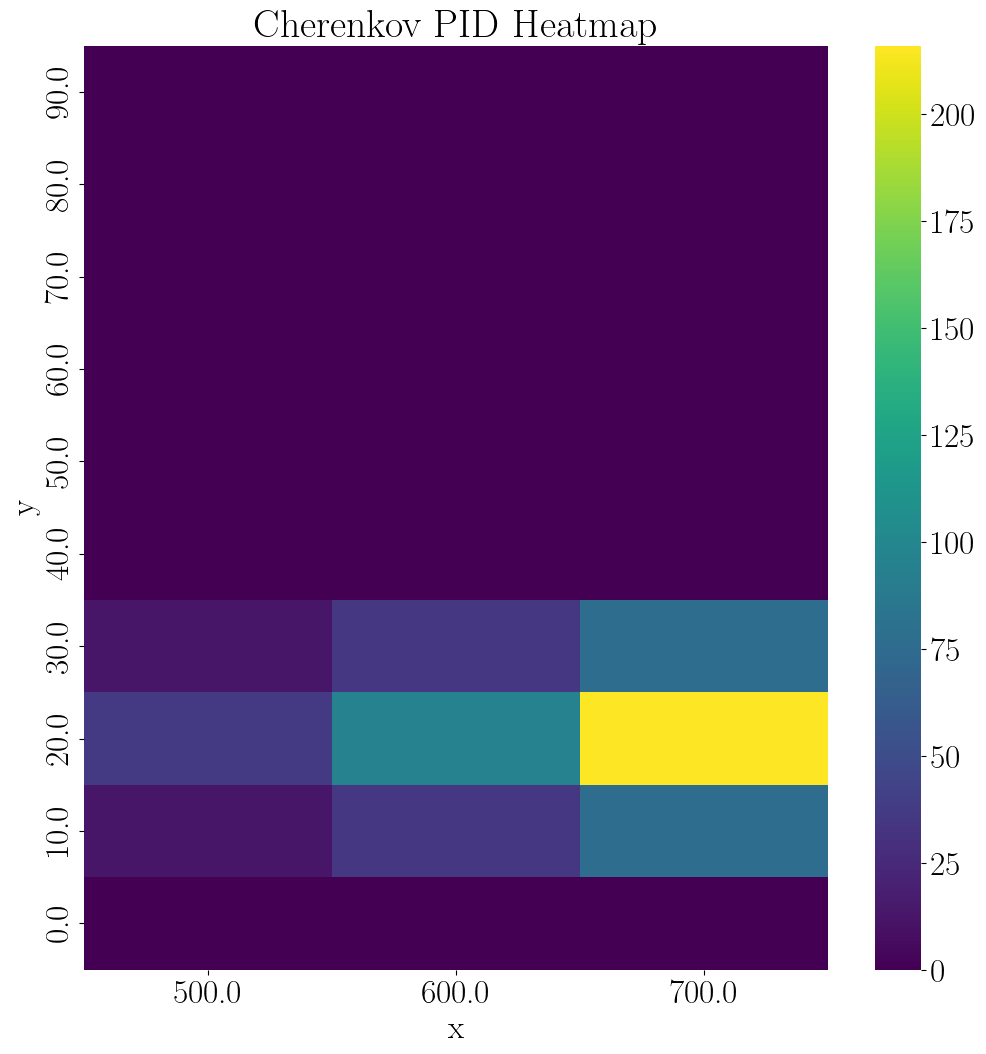

In [4]:
#Pseudo data: just to test plotting

#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)


# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov PID Heatmap')

# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

td_500 = np.linspace(500, 500, 10)
td_600 = np.linspace(600, 600, 10)
td_700 = np.linspace(700, 700, 10)

theta_500 = np.linspace(0, np.pi/2, 10)
theta_500d = np.linspace(0, 90, 10)

total500d = [0,12,36,12,0,0,0,0,0,0]
total600d = [0,34,95,34,0,0,0,0,0,0]
total700d = [0,76,216,76,0,0,0,0,0,0]



# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([td_500, td_600, td_700]).flatten() #, t_800, t_900, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D)
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta_500d, theta_500d, 3).flatten() #Cherenkov angle, (theta) 
z = np.array([total500d, total600d, total700d]).flatten() #, total800t, total900t, total1000t]).flatten() #Total AD

# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))



# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}
data = {'x': x , 'y': y, 'z': z}
df = pd.DataFrame(data)

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='viridis') #, alpha=0.8) 
# ax = sns.heatmap(pivot_df, annot=True, linewidths=.5, linecolor='black', cmap='plasma', alpha=0.8) 


ax.invert_yaxis()
# ax.set_ylim(0,50)
# plt.savefig("Cherenkov_PID_proton_pseudodata_heatmap.jpg", bbox_inches= 'tight')
plt.show()

In [4]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Sample data
# # data = np.random.normal(0, 1, 1000)  # Example data

# #Setting NaN to 0 or any desired value for histogram function

# # data = np.array([1, np.nan, 3, 5, 1, 2, 5, 2, 4, 1, 2, np.nan, 2, 1, np.nan, 2, np.nan, 1, 2])
# # data_filled = np.nan_to_num(data, nan=0) # Replaces NaN with 0, or any other desired value
# # plt.hist(data_filled)

# cer_angp_filled = np.nan_to_num(cer_angp, nan=0) # Replaces NaN with 0, or any other desired value
# # print(cer_angp_filled)

# cer_angmu_filled = np.nan_to_num(cer_angmu, nan=0) # Replaces NaN with 0, or any other desired value
# # print(cer_angmu_filled)

# # Calculate histogram
# histp, bin_edgesp = np.histogram(cer_angp_filled, bins=39)
# histmu, bin_edgesmu = np.histogram(cer_angmu_filled, bins=39)

# print(histp, bin_edgesp)

# # Calculate bar width
# bin_widthp = bin_edgesp[1] - bin_edgesp[0]
# print(bin_widthp)

# bin_widthmu = bin_edgesmu[1] - bin_edgesmu[0]
# print(bin_widthmu)

# # Create the histogram
# plt.bar(bin_edgesp[:-1], histp, width=bin_widthp, label='proton')
# plt.bar(bin_edgesmu[:-1], histmu, width=bin_widthmu, alpha=0.5, label='muon')

# # plt.xlabel("Value")
# # plt.ylabel("Frequency")
# # plt.title("Histogram")

# # Add labels and title
# plt.xlabel(r'Cherenkov Angle, $\theta$ (degree)')
# plt.ylabel(r'Frequency, $\frac{dN}{d\theta}$')
# plt.title('Histogram of Cherenkov Angle')

# plt.legend()
# plt.ylim(0,200)
# plt.show()

# # Accessing the frequency of a specific bin
# # Example: get the frequency of the 5th bin
# frequency_of_5th_bin_p = histp[4]
# print(frequency_of_5th_bin_p)

['costheta', 'normal500', 'anomalous500', 'total500']


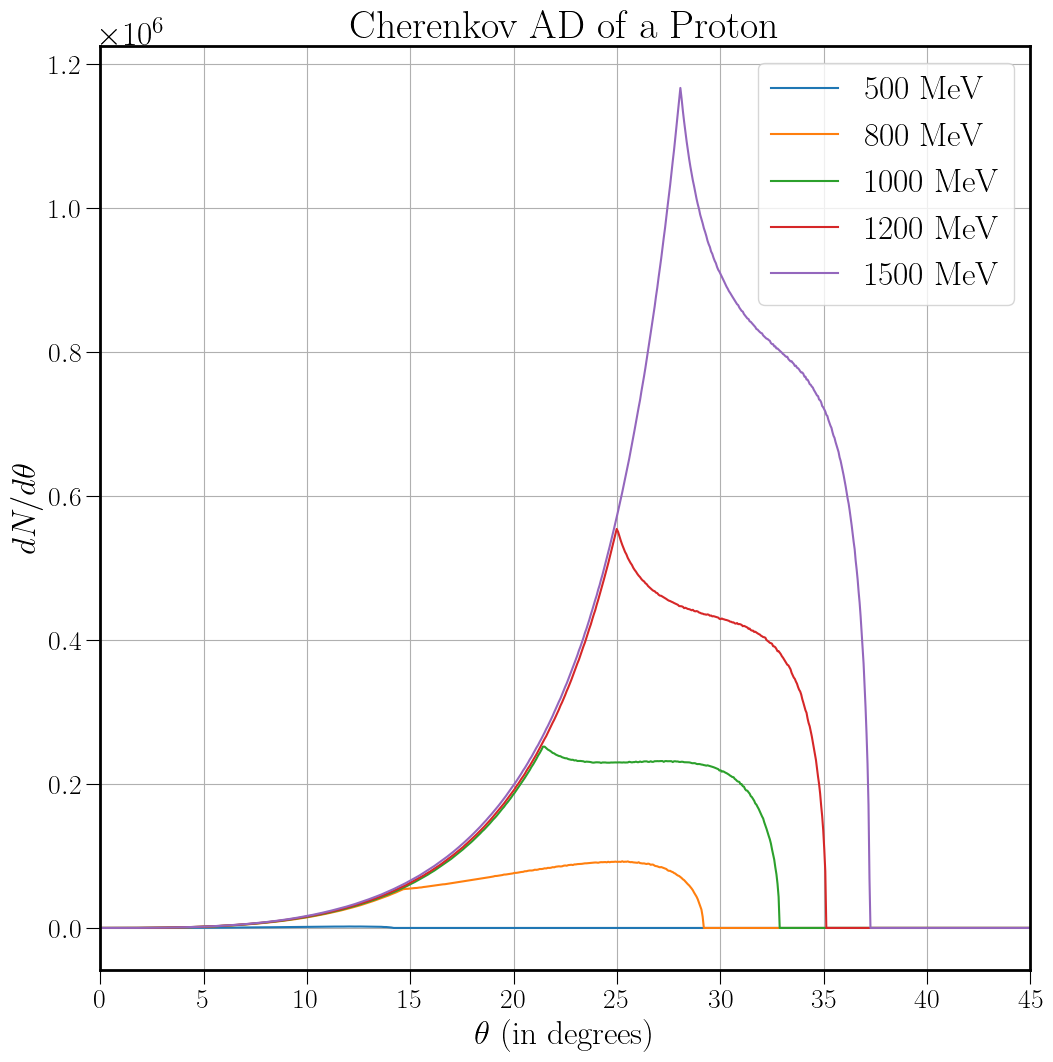

In [5]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# # 3D Surface Plot:
# x = np.arange(-5, 5, 0.25)
# y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))
# ax.plot_surface(X, Y, Z, cmap='viridis')

# Load the .npz file
data500 = np.load('Cherenkov Data files\\npz\\cerenkovdata500.npz')
data600 = np.load('Cherenkov Data files\\npz\\cerenkovdata600.npz')
data700 = np.load('Cherenkov Data files\\npz\\cerenkovdata700.npz')
data800 = np.load('Cherenkov Data files\\npz\\cerenkovdata800.npz')
data900 = np.load('Cherenkov Data files\\npz\\cerenkovdata900.npz')
data1000 = np.load('Cherenkov Data files\\npz\\cerenkovdata1000.npz')
data1200 = np.load('Cherenkov Data files\\npz\\cerenkovdata1200.npz')
data1500 = np.load('Cherenkov Data files\\npz\\cerenkovdata1500.npz')
data1800 = np.load('Cherenkov Data files\\npz\\cerenkovdata1800.npz')
data2000 = np.load('Cherenkov Data files\\npz\\cerenkovdata2000.npz')

# List the names of the arrays in the file
print(data500.files)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# Set labels and title:
ax.set_xlabel(r'$\theta$ (in degrees)')
ax.set_ylabel(r'$dN/d\theta$')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov AD of a Proton')
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# Access a specific array
costheta500 = data500['costheta']
theta500 = np.arccos(costheta500)
total500 = data500['total500']
total500t = total500*np.sin(theta500)
# scint500 = data500['scint500']
ax.plot(theta500*(180/np.pi), total500t, label='500 MeV')

# Access a specific array
costheta600 = data600['costheta']
theta600 = np.arccos(costheta600)
total600 = data600['total600']
total600t = total600*np.sin(theta600)
# scint600 = data600['scint600']

# Access a specific array
costheta700 = data700['costheta']
theta700 = np.arccos(costheta700)
total700 = data700['total700']
total700t = total700*np.sin(theta700)
# scint700 = data700['scint700']

# Access a specific array
costheta800 = data800['costheta']
theta800 = np.arccos(costheta800)
total800 = data800['total800']
total800t = total800*np.sin(theta800)
# scint800 = data800['scint800']
ax.plot(theta800*(180/np.pi), total800t, label='800 MeV')

# Access a specific array
costheta900 = data900['costheta']
theta900 = np.arccos(costheta900)
total900 = data900['total900']
total900t= total900*np.sin(theta900)
# scint900 = data900['scint900']

# Access a specific array
costheta1000 = data1000['costheta']
theta1000 = np.arccos(costheta1000)
total1000 = data1000['total1000']
total1000t = total1000*np.sin(theta1000)
# scint1000 = data1000['scint1000']
ax.plot(theta1000*(180/np.pi), total1000t, label='1000 MeV')

# Access a specific array
costheta1200 = data1200['costheta']
theta1200 = np.arccos(costheta1200)
total1200 = data1200['total1200']
total1200t = total1200*np.sin(theta1200)
# scint1200 = data1200['scint1200']
ax.plot(theta1200*(180/np.pi), total1200t, label='1200 MeV')


# Access a specific array
costheta1500 = data1500['costheta']
theta1500 = np.arccos(costheta1500)
total1500 = data1500['total1500']
total1500t = total1500*np.sin(theta1500)
# scint1500 = data1500['scint1500']
ax.plot(theta1500*(180/np.pi), total1500t, label='1500 MeV')


# Access a specific array
costheta1800 = data1800['costheta']
theta1800 = np.arccos(costheta1800)
total1800 = data1800['total1800']
total1800t = total1800*np.sin(theta1800)
# scint1800 = data1800['scint1800']

# Access a specific array
costheta2000 = data2000['costheta']
theta2000 = np.arccos(costheta2000)
total2000 = data2000['total2000']
total2000t = total2000*np.sin(theta2000)
# scint2000 = data1000['scint2000']


ax.legend()
ax.set_xlim(0,45)
ax.grid()

# plt.savefig('Cherenkov_AD_Proton_allT_from_saved_data', bbox_inches='tight')
# plt.savefig('Cherenkov_AD_Proton_500MeV_from_saved_data', bbox_inches='tight')

# Close the file
# data.close()


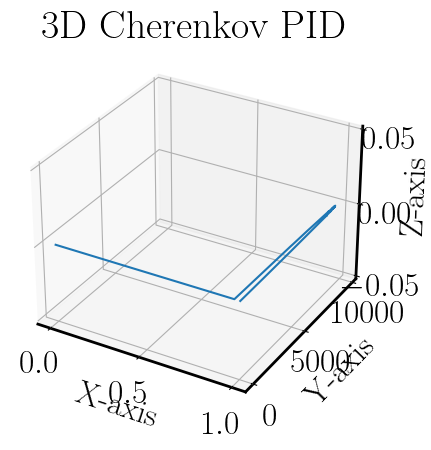

In [6]:
# # Use the arrays
# print(costheta500)
# # print(np.arccos(costheta))
# print(total500)

# Create a figure and an axes object for 3D plotting:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set labels and title:
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Cherenkov PID')

# ax.plot(theta500, total500t)
ax.plot(costheta500, total500)
plt.show()


[90.         89.97133778 89.94267555 ...  2.56319972  1.81238033
  0.        ] [ 0.          0.          0.         ... 36.46649883 12.70923294
  0.        ]
(2000,) (2000,) (2000,)
[90.         89.97133778 89.94267555 ...  2.56319972  1.81238033
  0.        ] [  0.           0.           0.         ... 231.67841479  81.30390364
   0.        ]
251959.17757150988


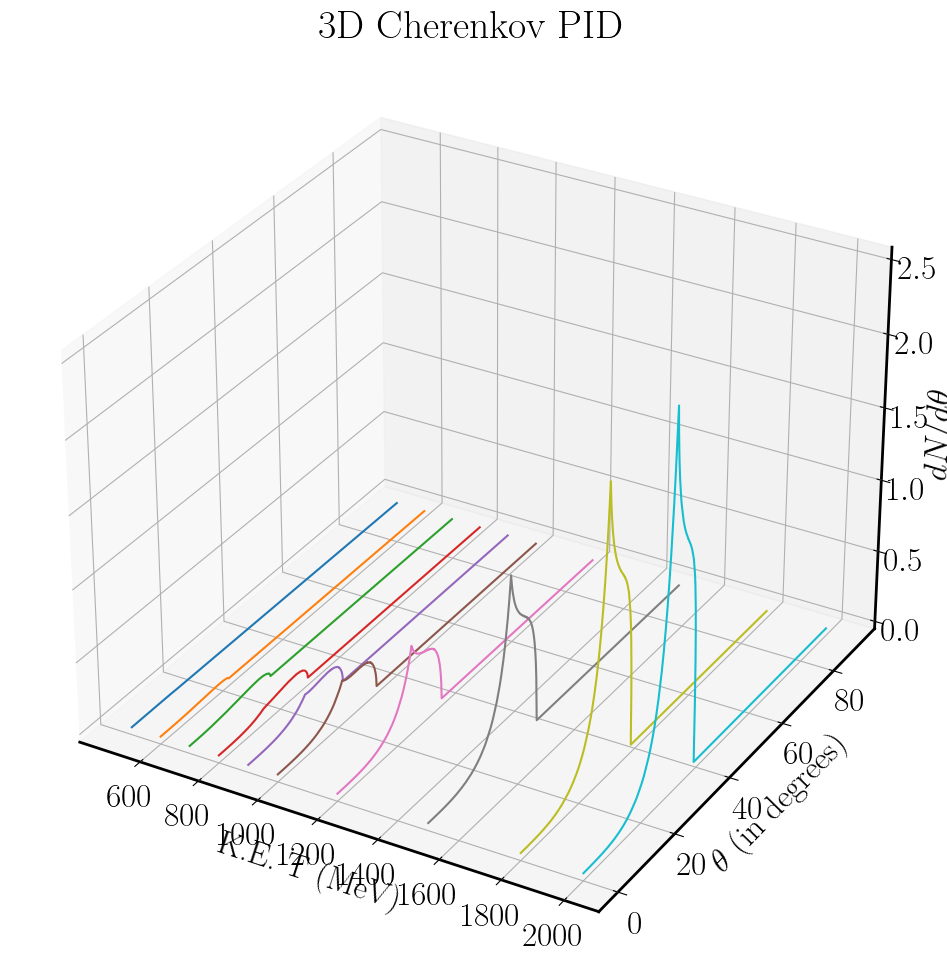

In [7]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('3D Cherenkov PID')

X = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total500t  #Total AD

print(Y, Z)

print(np.shape(X), np.shape(Y), np.shape(Z))
# ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(600, 600, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta600*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total600t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(700, 700, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta700*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total700t #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(800, 800, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta800*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total800t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(900, 900, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta900*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total900t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(1000, 1000, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta1000*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total1000t  #Total AD: dN/dtheta 
ax.plot(X, Y, Z) #, cmap='viridis'
print(Y, Z)
print(np.max(Z))

X = np.linspace(1200, 1200, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta1200*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total1200t  #Total AD
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(1500, 1500, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta1500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total1500t  #Total AD
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(1800, 1800, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta1800*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total1800t  #Total AD
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(2000, 2000, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta2000*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total2000t  #Total AD
ax.plot(X, Y, Z) #, cmap='viridis'



# X = np.array([500, 600, 700]) #K.E., T in MeV (or mom or beta): Proton

# for t in range(len(X)): #X (MeV)

# plt.savefig("3D_Cherenkov_PID_protonT2k.jpg", bbox_inches= 'tight')
plt.show()


[ 500  600  700  800  900 1000] [90.         89.97133778 89.94267555 ...  2.56319972  1.81238033
  0.        ] [[  0.           0.           0.         ...  36.46649883  12.70923294
    0.        ]
 [  0.           0.           0.         ...  95.8862418   34.14789389
    0.        ]
 [  0.           0.           0.         ... 216.25009298  76.45448567
    0.        ]
 [  0.           0.           0.         ... 221.22459102  78.21346345
    0.        ]
 [  0.           0.           0.         ... 226.92383739  79.62642284
    0.        ]
 [  0.           0.           0.         ... 231.67841479  81.30390364
    0.        ]]
(6,) (2000,) (6, 2000)
[[ 500  600  700  800  900 1000]
 [ 500  600  700  800  900 1000]
 [ 500  600  700  800  900 1000]
 ...
 [ 500  600  700  800  900 1000]
 [ 500  600  700  800  900 1000]
 [ 500  600  700  800  900 1000]] [[90.         90.         90.         90.         90.         90.        ]
 [89.97133778 89.97133778 89.97133778 89.97133778 89.97133778 89

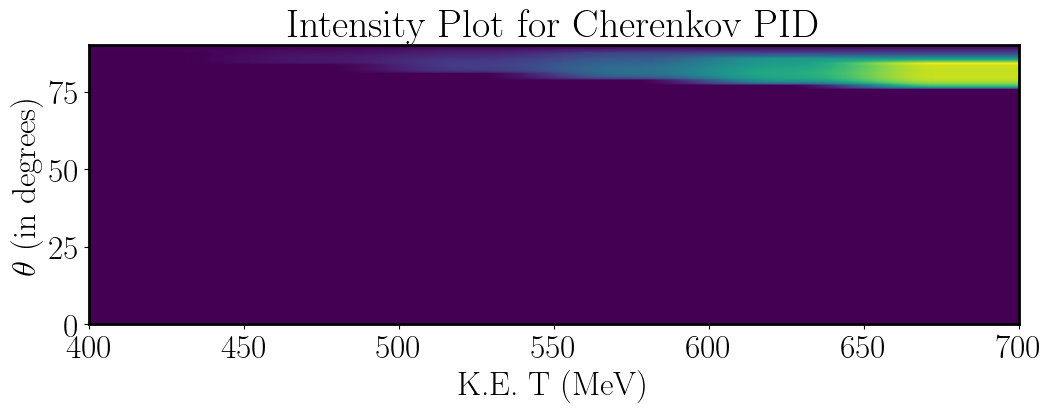

In [16]:
# #Import libraries
# import matplotlib.pyplot as plt
# # from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import pandas as pd
# import seaborn as sns


# # Create a figure and an axes object for 3D plotting:
# fig = plt.figure(figsize=(12,12))
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)

# # Set labels and title:
# ax.set_xlabel('K.E. T (MeV)')
# ax.set_ylabel(r'$\theta$ (in degrees)')
# # ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
# ax.set_title('Intensity Plot for Cherenkov PID')

# # Generate sample 2D data (e.g., a 2D Gaussian)
# # x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# # z = np.exp(-(x**2 + y**2) / 25)

# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# # y = list(reversed(yr))
# # print(y, yr)
# # y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# # print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))

# X, Y = np.meshgrid(x, y)

# #test intensity functions
# # Z = X**2 + Y**2
# # Z = (X*Y)**4

# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

# print(x,y,z)
# print(np.shape(x), np.shape(y), np.shape(z))

# Z = z.T  #taking Transpose of z
# # Z = np.linspace(total500t, total500t, 2000)
# # Z = np.vstack((z, z)).T #you can transpose y >>> y = y.T

# print(X, Y, Z)
# print(np.shape(X), np.shape(Y), np.shape(Z))

# # Create the intensity plot using imshow
# # First define a mappable such as an image (with imshow) or a contour set (with contourf).
# # plt.imshow(z, extent=[500, 1000, np.min(y), np.max(y)], origin='lower', cmap='viridis')
# plt.imshow(Z, extent=[400, 700, np.min(y), np.max(y)], origin='lower', cmap='viridis') #np.min(x), np.max(x), np.min(y), np.max(y): 700, 800, 0, 40
# # ax.contourf(Z, extent=[500, 1000, np.min(y), np.max(y)], origin='lower', cmap='viridis')
# # sns.heatmap(Z, annot=True, linewidths=.5, linecolor='black') #fmt="d", 

# # plt.colorbar(label='Intensity')  # Add a colorbar to show intensity scale

# # plt.xlabel('K.E. T (MeV)')
# # # ax.set_ylabel(r'$\theta$ (in degrees)'))
# # plt.ylabel(r'$\theta$ (in degrees)')
# # plt.title('Cherenkov PID Intensity Plot')
# # plt.title('Contour Plot')

# # plt.contour(X, Y, Z)

# # plt.savefig("Cherenkov_PID_proton_density_plot.jpg", bbox_inches= 'tight')
# # plt.savefig("Cherenkov_PID_proton_contour_plot.jpg", bbox_inches= 'tight')

# plt.show()



In [8]:
X = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total500t  #Total AD

theta500r = theta500[::-1] #reverse an array
print(theta500r*(180/np.pi))
total500tr = total500t[::-1]
# print(Y, Z)

# print(np.shape(X), np.shape(Y), np.shape(Z))
# ax.plot_surface(X, Y, Z, cmap='viridis')
# ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(600, 600, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta600*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total600t  #Total AD dN/dtheta
# ax.plot(X, Y, Z) #, cmap='viridis'
theta600r = theta600[::-1] #reverse an array
total600tr = total600t[::-1]
print(theta600r*(180/np.pi))


X = np.linspace(700, 700, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta700*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total700t #Total AD: dN/dtheta
# ax.plot(X, Y, Z) #, cmap='viridis'
theta700r = theta700[::-1] #reverse an array
total700tr = total700t[::-1]


X = np.linspace(800, 800, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta800*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total800t  #Total AD: dN/dtheta
# ax.plot(X, Y, Z) #, cmap='viridis'
theta800r = theta800[::-1] #reverse an array
total800tr = total800t[::-1]


X = np.linspace(900, 900, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta900*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total900t  #Total AD: dN/dtheta
# ax.plot(X, Y, Z) #, cmap='viridis'
theta900r = theta900[::-1] #reverse an array
total900tr = total900t[::-1]


X = np.linspace(1000, 1000, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta1000*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total1000t  #Total AD: dN/dtheta 
# print(Y, Z)
# print(np.max(Z))
# ax.plot(X, Y, Z) #, cmap='viridis'
theta1000r = theta1000[::-1] #reverse an array
total1000tr = total1000t[::-1]


# X = np.linspace(1200, 1200, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = costheta1200 #cosine of Cherenkov angle, cos(theta)
# Z = total1200  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'


# X = np.linspace(1500, 1500, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = costheta1500 #cosine of Cherenkov angle, cos(theta)
# Z = total1500  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(1800, 1800, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = costheta1800 #cosine of Cherenkov angle, cos(theta)
# Z = total1800  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(2000, 2000, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = costheta2000 #cosine of Cherenkov angle, cos(theta)
# Z = total2000  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'


[ 0.          1.81238033  2.56319972 ... 89.94267555 89.97133778
 90.        ]
[ 0.          1.81238033  2.56319972 ... 89.94267555 89.97133778
 90.        ]


In [44]:
my_array = [1, 2, 3, 4, 5]
my_array.reverse()
print(my_array)  # Output: [5, 4, 3, 2, 1]

[5, 4, 3, 2, 1]


In [49]:
my_array = [1, 2, 3, 4, 5]
reversed_array = my_array[::-1]
print(reversed_array)  # Output: [5, 4, 3, 2, 1]
print(my_array) # Output: [1, 2, 3, 4, 5]

#Using reversed() function
# This returns an iterator that yields items in reverse order. It's memory-efficient, especially for large lists.

my_array = [1, 2, 3, 4, 5]
reversed_iterator = reversed(my_array)
reversed_array = list(reversed_iterator) # To get a list
print(reversed_array)  # Output: [5, 4, 3, 2, 1]

[5, 4, 3, 2, 1]
[1, 2, 3, 4, 5]
[5, 4, 3, 2, 1]


In [9]:
# #Import libraries
# import matplotlib.pyplot as plt
# # from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# import pandas as pd
# import seaborn as sns


# # Create a figure and an axes object for 3D plotting:
# fig = plt.figure(figsize=(12,12))
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)

# # Set labels and title:
# ax.set_xlabel('K.E. T (MeV)')
# ax.set_ylabel(r'$\theta$ (in degrees)')
# # ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
# ax.set_title('Intensity Plot for Cherenkov PID')

# # Generate sample 2D data (e.g., a 2D Gaussian)
# # x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# # z = np.exp(-(x**2 + y**2) / 25)

# # x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
# x = np.array([t_500, t_600, t_700, t_800, t_900, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D)
# # y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
# y = np.linspace(theta500r*(180/np.pi), theta500r*(180/np.pi), 6).flatten() #Cherenkov angle, (theta) 
# z = np.array([total500tr, total600tr, total700tr, total800tr, total900tr, total1000tr]).flatten() #Total AD

# # # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# # x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# # y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# # z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

# print(x,y,z)
# print(np.shape(x), np.shape(y), np.shape(z))


# # y = list(reversed(yr))
# # print(y, yr)
# # y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# # print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))

# # X, Y = np.meshgrid(x, y)
# # Z = np.meshgrid(z, z)

# # print(X)
# # print(Y)
# # print(Z)

# #test intensity functions
# # Z = X**2 + Y**2
# # Z = (X*Y)**4


# # Z = z.T  #taking Transpose of z
# # Z = z

# # Z = np.linspace(total500t, total500t, 2000)
# # Z = np.vstack((z, z)).T #you can transpose y >>> y = y.T

# # print(X, Y, Z)
# # print(np.shape(X), np.shape(Y), np.shape(Z))



# # Sample data (replace with your actual data)
# # data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# # data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}
# data = {'x': x , 'y': y, 'z': z}
# df = pd.DataFrame(data)

# print(df)

# # Ensure 'x' and 'y' are treated as categories
# df['x'] = df['x'].astype('category')
# df['y'] = df['y'].astype('category')

# # Create a pivot table for the matrix plot
# pivot_df = df.pivot_table(index='y', columns='x', values='z')

# # Use heatmap with clear separation
# ax = sns.heatmap(pivot_df, annot=True, linewidths=.5, linecolor='black') #fmt="d", 
# ax.invert_yaxis()
# # plt.savefig("Cherenkov_PID_proton_attempt.jpg", bbox_inches= 'tight')

# plt.show()



# # Create the intensity plot using imshow
# # First define a mappable such as an image (with imshow) or a contour set (with contourf).
# # plt.imshow(z, extent=[500, 1000, np.min(y), np.max(y)], origin='lower', cmap='viridis')
# # plt.imshow(Z, extent=[500, 600, np.min(y), np.max(y)], origin='lower', cmap='viridis') #np.min(x), np.max(x), np.min(y), np.max(y): 700, 800, 0, 40
# # ax.contourf(Z, extent=[500, 1000, np.min(y), np.max(y)], origin='lower', cmap='viridis')
# # plt.colorbar(label='Intensity')  # Add a colorbar to show intensity scale
# # sns.heatmap(Z, annot=True, linewidths=.5, linecolor='black') #fmt="d", 


# # plt.xlabel('K.E. T (MeV)')
# # # ax.set_ylabel(r'$\theta$ (in degrees)'))
# # plt.ylabel(r'$\theta$ (in degrees)')
# # plt.title('Cherenkov PID Intensity Plot')
# # plt.title('Contour Plot')

# # plt.contour(X, Y, Z)

# # plt.savefig("Cherenkov_PID_proton_density_plot.jpg", bbox_inches= 'tight')
# # plt.savefig("Cherenkov_PID_proton_contour_plot.jpg", bbox_inches= 'tight')

# # plt.show()

[ 500.  500.  500. ... 1000. 1000. 1000.] [90.         89.97133778 89.94267555 ...  2.56319972  1.81238033
  0.        ] [  0.           0.           0.         ... 231.67841479  81.30390364
   0.        ]
(12000,) (12000,) (12000,)
       K.E. T (MeV)  $\theta$ (in degrees)  $dN/d\theta$
0             500.0              90.000000      0.000000
1             500.0              89.971338      0.000000
2             500.0              89.942676      0.000000
3             500.0              89.914013      0.000000
4             500.0              89.885351      0.000000
...             ...                    ...           ...
11995        1000.0               3.625214    657.819469
11996        1000.0               3.139397    425.628643
11997        1000.0               2.563200    231.678415
11998        1000.0               1.812380     81.303904
11999        1000.0               0.000000      0.000000

[12000 rows x 3 columns]


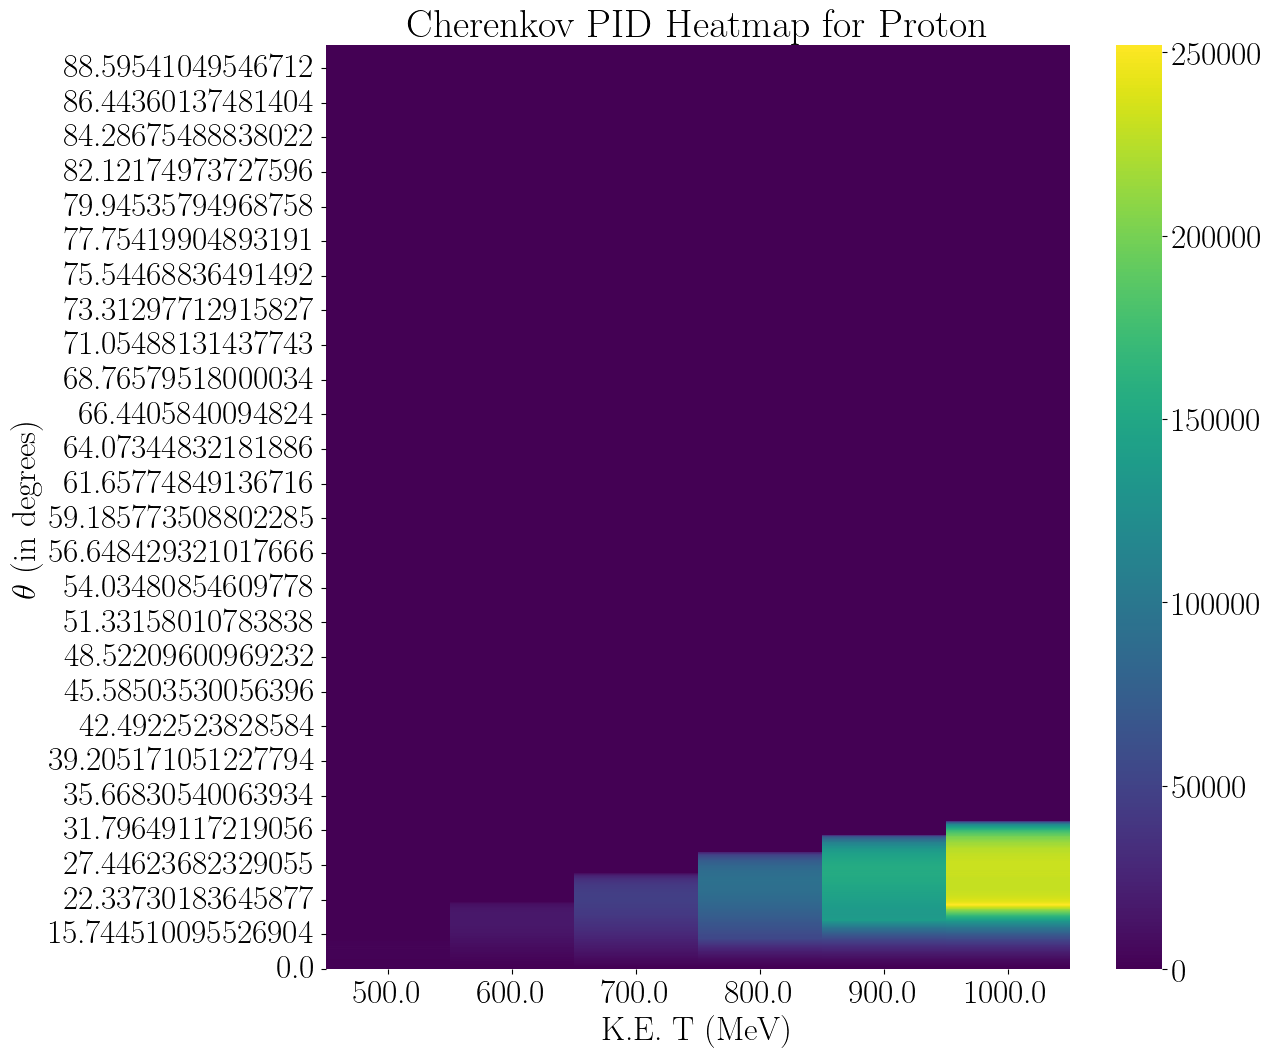

In [10]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov PID Heatmap for Proton')

# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

t_500 = np.linspace(500, 500, 2000)
t_600 = np.linspace(600, 600, 2000)
t_700 = np.linspace(700, 700, 2000)
t_800 = np.linspace(800, 800, 2000)
t_900 = np.linspace(900, 900, 2000)
t_1000 = np.linspace(1000, 1000, 2000)


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([t_500, t_600, t_700, t_800, t_900, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D)
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 6).flatten() #Cherenkov angle, (theta) 
z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t]).flatten() #Total AD

# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

# data = {'x': x , 'y': y, 'z': z}
data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

print(df)

# # Ensure 'x' and 'y' are treated as categories
# df['x'] = df['x'].astype('category')
# df['y'] = df['y'].astype('category')

df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
# pivot_df = df.pivot_table(index='y', columns='x', values='z')
pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='viridis', alpha=1) #, yticklabels=np.linspace(0,90,10)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()
# ax.set_ylim(0,50)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_proton_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_proton_heatmap_viridis.jpg", bbox_inches= 'tight')

plt.show()

[ 500.  500.  500. ... 1000. 1000. 1000.] [90.         89.97133778 89.94267555 ...  2.56319972  1.81238033
  0.        ] [  0.           0.           0.         ... 231.67841479  81.30390364
   0.        ]
(12000,) (12000,) (12000,)
            x          y           z
0       500.0  90.000000    0.000000
1       500.0  89.971338    0.000000
2       500.0  89.942676    0.000000
3       500.0  89.914013    0.000000
4       500.0  89.885351    0.000000
...       ...        ...         ...
11995  1000.0   3.625214  657.819469
11996  1000.0   3.139397  425.628643
11997  1000.0   2.563200  231.678415
11998  1000.0   1.812380   81.303904
11999  1000.0   0.000000    0.000000

[12000 rows x 3 columns]


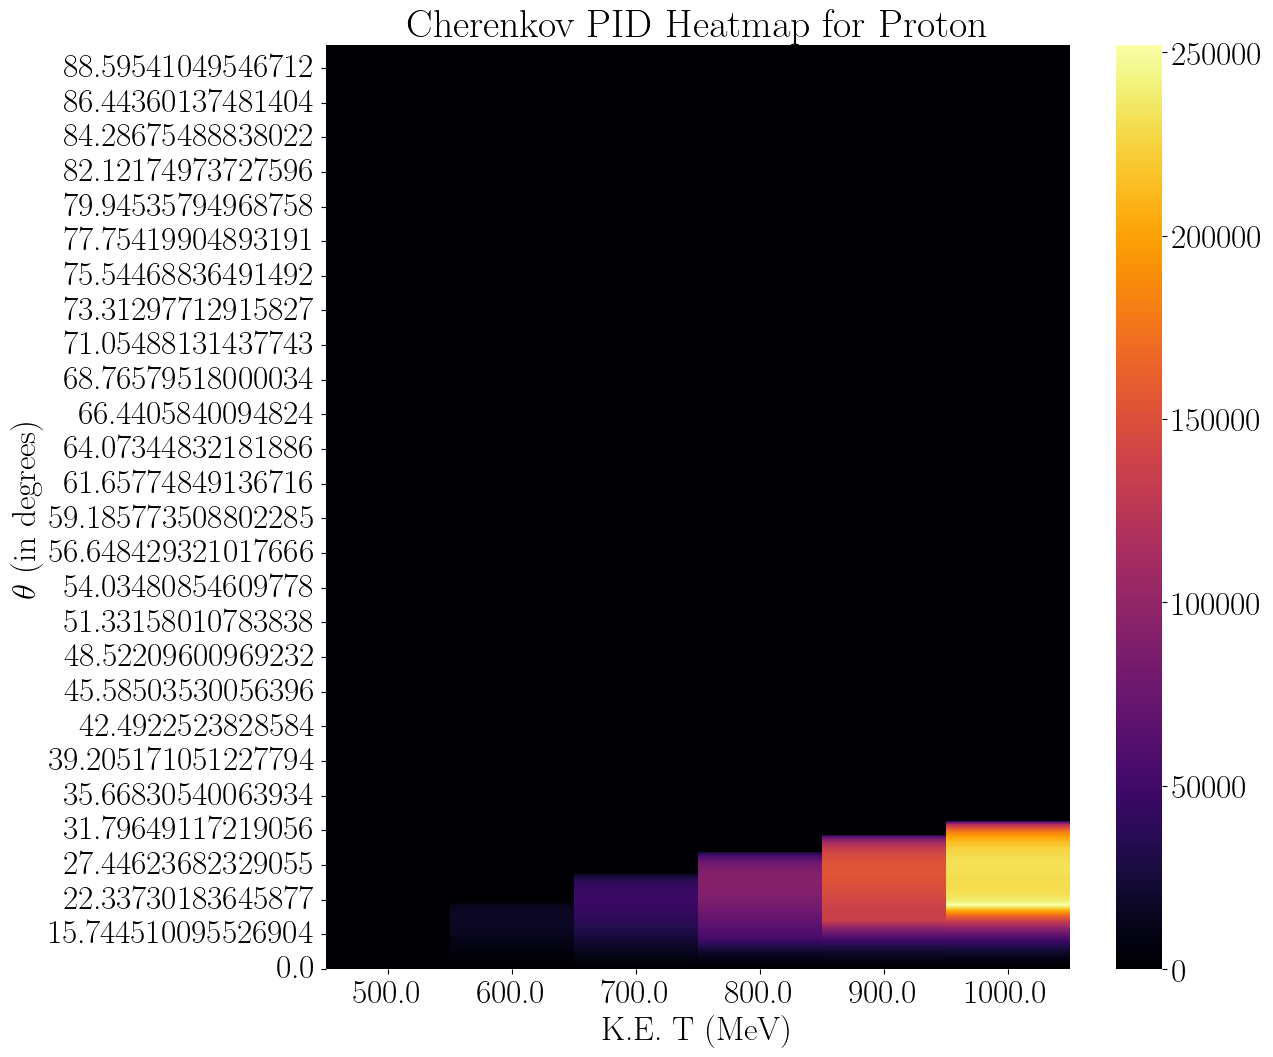

In [8]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

t_500 = np.linspace(500, 500, 2000)
t_600 = np.linspace(600, 600, 2000)
t_700 = np.linspace(700, 700, 2000)
t_800 = np.linspace(800, 800, 2000)
t_900 = np.linspace(900, 900, 2000)
t_1000 = np.linspace(1000, 1000, 2000)


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([t_500, t_600, t_700, t_800, t_900, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D)
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 6).flatten() #Cherenkov angle, (theta) 
z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t]).flatten() #Total AD

# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z')
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov PID Heatmap for Proton')

# ax.set_ylim(0,50)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_proton_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_proton_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

plt.show()

[500. 500. 500. ... 500. 500. 500.] [90.         89.97133778 89.94267555 ...  2.56319972  1.81238033
  0.        ] [ 0.          0.          0.         ... 36.46649883 12.70923294
  0.        ]
(2000,) (2000,) (2000,)
          x          y          z
0     500.0  90.000000   0.000000
1     500.0  89.971338   0.000000
2     500.0  89.942676   0.000000
3     500.0  89.914013   0.000000
4     500.0  89.885351   0.000000
...     ...        ...        ...
1995  500.0   3.625214  98.780578
1996  500.0   3.139397  64.827994
1997  500.0   2.563200  36.466499
1998  500.0   1.812380  12.709233
1999  500.0   0.000000   0.000000

[2000 rows x 3 columns]


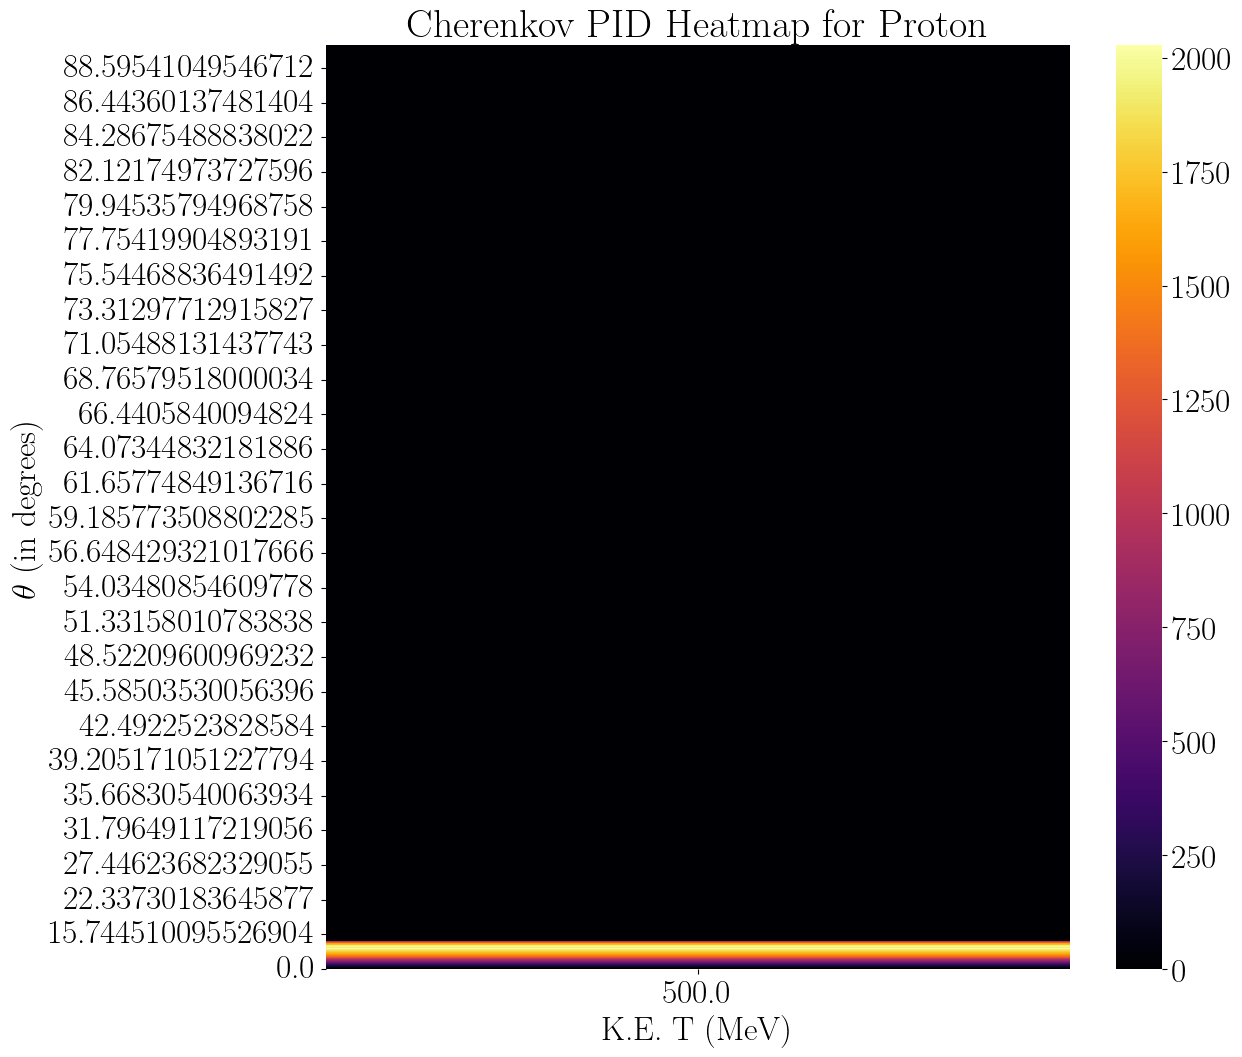

In [9]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

t_500 = np.linspace(500, 500, 2000)
t_600 = np.linspace(600, 600, 2000)
t_700 = np.linspace(700, 700, 2000)
t_800 = np.linspace(800, 800, 2000)
t_900 = np.linspace(900, 900, 2000)
t_1000 = np.linspace(1000, 1000, 2000)


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([t_500]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) #, t_600, t_700, t_800, t_900, t_1000
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 1).flatten() #Cherenkov angle, (theta) 
z = np.array([total500t]).flatten() #Total AD #, total600t, total700t, total800t, total900t, total1000t

# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z')
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov PID Heatmap for Proton')

# ax.set_ylim(0,50)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_proton_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_proton_heatmap_inferno_500MeV.jpg", bbox_inches= 'tight') #viridis, 

plt.show()

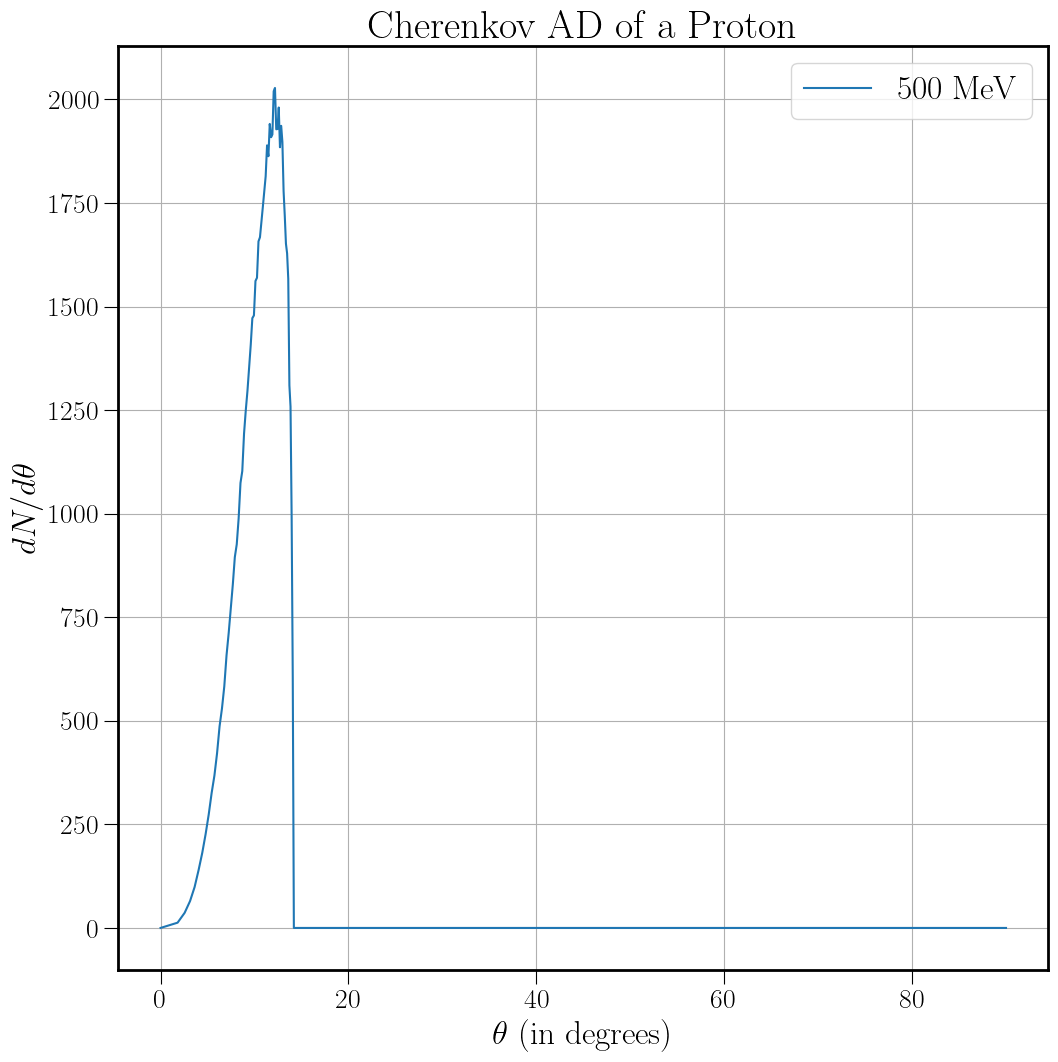

In [10]:

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# Set labels and title:
ax.set_xlabel(r'$\theta$ (in degrees)')
ax.set_ylabel(r'$dN/d\theta$')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov AD of a Proton')
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# # Access a specific array
# costheta500 = data500['costheta']
# theta500 = np.arccos(costheta500)
# total500 = data500['total500']
# total500t = total500*np.sin(theta500)
# # scint500 = data500['scint500']

ax.plot(theta500*(180/np.pi), total500t, label='500 MeV')

# ax.plot(theta800*(180/np.pi), total800t, label='800 MeV')

# ax.plot(theta1000*(180/np.pi), total1000t, label='1000 MeV')

# ax.plot(theta1200*(180/np.pi), total1200t, label='1200 MeV')

# ax.plot(theta1500*(180/np.pi), total1500t, label='1500 MeV')

ax.legend()
# ax.set_xlim(0,45)
ax.grid()

# plt.savefig('Cherenkov_AD_Proton_allT_from_saved_data', bbox_inches='tight')
# plt.savefig('Cherenkov_AD_Proton_500MeV_from_saved_data', bbox_inches='tight')

# Close the file
# data.close()


# Proton PID: New Data

['theta', 'costheta', 'totalho', 'normalho', 'anomalousho', 'scint']
['theta', 'costheta', 'totalb', 'scint']
['theta', 'costheta', 'totalb', 'scint']
['theta', 'costheta', 'totalb', 'scint']


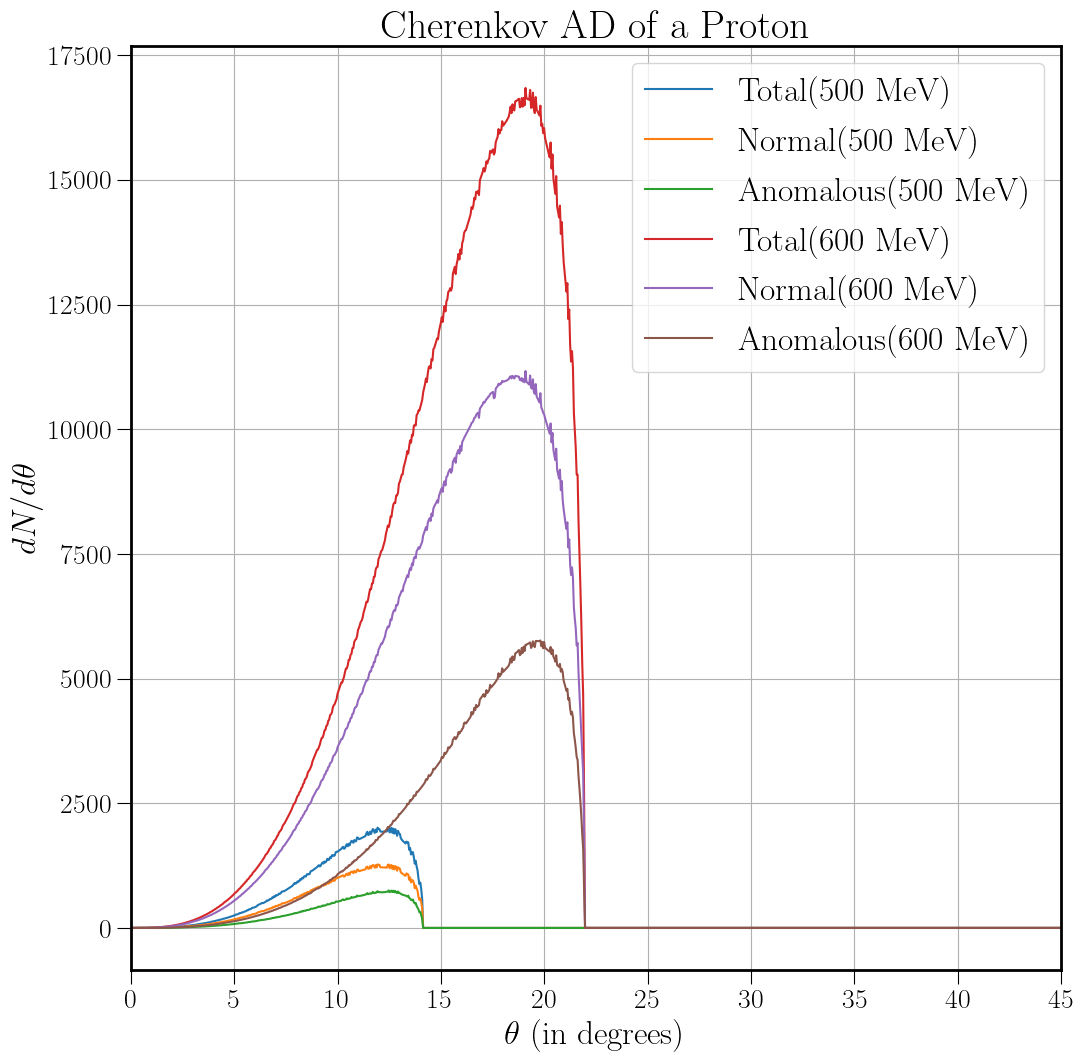

In [73]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# # 3D Surface Plot:
# x = np.arange(-5, 5, 0.25)
# y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))
# ax.plot_surface(X, Y, Z, cmap='viridis')

# Load the .npz file
#HO fit
pdata500ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p500_ho.npz')
pdata550ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p550_ho.npz')
pdata600ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p600_ho.npz')
pdata650ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p650_ho.npz')
pdata700ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p700_ho.npz')
pdata750ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p750_ho.npz')
pdata800ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p800_ho.npz')
pdata850ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p850_ho.npz')
pdata900ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p900_ho.npz')
pdata950ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p950_ho.npz')
pdata1000ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p1000_ho.npz')

#Babicz fit
pdata500b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p500_babicz.npz')
pdata550b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p550_babicz.npz')
pdata600b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p600_babicz.npz')
pdata650b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p650_babicz.npz')
pdata700b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p700_babicz.npz')
pdata750b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p750_babicz.npz')
pdata800b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p800_babicz.npz')
pdata850b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p850_babicz.npz')
pdata900b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p900_babicz.npz')
pdata950b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p950_babicz.npz')
pdata1000b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_p1000_babicz.npz')

# List the names of the arrays in the file
print(pdata500ho.files)
print(pdata500b.files)
print(pdata600b.files)
print(pdata700b.files)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# Set labels and title:
ax.set_xlabel(r'$\theta$ (in degrees)')
ax.set_ylabel(r'$dN/d\theta$')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov AD of a Proton')
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# Access a specific array
costheta500 = pdata500ho['costheta']
theta500 = pdata500ho['theta']
total500 = pdata500ho['totalho']
normal500 = pdata500ho['normalho']
anom500 = pdata500ho['anomalousho']
total500t = total500*np.sin(theta500)
normal500t = normal500*np.sin(theta500)
anom500t = anom500*np.sin(theta500)

total500b = pdata500b['totalb']
total500bt = total500b*np.sin(theta500)

# scint500 = data500['scint500']
ax.plot(theta500*(180/np.pi), total500t, label='Total(500 MeV)')
ax.plot(theta500*(180/np.pi), normal500t, label='Normal(500 MeV)')
ax.plot(theta500*(180/np.pi), anom500t, label='Anomalous(500 MeV)')

# Access a specific array
costheta550 = pdata550ho['costheta']
theta550 = pdata550ho['theta']
total550 = pdata550ho['totalho']
normal550 = pdata550ho['normalho']
anom550 = pdata550ho['anomalousho']
total550t = total550*np.sin(theta550)
normal550t = normal550*np.sin(theta550)
anom550t = anom550*np.sin(theta550)

total550b = pdata550b['totalb']
total550bt = total550b*np.sin(theta550)


# Access a specific array
costheta600 = pdata600ho['costheta']
theta600 = pdata600ho['theta']
total600 = pdata600ho['totalho']
normal600 = pdata600ho['normalho']
anom600 = pdata600ho['anomalousho']
total600t = total600*np.sin(theta600)
normal600t = normal600*np.sin(theta600)
anom600t = anom600*np.sin(theta600)

total600b = pdata600b['totalb']
total600bt = total600b*np.sin(theta600)
# scint600 = data600['scint600']
ax.plot(theta600*(180/np.pi), total600t, label='Total(600 MeV)')
ax.plot(theta600*(180/np.pi), normal600t, label='Normal(600 MeV)')
ax.plot(theta600*(180/np.pi), anom600t, label='Anomalous(600 MeV)')


# Access a specific array
costheta650 = pdata650ho['costheta']
theta650 = pdata650ho['theta']
total650 = pdata650ho['totalho']
normal650 = pdata650ho['normalho']
anom650 = pdata650ho['anomalousho']
total650t = total650*np.sin(theta650)
normal650t = normal650*np.sin(theta650)
anom650t = anom650*np.sin(theta650)

total650b = pdata650b['totalb']
total650bt = total650b*np.sin(theta650)


# Access a specific array
costheta700 = pdata700ho['costheta']
theta700 = pdata700ho['theta']
total700 = pdata700ho['totalho']
normal700 = pdata700ho['normalho']
anom700 = pdata700ho['anomalousho']
total700t = total700*np.sin(theta700)
normal700t = normal700*np.sin(theta700)
anom700t = anom700*np.sin(theta700)
# scint700 = pdata700ho['scint700']
total700b = pdata700b['totalb']
total700bt = total700b*np.sin(theta700)

# Access a specific array
costheta750 = pdata750ho['costheta']
theta750 = pdata750ho['theta']
total750 = pdata750ho['totalho']
normal750 = pdata750ho['normalho']
anom750 = pdata750ho['anomalousho']
total750t = total750*np.sin(theta750)
normal750t = normal750*np.sin(theta750)
anom750t = anom750*np.sin(theta750)
# scint700 = pdata700ho['scint700']
total750b = pdata750b['totalb']
total750bt = total750b*np.sin(theta750)


# Access a specific array
costheta800 = pdata800ho['costheta']
theta800 = pdata800ho['theta']
total800 = pdata800ho['totalho']
normal800 = pdata800ho['normalho']
anom800 = pdata800ho['anomalousho']
total800t = total800*np.sin(theta800)
normal800t = normal800*np.sin(theta800)
anom800t = anom800*np.sin(theta800)
# scint800 = pdata800ho['scint800']
total800b = pdata800b['totalb']
total800bt = total800b*np.sin(theta800)

# Access a specific array
costheta850 = pdata850ho['costheta']
theta850 = pdata850ho['theta']
total850 = pdata850ho['totalho']
normal850 = pdata850ho['normalho']
anom850 = pdata850ho['anomalousho']
total850t = total850*np.sin(theta850)
normal850t = normal850*np.sin(theta850)
anom850t = anom850*np.sin(theta850)
# scint800 = pdata800ho['scint700']
total850b = pdata850b['totalb']
total850bt = total850b*np.sin(theta850)


# Access a specific array
costheta900 = pdata900ho['costheta']
theta900 = pdata900ho['theta']
total900 = pdata900ho['totalho']
normal900 = pdata900ho['normalho']
anom900 = pdata900ho['anomalousho']
total900t = total900*np.sin(theta900)
normal900t = normal900*np.sin(theta900)
anom900t = anom900*np.sin(theta900)
# scint900 = pdata900ho['scint900']
total900b = pdata900b['totalb']
total900bt = total900b*np.sin(theta900)

# Access a specific array
costheta950 = pdata950ho['costheta']
theta950 = pdata950ho['theta']
total950 = pdata950ho['totalho']
normal950 = pdata950ho['normalho']
anom950 = pdata950ho['anomalousho']
total950t = total950*np.sin(theta950)
normal950t = normal950*np.sin(theta950)
anom950t = anom950*np.sin(theta950)
# scint900 = pdata900ho['scint900']
total950b = pdata950b['totalb']
total950bt = total950b*np.sin(theta950)


# Access a specific array
costheta1000 = pdata1000ho['costheta']
theta1000 = pdata1000ho['theta']
total1000 = pdata1000ho['totalho']
normal1000 = pdata1000ho['normalho']
anom1000 = pdata1000ho['anomalousho']
total1000t = total1000*np.sin(theta1000)
normal1000t = normal1000*np.sin(theta1000)
anom1000t = anom1000*np.sin(theta1000)
# scint1000 = pdata1000ho['scint1000']
total1000b = pdata1000b['totalb']
total1000bt = total1000b*np.sin(theta1000)



# # Access a specific array
# costheta1200 = data1200['costheta']
# theta1200 = np.arccos(costheta1200)
# total1200 = data1200['total1200']
# total1200t = total1200*np.sin(theta1200)
# # scint1200 = data1200['scint1200']
# ax.plot(theta1200*(180/np.pi), total1200t, label='1200 MeV')


# # Access a specific array
# costheta1500 = data1500['costheta']
# theta1500 = np.arccos(costheta1500)
# total1500 = data1500['total1500']
# total1500t = total1500*np.sin(theta1500)
# # scint1500 = data1500['scint1500']
# ax.plot(theta1500*(180/np.pi), total1500t, label='1500 MeV')


# # Access a specific array
# costheta1800 = data1800['costheta']
# theta1800 = np.arccos(costheta1800)
# total1800 = data1800['total1800']
# total1800t = total1800*np.sin(theta1800)
# # scint1800 = data1800['scint1800']

# # Access a specific array
# costheta2000 = data2000['costheta']
# theta2000 = np.arccos(costheta2000)
# total2000 = data2000['total2000']
# total2000t = total2000*np.sin(theta2000)
# # scint2000 = data1000['scint2000']


ax.legend()
ax.set_xlim(0,45)
ax.grid()

# plt.savefig('Cherenkov_AD_Proton_allT_from_saved_data', bbox_inches='tight')
# plt.savefig('Cherenkov_AD_Proton_500_600_MeV_from_new_saved_data_ho', bbox_inches='tight')

# Close the file
# data.close()


[0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.         0.00018002 0.00144022 ... 0.         0.         0.        ]
(2000,) (2000,) (2000,)
[0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.         0.00032003 0.00256023 ... 0.         0.         0.        ]
(2000,) (2000,) (2000,)
[0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.         0.0012251  0.00980058 ... 0.         0.         0.        ]
252800.2390486427


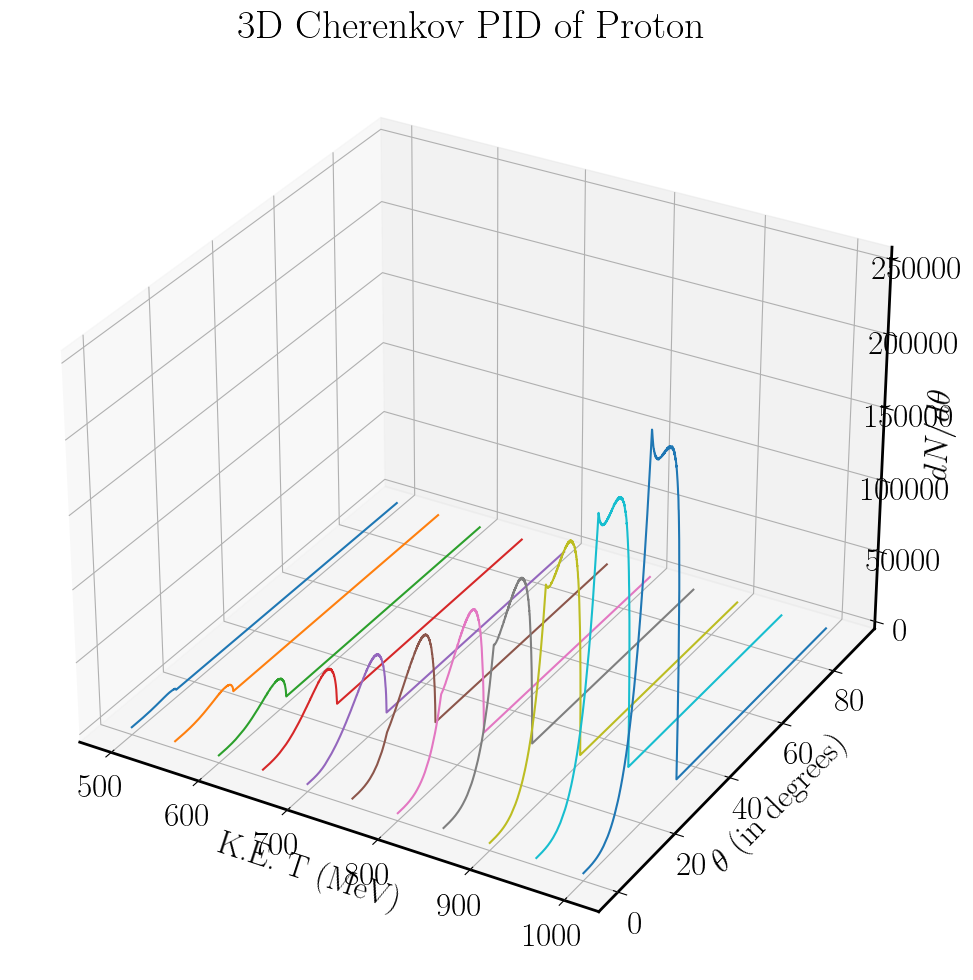

In [77]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('3D Cherenkov PID of Proton')

X = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total500t  #Total AD
print(Y, Z)
print(np.shape(X), np.shape(Y), np.shape(Z))
# ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(550, 550, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta550*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total550t  #Total AD
print(Y, Z)
print(np.shape(X), np.shape(Y), np.shape(Z))
# ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(600, 600, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta600*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total600t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(650, 650, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta650*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total650t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(700, 700, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta700*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total700t #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(750, 750, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta750*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total750t #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(800, 800, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta800*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total800t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(850, 850, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta850*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total850t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(900, 900, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta900*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total900t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(950, 950, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta950*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total950t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(1000, 1000, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta1000*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total1000t  #Total AD: dN/dtheta 
ax.plot(X, Y, Z) #, cmap='viridis'
print(Y, Z)
print(np.max(Z))

# X = np.linspace(1200, 1200, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta1200*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total1200t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(1500, 1500, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta1500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total1500t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(1800, 1800, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta1800*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total1800t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(2000, 2000, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta2000*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total2000t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'



# X = np.array([500, 600, 700]) #K.E., T in MeV (or mom or beta): Proton

# for t in range(len(X)): #X (MeV)

plt.savefig("3D_Cherenkov_PID_proton_allTs_5hto1k_theta.jpg", bbox_inches= 'tight')
# plt.savefig("3D_Cherenkov_PID_proton_T500-700_theta.jpg", bbox_inches= 'tight')
plt.show()


[ 500.  500.  500. ... 1000. 1000. 1000.] [0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.00000000e+00 5.45762062e-05 4.36619626e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
(22000,) (22000,) (22000,)
            x      y         z
0       500.0   0.00  0.000000
1       500.0   0.05  0.000055
2       500.0   0.09  0.000437
3       500.0   0.14  0.001474
4       500.0   0.18  0.003495
...       ...    ...       ...
21995  1000.0  89.82  0.000000
21996  1000.0  89.86  0.000000
21997  1000.0  89.91  0.000000
21998  1000.0  89.95  0.000000
21999  1000.0  90.00  0.000000

[22000 rows x 3 columns]


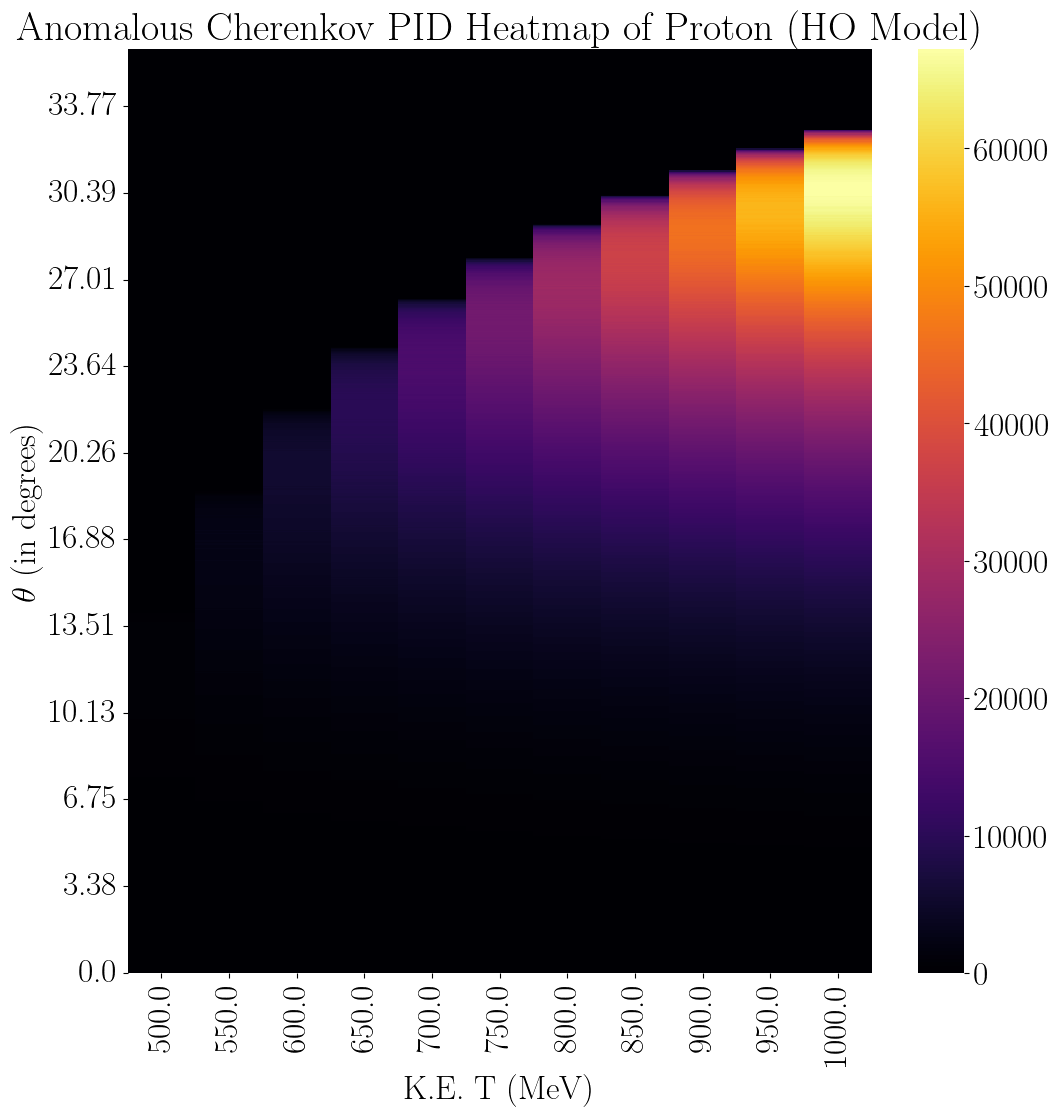

In [83]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

t_500 = np.linspace(500, 500, 2000)
t_550 = np.linspace(550, 550, 2000)
t_600 = np.linspace(600, 600, 2000)
t_650 = np.linspace(650, 650, 2000)
t_700 = np.linspace(700, 700, 2000)
t_750 = np.linspace(750, 750, 2000)
t_800 = np.linspace(800, 800, 2000)
t_850 = np.linspace(850, 850, 2000)
t_900 = np.linspace(900, 900, 2000)
t_950 = np.linspace(950, 950, 2000)
t_1000 = np.linspace(1000, 1000, 2000)


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([t_500, t_550, t_600, t_650, t_700, t_750, t_800, t_850, t_900, t_950, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) 
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 11).flatten() #Cherenkov angle, (theta) 
z = np.array([total500t, total550t, total600t, total650t, total700t, total750t, total800t, total850t, total900t, total950t, total1000t]).flatten() #Total AD #
# z = np.array([normal500t, normal550t, normal600t, normal650t, normal700t, normal750t, normal800t, normal850t, normal900t, normal950t, normal1000t]).flatten() #Normal AD #
# z = np.array([anom500t, anom550t, anom600t, anom650t, anom700t, anom750t, anom800t, anom850t, anom900t, anom950t, anom1000t]).flatten() #Anomalous AD #
 
# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

df.y = df.y.round(2) 

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z').round(4)
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

# majorFormatter = FormatStrFormatter('%0.2f')

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10) #, fmt=".1f"
# ax.yaxis.set_major_formatter(majorFormatter)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Total Cherenkov PID Heatmap of Proton (HO Model)')
# ax.set_title('Normal Cherenkov PID Heatmap of Proton (HO Model)')
# ax.set_title('Anomalous Cherenkov PID Heatmap of Proton (HO Model)')

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

## Modify y-axis labels to rounded numbers with one decimal place

# yticks = ax.get_yticks()
# ax.set_yticklabels([round(df['y'], 2) for df['y'] in yticks])


# # Apply MaxNLocator to force integer ticks
# # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Format y-axis to show full numbers
# ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Formats to 0 decimal places

ax.set_ylim(0,800)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_proton_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_proton_lowT_total_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_lowT_normal_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_lowT_anomalous_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

# plt.savefig("Cherenkov_PID_proton_allTs_total_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_allTs_normal_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_allTs_anomalous_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

plt.show()

0.7299270072992701 1.4630040626110135 0.4342978107291306
[1.09018914 1.09018914 1.09018914 ... 1.69624301 1.69624301 1.69624301] [0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.00000000e+00 5.45762062e-05 4.36619626e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
(22000,) (22000,) (22000,)
          x      y         z
0      1.09   0.00  0.000000
1      1.09   0.05  0.000055
2      1.09   0.09  0.000437
3      1.09   0.14  0.001474
4      1.09   0.18  0.003495
...     ...    ...       ...
21995  1.70  89.82  0.000000
21996  1.70  89.86  0.000000
21997  1.70  89.91  0.000000
21998  1.70  89.95  0.000000
21999  1.70  90.00  0.000000

[22000 rows x 3 columns]


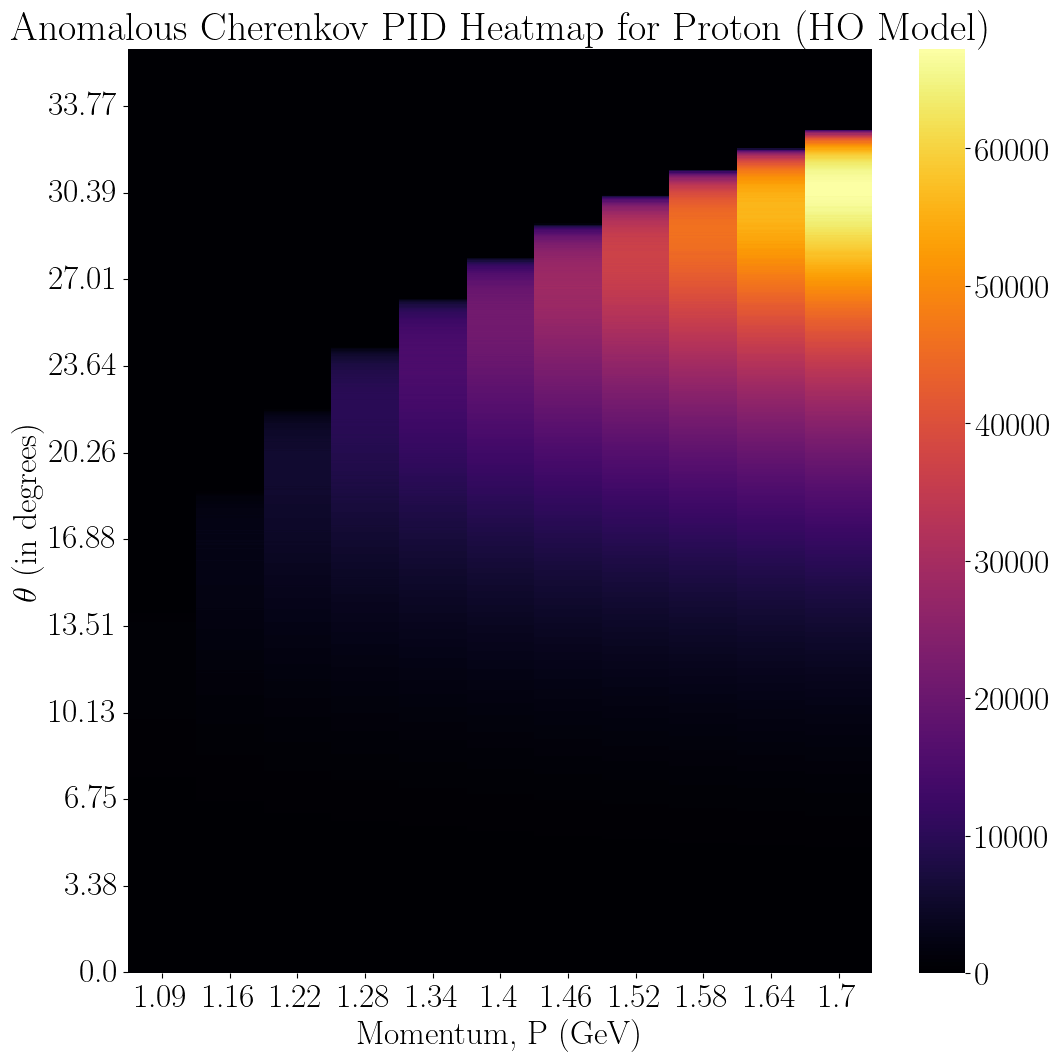

In [101]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

# t_500 = np.linspace(500, 500, 2000)
# t_600 = np.linspace(600, 600, 2000)
# t_700 = np.linspace(700, 700, 2000)
# t_800 = np.linspace(800, 800, 2000)
# t_900 = np.linspace(900, 900, 2000)
# t_1000 = np.linspace(1000, 1000, 2000)

# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the scintillation wavelength of 128 nm)

c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                 #https://arxiv.org/abs/2002.09346

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mu = 1.88e-28  #mass of a muon is approximately 1.883531627 x 10^-28 kg. This is about 207 times the mass of an electron.
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
p = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV

    
# t = np.linspace(0, 2000, 1000) #K.E of Proton  in MeV
# # t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

# tgev= t/1000  #1 GeV = 1.602e-10 J
t = np.array([500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000])
# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)


# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

momp = (p*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
mompgev= momp/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

mommu = (mu*c*betamu)*(1-betamu**2)**(-0.5)  #momentum of proton in kgm/s
mommugev= mommu/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

mome = (e*c*betae)*(1-betae**2)**(-0.5)  #momentum of proton in kgm/s
momegev= mome/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)


momp_500 = np.linspace(mompgev[0], mompgev[0], 2000)
momp_550 = np.linspace(mompgev[1], mompgev[1], 2000)
momp_600 = np.linspace(mompgev[2], mompgev[2], 2000)
momp_650 = np.linspace(mompgev[3], mompgev[3], 2000)
momp_700 = np.linspace(mompgev[4], mompgev[4], 2000)
momp_750 = np.linspace(mompgev[5], mompgev[5], 2000)
momp_800 = np.linspace(mompgev[6], mompgev[6], 2000)
momp_850 = np.linspace(mompgev[7], mompgev[7], 2000)
momp_900 = np.linspace(mompgev[8], mompgev[8], 2000)
momp_950 = np.linspace(mompgev[9], mompgev[9], 2000)
momp_1000 = np.linspace(mompgev[10], mompgev[10], 2000)


# print(mompgev[2])
# print(momp_500, momp_600)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 

# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
# x = np.array([t_500, t_600, t_700]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) , t_800, t_900, t_1000
x = np.array([momp_500, momp_550, momp_600, momp_650, momp_700, momp_750, momp_800, momp_850, momp_900, momp_950, momp_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) , momp_800, momp_900, momp_1000
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 11).flatten() #Cherenkov angle, (theta) 
z = np.array([total500t, total550t, total600t, total650t, total700t, total750t, total800t, total850t, total900t, total950t, total1000t]).flatten() #Total AD #
# z = np.array([normal500t, normal550t, normal600t, normal650t, normal700t, normal750t, normal800t, normal850t, normal900t, normal950t, normal1000t]).flatten() #Normal AD #
# z = np.array([anom500t, anom550t, anom600t, anom650t, anom700t, anom750t, anom800t, anom850t, anom900t, anom950t, anom1000t]).flatten() #Anomalous AD #
 
# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

df.x = df.x.round(2) 
df.y = df.y.round(2) 

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z').round(4)
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

# majorFormatter = FormatStrFormatter('%0.2f')

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10) #, fmt=".1f"
# ax.yaxis.set_major_formatter(majorFormatter)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('Momentum, P (GeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Total Cherenkov PID Heatmap for Proton (HO Model)')
# ax.set_title('Normal Cherenkov PID Heatmap for Proton (HO Model)')
# ax.set_title('Anomalous Cherenkov PID Heatmap for Proton (HO Model)')

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

## Modify y-axis labels to rounded numbers with one decimal place

# yticks = ax.get_yticks()
# ax.set_yticklabels([round(df['y'], 2) for df['y'] in yticks])


# # Apply MaxNLocator to force integer ticks
# # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Format y-axis to show full numbers
# ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Formats to 0 decimal places

ax.set_ylim(0,800)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_proton_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_proton_lowmom_total_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_lowmom_normal_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_lowmom_anomalous_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

# plt.savefig("Cherenkov_PID_proton_allmoms_total_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_allmoms_normal_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_allmoms_anomalous_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

plt.show()

[ 500.  500.  500. ... 1000. 1000. 1000.] [0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.00000000e+00 1.57429191e-03 1.25861916e-02 ... 1.33245242e+02
 6.66226066e+01 3.29299727e-03]
(22000,) (22000,) (22000,)
            x      y           z
0       500.0   0.00    0.000000
1       500.0   0.05    0.001574
2       500.0   0.09    0.012586
3       500.0   0.14    0.042434
4       500.0   0.18    0.100439
...       ...    ...         ...
21995  1000.0  89.82  266.490710
21996  1000.0  89.86  199.867933
21997  1000.0  89.91  133.245242
21998  1000.0  89.95   66.622607
21999  1000.0  90.00    0.003293

[22000 rows x 3 columns]


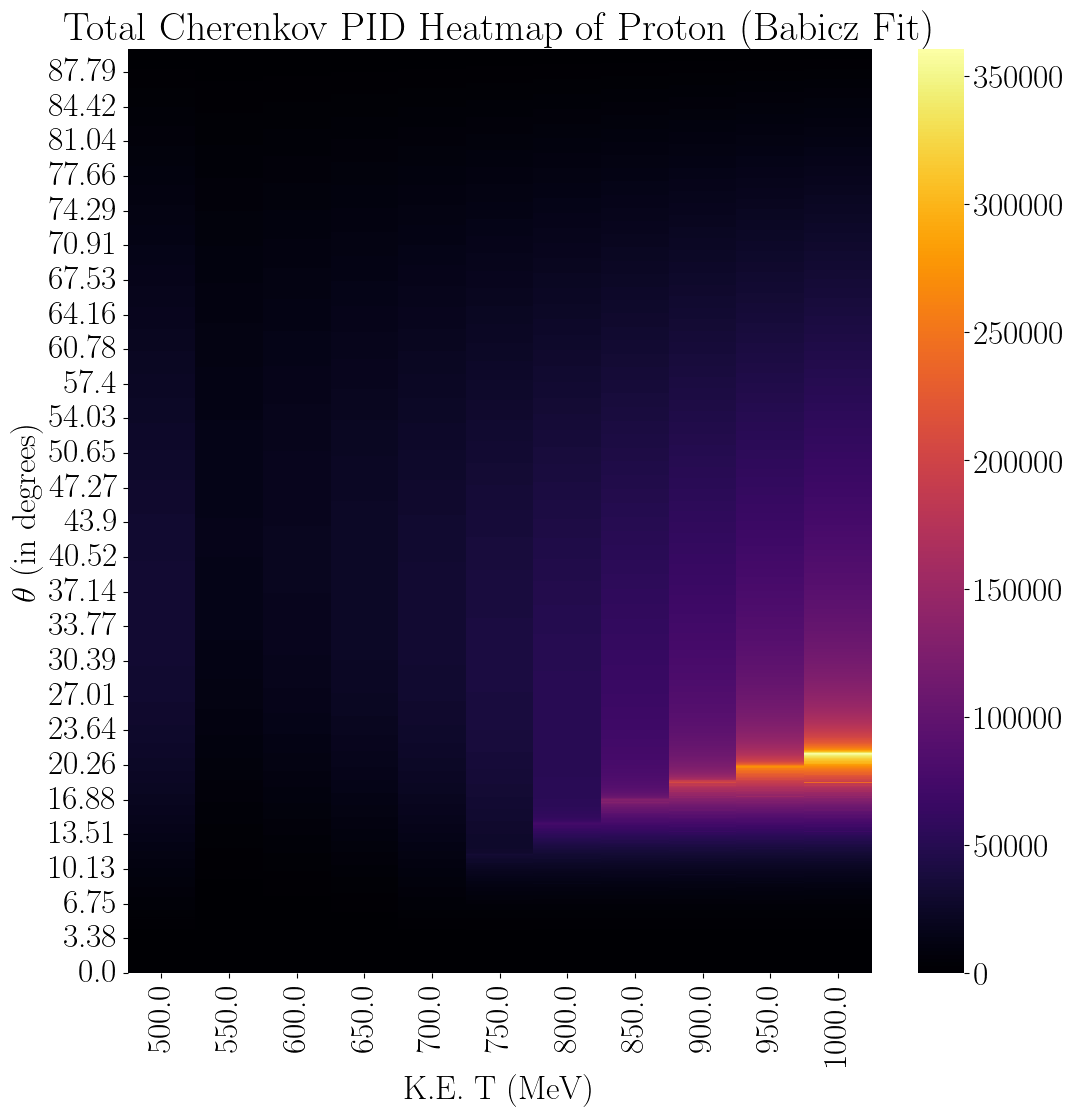

In [103]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

t_500 = np.linspace(500, 500, 2000)
t_550 = np.linspace(550, 550, 2000)
t_600 = np.linspace(600, 600, 2000)
t_650 = np.linspace(650, 650, 2000)
t_700 = np.linspace(700, 700, 2000)
t_750 = np.linspace(750, 750, 2000)
t_800 = np.linspace(800, 800, 2000)
t_850 = np.linspace(850, 850, 2000)
t_900 = np.linspace(900, 900, 2000)
t_950 = np.linspace(950, 950, 2000)
t_1000 = np.linspace(1000, 1000, 2000)


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([t_500, t_550, t_600, t_650, t_700, t_750, t_800, t_850, t_900, t_950, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) 
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 11).flatten() #Cherenkov angle, (theta) 
z = np.array([total500bt, total550bt, total600bt, total650bt, total700bt, total750bt, total800bt, total850bt, total900bt, total950bt, total1000bt]).flatten() #Total AD #
 
# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

df.y = df.y.round(2) 

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z').round(4)
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

# majorFormatter = FormatStrFormatter('%0.2f')

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10) #, fmt=".1f"
# ax.yaxis.set_major_formatter(majorFormatter)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Total Cherenkov PID Heatmap of Proton (Babicz Fit)')

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

## Modify y-axis labels to rounded numbers with one decimal place

# yticks = ax.get_yticks()
# ax.set_yticklabels([round(df['y'], 2) for df['y'] in yticks])


# # Apply MaxNLocator to force integer ticks
# # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Format y-axis to show full numbers
# ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Formats to 0 decimal places

# ax.set_ylim(0,600)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_proton_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_proton_lowT_total_babicz_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_proton_allTs_total_babicz_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
plt.show()

# Muon PID: New Data

['theta', 'costheta', 'totalho', 'normalho', 'anomalousho', 'scint']
['theta', 'costheta', 'totalb', 'scint']
['theta', 'costheta', 'totalb', 'scint']
['theta', 'costheta', 'totalb', 'scint']


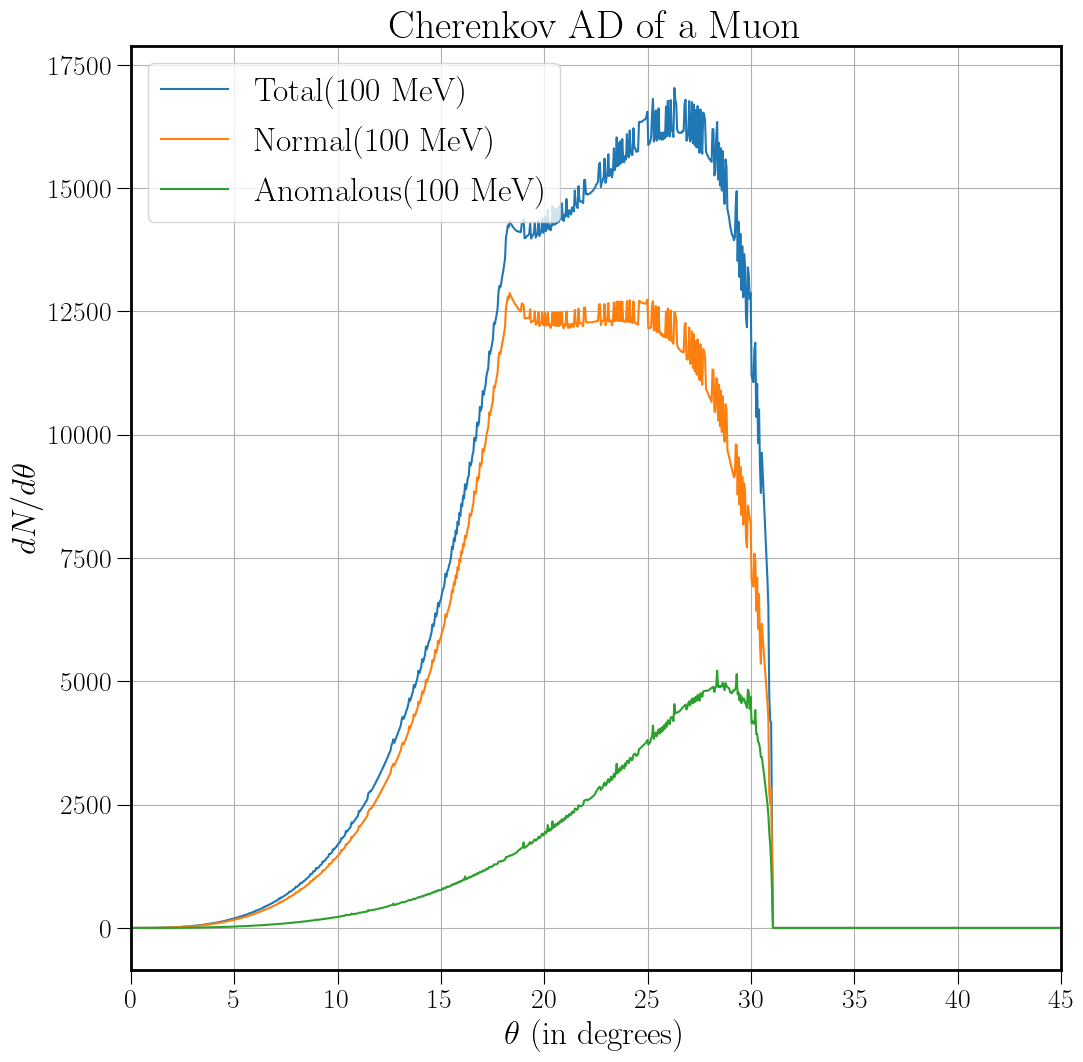

In [105]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# # 3D Surface Plot:
# x = np.arange(-5, 5, 0.25)
# y = np.arange(-5, 5, 0.25)
# X, Y = np.meshgrid(x, y)
# Z = np.sin(np.sqrt(X**2 + Y**2))
# ax.plot_surface(X, Y, Z, cmap='viridis')

# Load the .npz file
#HO fit
# mudata50ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu50_ho.npz')
mudata75ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu75_ho.npz')
mudata100ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu100_ho.npz')
mudata200ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu200_ho.npz')
mudata300ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu300_ho.npz')
mudata400ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu400_ho.npz')
mudata500ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu500_ho.npz')
mudata600ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu600_ho.npz')
mudata700ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu700_ho.npz')
mudata800ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu800_ho.npz')
mudata900ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu900_ho.npz')
mudata1000ho = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu1000_ho.npz')

#Babicz fit
mudata50b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu50_babicz.npz')
mudata75b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu75_babicz.npz')
mudata100b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu100_babicz.npz')
mudata200b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu200_babicz.npz')
mudata300b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu300_babicz.npz')
mudata400b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu400_babicz.npz')
mudata500b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu500_babicz.npz')
mudata600b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu600_babicz.npz')
mudata700b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu700_babicz.npz')
mudata800b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu800_babicz.npz')
mudata900b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu900_babicz.npz')
mudata1000b = np.load('Cherenkov_data_for_PID\\Cherenkovdata_mu1000_babicz.npz')

# List the names of the arrays in the file
print(mudata500ho.files)
print(mudata500b.files)
print(mudata600b.files)
print(mudata700b.files)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

# matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
# plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# Set labels and title:
ax.set_xlabel(r'$\theta$ (in degrees)')
ax.set_ylabel(r'$dN/d\theta$')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Cherenkov AD of a Muon (HO Fit)')
ax.tick_params(axis='both',which='major',labelsize=20,length=10)

# Access a specific array: 50 MeV
# costheta50 = mudata50ho['costheta']
# theta50 = mudata50ho['theta']
# total50 = mudata50ho['totalho']
# normal50 = mudata50ho['normalho']
# anom50 = mudata50ho['anomalousho']
# total50t = total50*np.sin(theta50)
# normal50t = normal50*np.sin(theta50)
# anom50t = anom50*np.sin(theta50)
# # scint50 = mudata50ho['scint50']
theta50 = mudata50b['theta']
total50b = mudata50b['totalb']
total50bt = total50b*np.sin(theta50)

# scint500 = data500['scint500']


# Access a specific array: 75 MeV
costheta75 = mudata75ho['costheta']
theta75= mudata75ho['theta']
total75 = mudata75ho['totalho']
normal75 = mudata75ho['normalho']
anom75 = mudata75ho['anomalousho']
total75t = total75*np.sin(theta75)
normal75t = normal75*np.sin(theta75)
anom75t = anom75*np.sin(theta75)
# scint75 = mudata75ho['scint75']
total75b = mudata75b['totalb']
total75bt = total75b*np.sin(theta75)

# scint500 = data500['scint500']
# ax.plot(theta75*(180/np.pi), total75t, label='Total(75 MeV)')


# Access a specific array: 100 MeV
costheta100 = mudata100ho['costheta']
theta100 = mudata100ho['theta']
total100 = mudata100ho['totalho']
normal100 = mudata100ho['normalho']
anom100 = mudata100ho['anomalousho']
total100t = total100*np.sin(theta100)
normal100t = normal100*np.sin(theta100)
anom100t = anom100*np.sin(theta100)
# scint100 = mudata100ho['scint100']
total100b = mudata100b['totalb']
total100bt = total100b*np.sin(theta100)
ax.plot(theta100*(180/np.pi), total100t, label='Total(100 MeV)')
ax.plot(theta100*(180/np.pi), normal100t, label='Normal(100 MeV)')
ax.plot(theta100*(180/np.pi), anom100t, label='Anomalous(100 MeV)')


# Access a specific array: 200 MeV
costheta200 = mudata200ho['costheta']
theta200 = mudata200ho['theta']
total200 = mudata200ho['totalho']
normal200 = mudata200ho['normalho']
anom200 = mudata200ho['anomalousho']
total200t = total200*np.sin(theta200)
normal200t = normal200*np.sin(theta200)
anom200t = anom200*np.sin(theta200)
# scint100 = mudata100ho['scint100']
total200b = mudata200b['totalb']
total200bt = total200b*np.sin(theta200)


# Access a specific array: 300 MeV
costheta300 = mudata300ho['costheta']
theta300 = mudata300ho['theta']
total300 = mudata300ho['totalho']
normal300 = mudata300ho['normalho']
anom300 = mudata300ho['anomalousho']
total300t = total300*np.sin(theta300)
normal300t = normal300*np.sin(theta300)
anom300t = anom300*np.sin(theta300)
# scint100 = mudata100ho['scint100']
total300b = mudata300b['totalb']
total300bt = total300b*np.sin(theta300)


# Access a specific array: 400 MeV
costheta400 = mudata400ho['costheta']
theta400 = mudata400ho['theta']
total400 = mudata400ho['totalho']
normal400 = mudata400ho['normalho']
anom400 = mudata400ho['anomalousho']
total400t = total400*np.sin(theta400)
normal400t = normal400*np.sin(theta400)
anom400t = anom400*np.sin(theta400)
# scint100 = mudata100ho['scint100']
total400b = mudata400b['totalb']
total400bt = total400b*np.sin(theta400)


# Access a specific array: 500 MeV
costheta500 = mudata500ho['costheta']
theta500 = mudata500ho['theta']
total500 = mudata500ho['totalho']
normal500 = mudata500ho['normalho']
anom500 = mudata500ho['anomalousho']
total500t = total500*np.sin(theta500)
normal500t = normal500*np.sin(theta500)
anom500t = anom500*np.sin(theta500)
# scint500 = mudata500ho['scint500']
total500b = mudata500b['totalb']
total500bt = total500b*np.sin(theta500)

# # scint500 = data500['scint500']
# ax.plot(theta500*(180/np.pi), total500t, label='Total(500 MeV)')
# ax.plot(theta500*(180/np.pi), normal500t, label='Normal(500 MeV)')
# ax.plot(theta500*(180/np.pi), anom500t, label='Anomalous(500 MeV)')

# Access a specific array: 600 MeV
costheta600 = mudata600ho['costheta']
theta600 = mudata600ho['theta']
total600 = mudata600ho['totalho']
normal600 = mudata600ho['normalho']
anom600 = mudata600ho['anomalousho']
total600t = total600*np.sin(theta600)
normal600t = normal600*np.sin(theta600)
anom600t = anom600*np.sin(theta600)

# scint100 = mudata100ho['scint100']

total600b = mudata600b['totalb']
total600bt = total600b*np.sin(theta600)

# Access a specific array: 700 MeV
costheta700 = mudata700ho['costheta']
theta700 = mudata700ho['theta']
total700 = mudata700ho['totalho']
normal700 = mudata700ho['normalho']
anom700 = mudata700ho['anomalousho']
total700t = total700*np.sin(theta700)
normal700t = normal700*np.sin(theta700)
anom700t = anom700*np.sin(theta700)
# scint100 = mudata100ho['scint100']
total700b = mudata700b['totalb']
total700bt = total700b*np.sin(theta700)


# Access a specific array: 800 MeV
costheta800 = mudata800ho['costheta']
theta800 = mudata800ho['theta']
total800 = mudata800ho['totalho']
normal800 = mudata800ho['normalho']
anom800 = mudata800ho['anomalousho']
total800t = total800*np.sin(theta800)
normal800t = normal800*np.sin(theta800)
anom800t = anom800*np.sin(theta800)
# scint100 = mudata100ho['scint100']
total800b = mudata800b['totalb']
total800bt = total800b*np.sin(theta800)


# Access a specific array: 900 MeV
costheta900 = mudata900ho['costheta']
theta900 = mudata900ho['theta']
total900 = mudata900ho['totalho']
normal900 = mudata900ho['normalho']
anom900 = mudata900ho['anomalousho']
total900t = total900*np.sin(theta900)
normal900t = normal900*np.sin(theta900)
anom900t = anom900*np.sin(theta900)
# scint100 = mudata100ho['scint100']
total900b = mudata900b['totalb']
total900bt = total900b*np.sin(theta900)



# Access a specific array: 1000 MeV
costheta1000 = mudata1000ho['costheta']
theta1000 = mudata1000ho['theta']
total1000 = mudata1000ho['totalho']
normal1000 = mudata1000ho['normalho']
anom1000 = mudata1000ho['anomalousho']
total1000t = total1000*np.sin(theta1000)
normal1000t = normal1000*np.sin(theta1000)
anom1000t = anom1000*np.sin(theta1000)
# scint100 = mudata100ho['scint100']
total1000b = mudata1000b['totalb']
total1000bt = total1000b*np.sin(theta1000)


ax.legend()
ax.set_xlim(0,45)
ax.grid()

# plt.savefig('Cherenkov_AD_Proton_allT_from_saved_data', bbox_inches='tight')
plt.savefig('Cherenkov_AD_Muon_100MeV_from_new_saved_data_hofit', bbox_inches='tight')

# Close the file
# data.close()


[0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.         0.00014679 0.00117433 ... 0.         0.         0.        ]
(2000,) (2000,) (2000,)


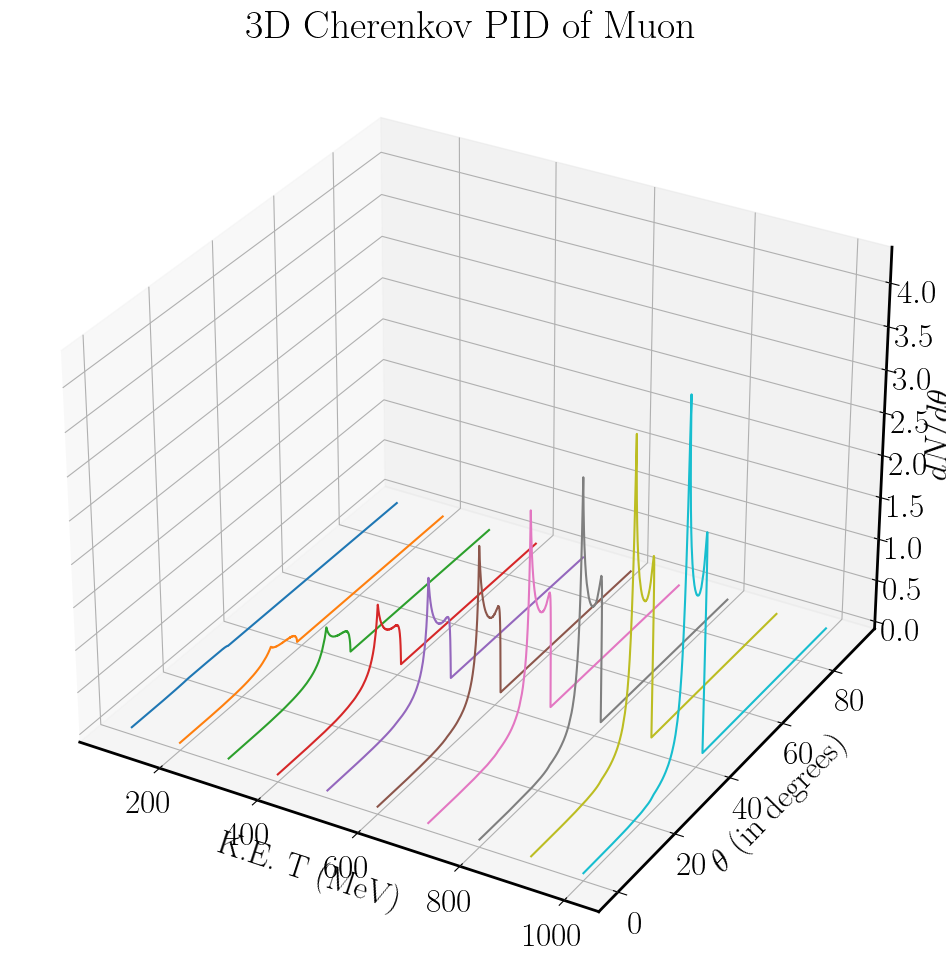

In [31]:
#Import libraries
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('3D Cherenkov PID of Muon')

X = np.linspace(100, 100, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta100*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total100t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(200, 200, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta200*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total200t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(300, 300, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta300*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total300t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'


X = np.linspace(400, 400, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta400*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total400t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'


X = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
Z = total500t  #Total AD

print(Y, Z)

print(np.shape(X), np.shape(Y), np.shape(Z))
# ax.plot_surface(X, Y, Z, cmap='viridis')
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(600, 600, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta600*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total600t  #Total AD dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(700, 700, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta700*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total700t #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(800, 800, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta800*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total800t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(900, 900, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta900*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total900t  #Total AD: dN/dtheta
ax.plot(X, Y, Z) #, cmap='viridis'

X = np.linspace(1000, 1000, 2000) #K.E., T in MeV (or mom or beta): Proton
Y = theta1000*(180/np.pi) #Cherenkov angle, theta (degree)
Z = total1000t  #Total AD: dN/dtheta 
ax.plot(X, Y, Z) #, cmap='viridis'
# print(Y, Z)
# print(np.max(Z))

# X = np.linspace(1200, 1200, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta1200*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total1200t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(1500, 1500, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta1500*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total1500t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(1800, 1800, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta1800*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total1800t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'

# X = np.linspace(2000, 2000, 2000) #K.E., T in MeV (or mom or beta): Proton
# Y = theta2000*(180/np.pi) #cosine of Cherenkov angle, cos(theta)
# Z = total2000t  #Total AD
# ax.plot(X, Y, Z) #, cmap='viridis'



# X = np.array([500, 600, 700]) #K.E., T in MeV (or mom or beta): Proton

# for t in range(len(X)): #X (MeV)

# plt.savefig("3D_Cherenkov_PID_muon_T1k2_theta.jpg", bbox_inches= 'tight')
plt.show()


[  75.   75.   75. ... 1000. 1000. 1000.] [0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.         0.00010906 0.00087245 ... 0.         0.         0.        ]
(22000,) (22000,) (22000,)
            x      y         z
0        75.0   0.00  0.000000
1        75.0   0.05  0.000109
2        75.0   0.09  0.000872
3        75.0   0.14  0.002944
4        75.0   0.18  0.006982
...       ...    ...       ...
21995  1000.0  89.82  0.000000
21996  1000.0  89.86  0.000000
21997  1000.0  89.91  0.000000
21998  1000.0  89.95  0.000000
21999  1000.0  90.00  0.000000

[22000 rows x 3 columns]


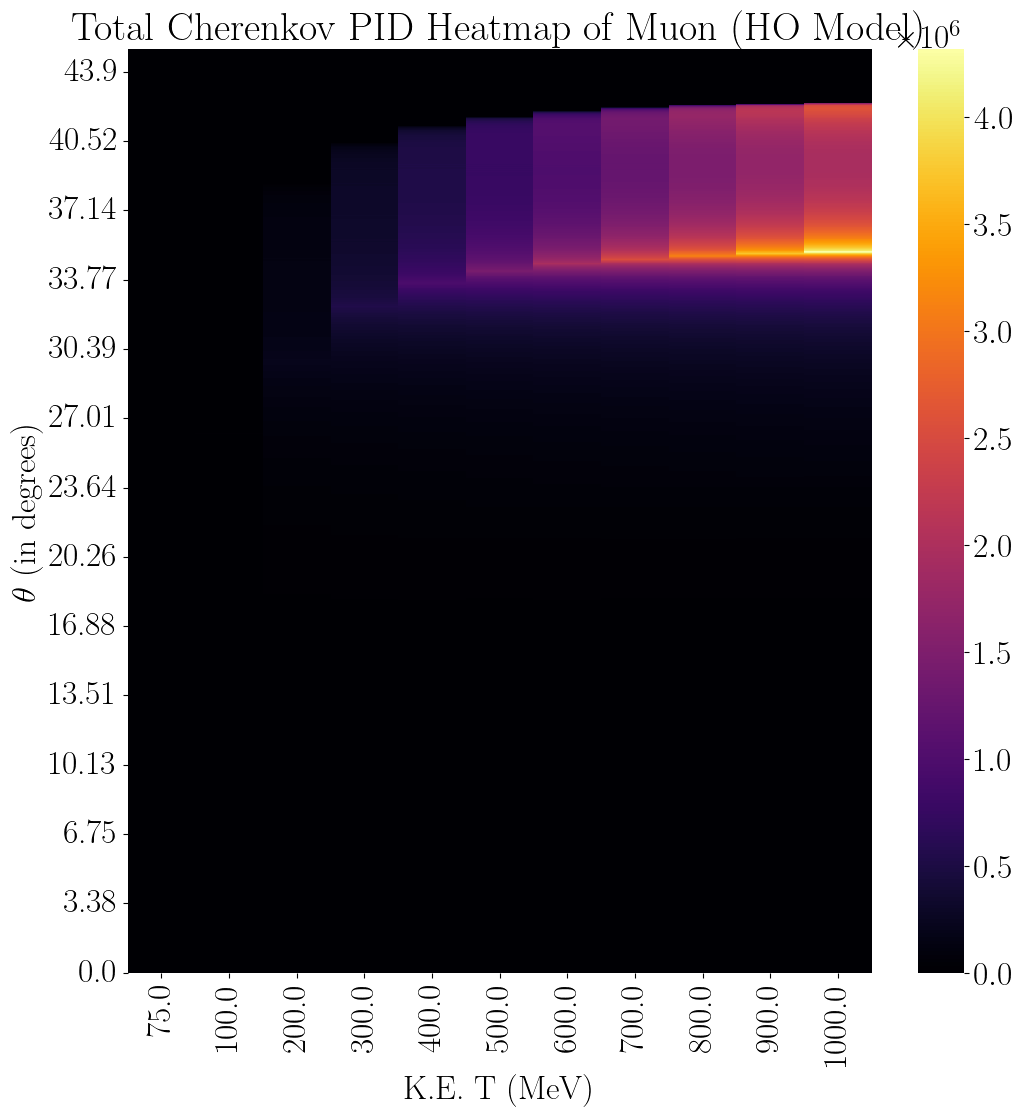

In [121]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

t_50 = np.linspace(50, 50, 2000)
t_75 = np.linspace(75, 75, 2000)
t_100 = np.linspace(100, 100, 2000)
t_200 = np.linspace(200, 200, 2000)
t_300 = np.linspace(300, 300, 2000)
t_400 = np.linspace(400, 400, 2000)
t_500 = np.linspace(500, 500, 2000)
t_600 = np.linspace(600, 600, 2000)
t_700 = np.linspace(700, 700, 2000)
t_800 = np.linspace(800, 800, 2000)
t_900 = np.linspace(900, 900, 2000)
t_1000 = np.linspace(1000, 1000, 2000)


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([t_75, t_100, t_200, t_300, t_400, t_500, t_600, t_700, t_800, t_900, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) 
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 11).flatten() #Cherenkov angle, (theta) 
z = np.array([total75t, total100t, total200t, total300t, total400t, total500t, total600t, total700t, total800t, total900t, total1000t]).flatten() #Total AD #
# z = np.array([normal75t, normal100t, normal200t, normal300t, normal400t, normal500t, normal600t, normal700t, normal800t, normal900t, normal1000t]).flatten() #Normal AD #
# z = np.array([anom75t, anom100t, anom200t, anom300t, anom400t, anom500t, anom600t, anom700t, anom800t, anom900t, anom1000t]).flatten() #Anomalous AD #
 
# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

df.y = df.y.round(2) 

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z').round(4)
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

# majorFormatter = FormatStrFormatter('%0.2f')

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10) #, fmt=".1f"
# ax.yaxis.set_major_formatter(majorFormatter)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Total Cherenkov PID Heatmap of Muon (HO Model)')
# ax.set_title('Normal Cherenkov PID Heatmap of Muon (HO Model)')
# ax.set_title('Anomalous Cherenkov PID Heatmap of Muon (HO Model)')

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

## Modify y-axis labels to rounded numbers with one decimal place

# yticks = ax.get_yticks()
# ax.set_yticklabels([round(df['y'], 2) for df['y'] in yticks])


# # Apply MaxNLocator to force integer ticks
# # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Format y-axis to show full numbers
# ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Formats to 0 decimal places

ax.set_ylim(0,1000)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_muon_heatmap_Blues.jpg", bbox_inches= 'tight')

# plt.savefig("Cherenkov_PID_muon_lowT_total_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_muon_lowT_normal_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_muon_lowT_anomalous_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

# plt.savefig("Cherenkov_PID_muon_allT_total_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_muon_allT_normal_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_muon_allT_anomalous_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

plt.show()

0.7299270072992701 1.4630040626110135 0.4342978107291306
[0.14648182 0.14648182 0.14648182 ... 1.10016211 1.10016211 1.10016211] [0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.00000000e+00 9.63417894e-05 7.70729363e-04 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
(22000,) (22000,) (22000,)
          x      y         z
0      0.15   0.00  0.000000
1      0.15   0.05  0.000096
2      0.15   0.09  0.000771
3      0.15   0.14  0.002601
4      0.15   0.18  0.006168
...     ...    ...       ...
21995  1.10  89.82  0.000000
21996  1.10  89.86  0.000000
21997  1.10  89.91  0.000000
21998  1.10  89.95  0.000000
21999  1.10  90.00  0.000000

[22000 rows x 3 columns]


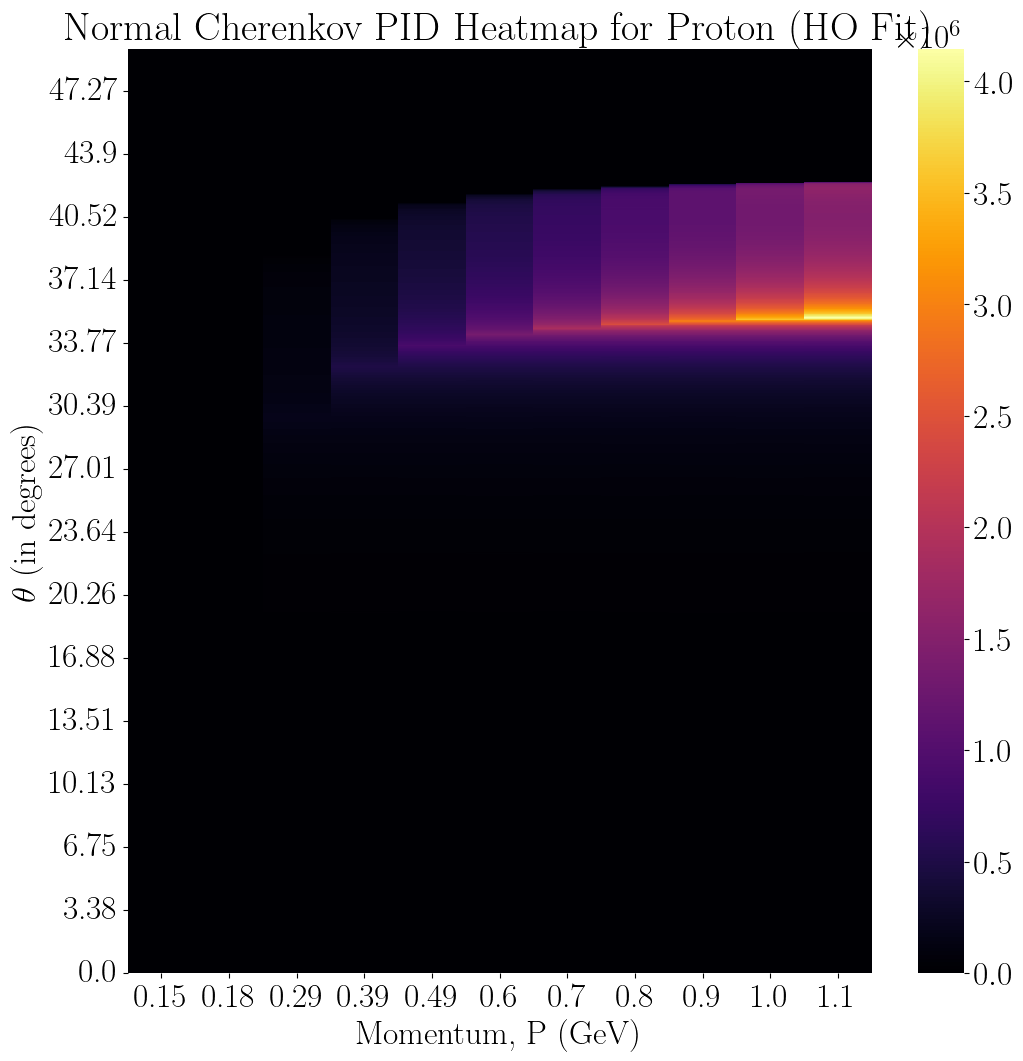

In [137]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

# t_500 = np.linspace(500, 500, 2000)
# t_600 = np.linspace(600, 600, 2000)
# t_700 = np.linspace(700, 700, 2000)
# t_800 = np.linspace(800, 800, 2000)
# t_900 = np.linspace(900, 900, 2000)
# t_1000 = np.linspace(1000, 1000, 2000)

# Cherenkov Angle vs Charged Particle Momentum/K.E/Beta (at the scintillation wavelength of 128 nm)

c= 3e8  #speed of light in m/s
rho = 1380 #density of LAr in kg/m^3 at 89 K

n = 1.37  #(Approx Fit/Exp. Data)
# n = np.array([1.385,1.37,1.345]) #Refractive index of Liquid Argon at 90 K; for wavelength= 125, 128, 130 nm respectively
                                 #https://arxiv.org/abs/2002.09346

#Electron
e = 9.11e-31 #Electron's mass in Kg.
me = e*c**2/1.602e-13 #m(e)c^2 in MeV (1 MeV = 1.602e-13 J) #Electron's mass in MeV (the hit particle)

#Muon
mu = 1.88e-28  #mass of a muon is approximately 1.883531627 x 10^-28 kg. This is about 207 times the mass of an electron.
mm = 105.66 #Muon rest mass ~ 105.7 MeV/c²

#Proton
p = 1.67e-27  #mass of proton in Kg
mp = 938  #Proton's mass in MeV

    
# t = np.linspace(0, 2000, 1000) #K.E of Proton  in MeV
# # t = np.logspace(0, 2000, 1000) #K.E of Proton  in MeV

# tgev= t/1000  #1 GeV = 1.602e-10 J
t = np.array([50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
# beta= np.linspace(betamin,1,100)  #beta= v/c  beta(max)= 0.8 for the problem. otherwise beta(max)= 1.0 
betap  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
gammap = (1-betap**2)**(-0.5)

betamu  = np.sqrt(1 - (1/(1 + t/mm)**2)) #Relativistic Approach 
gammamu = (1-betamu**2)**(-0.5)

betae  = np.sqrt(1 - (1/(1 + t/me)**2)) #Relativistic Approach 
gammae = (1-betae**2)**(-0.5)


# print(beta,gamma)

betamin = 1/n
gammamin = (1-betamin**2)**(-0.5)

tmin = (gammamin-1) * mp #in MeV
tmingev = tmin/1000 #in GeV 
print(betamin,gammamin,tmingev)

# t = np.linspace(tmin, 100000, 1000) #K.E of Proton  in MeV
# tgev= t/1000  #1 GeV = 1.602e-10 J

#beta[:,n] All rows in n-th column 

momp = (p*c*betap)*(1-betap**2)**(-0.5)  #momentum of proton in kgm/s
mompgev= momp/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

mommu = (mu*c*betamu)*(1-betamu**2)**(-0.5)  #momentum of proton in kgm/s
mommugev= mommu/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

mome = (e*c*betae)*(1-betae**2)**(-0.5)  #momentum of proton in kgm/s
momegev= mome/5.34e-19  #Momentum of proton in GeV (1 GeV = 5.34e-19 kgm/s)

mommu_50 = np.linspace(mommugev[0], mommugev[0], 2000)
mommu_75 = np.linspace(mommugev[1], mommugev[1], 2000)
mommu_100 = np.linspace(mommugev[2], mommugev[2], 2000)
mommu_200 = np.linspace(mommugev[3], mommugev[3], 2000)
mommu_300 = np.linspace(mommugev[4], mommugev[4], 2000)
mommu_400 = np.linspace(mommugev[5], mommugev[5], 2000)
mommu_500 = np.linspace(mommugev[6], mommugev[6], 2000)
mommu_600 = np.linspace(mommugev[7], mommugev[7], 2000)
mommu_700 = np.linspace(mommugev[8], mommugev[8], 2000)
mommu_800 = np.linspace(mommugev[9], mommugev[9], 2000)
mommu_900 = np.linspace(mommugev[10], mommugev[10], 2000)
mommu_1000 = np.linspace(mommugev[11], mommugev[11], 2000)

# print(mompgev[2])
# print(momp_500, momp_600)

# tgev= t/1.602e-10  #1 GeV = 1.602e-10 J
#tgev[:,0] #Kinetic Energy of proton in GeV: all rows 1st column n=0 


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
# x = np.array([t_500, t_600, t_700]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) , t_800, t_900, t_1000
x = np.array([mommu_75, mommu_100, mommu_200, mommu_300, mommu_400, mommu_500, mommu_600, mommu_700, mommu_800, mommu_900, mommu_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 11).flatten() #Cherenkov angle, (theta) 

# z = np.array([total75t, total100t, total200t, total300t, total400t, total500t, total600t, total700t, total800t, total900t, total1000t]).flatten() #Total AD #
z = np.array([normal75t, normal100t, normal200t, normal300t, normal400t, normal500t, normal600t, normal700t, normal800t, normal900t, normal1000t]).flatten() #Normal AD #
# z = np.array([anom75t, anom100t, anom200t, anom300t, anom400t, anom500t, anom600t, anom700t, anom800t, anom900t, anom1000t]).flatten() #Anomalous AD #

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

df.x = df.x.round(2) 
df.y = df.y.round(2) 

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z').round(4)
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

# majorFormatter = FormatStrFormatter('%0.2f')

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10) #, fmt=".1f"
# ax.yaxis.set_major_formatter(majorFormatter)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('Momentum, P (GeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
# ax.set_title('Total Cherenkov PID Heatmap of Muon (HO Fit)')
ax.set_title('Normal Cherenkov PID Heatmap for Proton (HO Fit)')
# ax.set_title('Anomalous Cherenkov PID Heatmap for Proton (HO Fit)')

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

## Modify y-axis labels to rounded numbers with one decimal place

# yticks = ax.get_yticks()
# ax.set_yticklabels([round(df['y'], 2) for df['y'] in yticks])


# # Apply MaxNLocator to force integer ticks
# # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Format y-axis to show full numbers
# ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Formats to 0 decimal places

ax.set_ylim(0,1100)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_muon_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_muon_allmoms_total_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_muon_allmoms_normal_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
# plt.savefig("Cherenkov_PID_muon_allmoms_anomalous_ho_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 

plt.show()

[  50.   50.   50. ... 1000. 1000. 1000.] [0.00000000e+00 4.50225113e-02 9.00450225e-02 ... 8.99099550e+01
 8.99549775e+01 9.00000000e+01] [0.00000000e+00 7.42402728e-06 5.93916230e-05 ... 2.95446845e+02
 1.47723155e+02 5.89091203e-03]
(24000,) (24000,) (24000,)
            x      y           z
0        50.0   0.00    0.000000
1        50.0   0.05    0.000007
2        50.0   0.09    0.000059
3        50.0   0.14    0.000200
4        50.0   0.18    0.000475
...       ...    ...         ...
23995  1000.0  89.82  590.897980
23996  1000.0  89.86  443.171608
23997  1000.0  89.91  295.446845
23998  1000.0  89.95  147.723155
23999  1000.0  90.00    0.005891

[24000 rows x 3 columns]


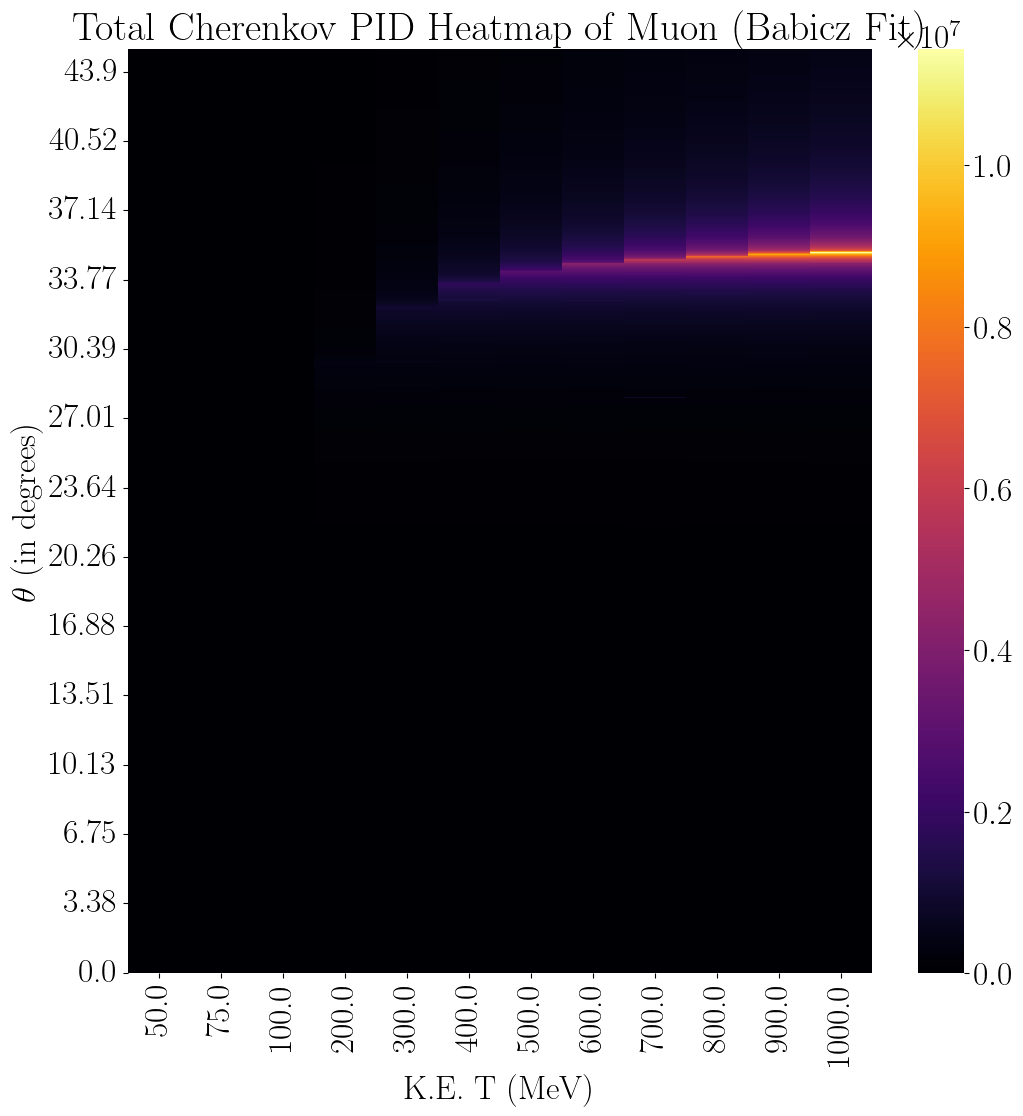

In [149]:
#Import libraries
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import ScalarFormatter



# Create a figure and an axes object for 3D plotting:
fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)


# Generate sample 2D data (e.g., a 2D Gaussian)
# x, y = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
# z = np.exp(-(x**2 + y**2) / 25)

t_50 = np.linspace(50, 50, 2000)
t_75 = np.linspace(75, 75, 2000)
t_100 = np.linspace(100, 100, 2000)
t_200 = np.linspace(200, 200, 2000)
t_300 = np.linspace(300, 300, 2000)
t_400 = np.linspace(400, 400, 2000)
t_500 = np.linspace(500, 500, 2000)
t_600 = np.linspace(600, 600, 2000)
t_700 = np.linspace(700, 700, 2000)
t_800 = np.linspace(800, 800, 2000)
t_900 = np.linspace(900, 900, 2000)
t_1000 = np.linspace(1000, 1000, 2000)


# x_coords = np.array([500, 600, 700, 800, 900, 1000]) ##K.E., T in MeV (or mom or beta): Proton
x = np.array([t_50, t_75, t_100, t_200, t_300, t_400, t_500, t_600, t_700, t_800, t_900, t_1000]).flatten() ##K.E., T in MeV (or mom or beta): Proton (.flatten() flattens an array to 1D) 
# y = np.repeat(theta500*(180/np.pi), 6) #Cherenkov angle, (theta)
y = np.linspace(theta500*(180/np.pi), theta500*(180/np.pi), 12).flatten() #Cherenkov angle, (theta)  
z = np.array([total50bt, total75bt, total100bt, total200bt, total300bt, total400bt, total500bt, total600bt, total700bt, total800bt, total900bt, total1000bt]).flatten() #Total AD #, total800bt, total900bt, total1000bt
 
# # x = np.linspace(500, 500, 2000) #K.E., T in MeV (or mom or beta): Proton
# x = np.array([500, 600, 700, 800, 900, 1000]) #K.E., T in MeV (or mom or beta): Proton
# y = theta500*(180/np.pi) #Cherenkov angle, (theta)
# z = np.array([total500t, total600t, total700t, total800t, total900t, total1000t])   #Total AD

print(x,y,z)
print(np.shape(x), np.shape(y), np.shape(z))


# y = list(reversed(yr))
# print(y, yr)
# y = np.array([theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi), theta800*(180/np.pi), theta900*(180/np.pi), theta1000*(180/np.pi)]) #cosine of Cherenkov angle, cos(theta)
# print(theta500*(180/np.pi), theta600*(180/np.pi), theta700*(180/np.pi))


# Sample data (replace with your actual data)
# data = {'x': [1, 1, 2, 2, 3, 3], 'y': [1, 2, 1, 2, 1, 2], 'z': [10, 15, 12, 18, 8, 14]}
# data = {'x': [500, 600, 700, 800, 900, 1000], 'y': [theta500*(180/np.pi)], 'z': [total500t, total600t, total700t, total800t, total900t, total1000t]}

data = {'x': x , 'y': y, 'z': z}
# data = {'K.E. T (MeV)': x , '$\\theta$ (in degrees)': y, '$dN/d\\theta$': z}
df = pd.DataFrame(data)

df.y = df.y.round(2) 

print(df)

# Ensure 'x' and 'y' are treated as categories
df['x'] = df['x'].astype('category')
df['y'] = df['y'].astype('category')

# df['K.E. T (MeV)'] = df['K.E. T (MeV)'].astype('category')
# df['$\\theta$ (in degrees)'] = df['$\\theta$ (in degrees)'].astype('category')


# Create a pivot table for the matrix plot
pivot_df = df.pivot_table(index='y', columns='x', values='z').round(4)
# pivot_df = df.pivot_table(index='$\\theta$ (in degrees)', columns='K.E. T (MeV)', values='$dN/d\\theta$')

# Use heatmap with clear separation
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 
# ax = sns.heatmap(df['z'], annot=True, linewidths=.5, linecolor='black') 

# print(np.linspace(0,90,10))

# majorFormatter = FormatStrFormatter('%0.2f')

ax = sns.heatmap(pivot_df, annot=False, linewidths=0, linecolor='black', cmap='inferno', alpha=1) #, yticklabels=np.linspace(0,90,10) #, fmt=".1f"
# ax.yaxis.set_major_formatter(majorFormatter)
# ax.yaxis.set_major_locator(MultipleLocator(10))
ax.invert_yaxis()

# Set labels and title:
ax.set_xlabel('K.E. T (MeV)')
ax.set_ylabel(r'$\theta$ (in degrees)')
# ax.set_zlabel(r'$dN/d\theta$') #\frac{dN}{d\cos\theta}
ax.set_title('Total Cherenkov PID Heatmap of Muon (Babicz Fit)')

# ax.tick_params(axis='both',which='major',labelsize=20,length=10)

## Modify y-axis labels to rounded numbers with one decimal place

# yticks = ax.get_yticks()
# ax.set_yticklabels([round(df['y'], 2) for df['y'] in yticks])


# # Apply MaxNLocator to force integer ticks
# # ax.xaxis.set_major_locator(MaxNLocator(integer=True))
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))

# Format y-axis to show full numbers
# ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Formats to 0 decimal places

ax.set_ylim(0, 1000)
# ax = sns.histplot(x=x, y=y, cmap='viridis', kde=True, alpha=0.8)  # Use kde=True for smoother contours

# plt.savefig("Cherenkov_PID_muon_heatmap_Blues.jpg", bbox_inches= 'tight')
# plt.savefig("Cherenkov_PID_muon_lowT_total_babicz_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
plt.savefig("Cherenkov_PID_muon_allT_total_babicz_heatmap_inferno.jpg", bbox_inches= 'tight') #viridis, 
plt.show()

# Proton's Wavelength Solutions & AD 

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


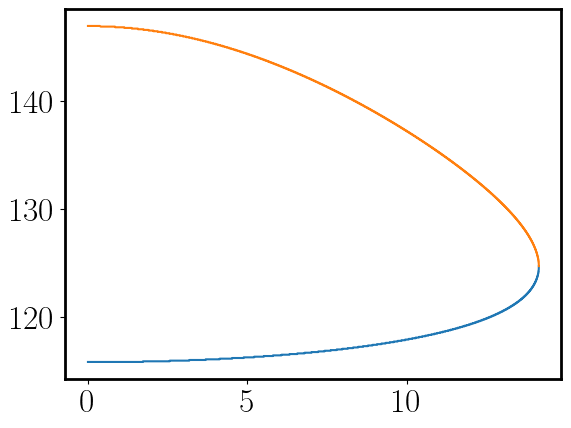

In [33]:
# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 500
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 10000)
x_all = np.linspace(0, 1, 10000)
x = np.cos(theta)

lamd = np.linspace(90,700,10000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


cerenkovangnsum = []
cerenkovangasum = []
cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance

#     funclamd = n_jacksonr - y

#     idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    
n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278


cos_ang_min = 1/(i * n_peakr)
cos_ang_max = min(1/(i * n_asymtoter), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_max= {}".format(i, cos_ang_min, cos_ang_max))
x_all = np.linspace(cos_ang_min, cos_ang_maxa, 10000)

    
        
            # print(lamd[idx])

for x in x_all: 
    
    if x >= cos_ang_min and x <= cos_ang_maxa:
        
        y= 1/(i*x)
        y = np.linspace(y,y,10000)   #wavelength of light 
        # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
        funclamd = n_jacksonr - y
        idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

    
        if 1/(i*x) >= n_peakr:
            lmin = lamd_peakr
            lmax = lamd_peakr
            
        if n_500 < 1/(i*x) < n_peakr:   
            lmin = lamd[min(idx)]
            lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
        if n_uvr < 1/(i*x) <= n_500:
            lmin = max(lamd[min(idx)], 106.67)
            lmax = 500            
    

        
        lamdminr.append(lmin)
        lamdmaxr.append(lmax)
    
    
plt.plot(np.arccos(x_all)*180/np.pi, lamdminr)
plt.plot(np.arccos(x_all)*180/np.pi, lamdmaxr)


C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\1421700746.py:16: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\1421700746.py:17: RuntimeWarning: invalid value encountered in sqrt
  lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\1421700746.py:20: RuntimeWarning: invalid value encountered in sqrt
  lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_m

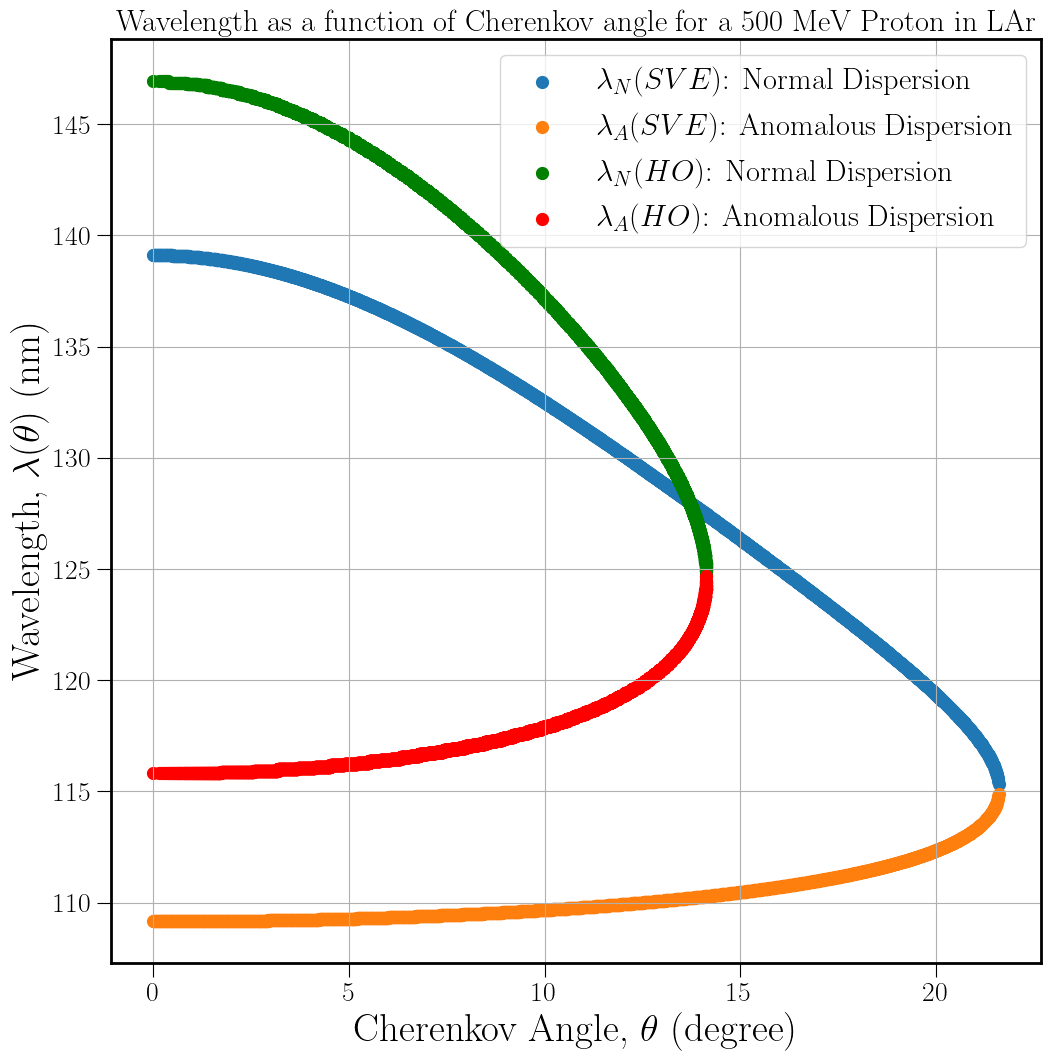

In [34]:
#Angular
#Wavelength Solutions (PVS)

#lambda(theta) when theta changes

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])
# lamd = np.linspace(0,700,700)
# n_pvs = a_0 + (a_pvs * ((lamd_uv**(-1) - lamd**(-1))/((lamd_uv**(-1) - lamd**(-1))**2 + gamma**2)))

thetadeg = theta * 180/np.pi
# theta = np.linspace(0, np.pi/2, 2000)

b = 0.7579653181328908 #beta

#Wavelength as a function of the angle: lambda(theta)
lamd_thetap = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) + np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))
lamd_thetan = 2*(b*a_0*np.cos(theta) - 1)/(((2*lamd_uv**(-1)) * (b*a_0*np.cos(theta) - 1)) + (b*a_pvs*np.cos(theta)) - np.sqrt(b**2*a_pvs**2*np.cos(theta)**2 - (4*gamma**2*(b*a_0*np.cos(theta) - 1)**2)))

#term involving wavelengths: (lamd_uv^-1 - lamd_theta^-1)
lamd_pterm = (((-b*a_pvs*np.cos(theta)) + ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p
lamd_nterm = (((-b*a_pvs*np.cos(theta)) - ((b**2*a_pvs**2*np.cos(theta)**2) - (4 * ((b*a_0*np.cos(theta)) - 1) * ((b*a_0*gamma**2*np.cos(theta)) - gamma**2)))**(1/2))/(2*((b*a_0*np.cos(theta)) - 1))) #lamd_uv_inv_min_lamd_theta_inv_p

func_angp = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_pterm**2)**2/(gamma**2 - lamd_pterm**2))) + ((2*a_0*a_pvs*b) * lamd_pterm * np.abs((gamma**2 + lamd_pterm**2)/(gamma**2 - lamd_pterm**2))) + ((b*a_pvs**2*lamd_pterm**2)/np.abs(gamma**2 - lamd_pterm**2))))
func_angn = ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + lamd_nterm**2)**2/(gamma**2 - lamd_nterm**2))) + ((2*a_0*a_pvs*b) * lamd_nterm * np.abs((gamma**2 + lamd_nterm**2)/(gamma**2 - lamd_nterm**2))) + ((b*a_pvs**2*lamd_nterm**2)/np.abs(gamma**2 - lamd_nterm**2))))

func_angt = func_angp + func_angn

# print(b, lamd_thetap, lamd_thetan, lamd_pterm, lamd_nterm, func_angp, func_angn, sep='\n')

# print(theta, lamd_thetap) #, lamd_thetan, lamd_pterm, func_angp, func_angn
# print("{}, lamd_thetap= {:.5f}, lamd_thetan = {:.5f}, lamd_pterm  = {}, func_ang= {}".format(b, lamd_thetap, lamd_thetan, lamd_pterm, func_ang))
# lamd_pterm, lamd_nterm
#(0.00021947, 0.00061913), (0.00219235, 0.00077715)

#Plot of lambda vs theta in the LAr medium near Resonance  
# theta = np.linspace(0, np.pi/2, 2000)

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)

ax.set_title("Wavelength as a function of Cherenkov angle for a 500 MeV Proton in LAr", fontsize= 22) #($\\beta$ = 0.758) 

#Apprx PVS fit WL solution
ax.scatter(thetadeg, lamd_thetap, linewidth = 3.5, label= "$\\lambda_{N}(SVE)$: Normal Dispersion")
ax.scatter(thetadeg, lamd_thetan, linewidth = 3.5, label= "$\\lambda_{A}(SVE)$: Anomalous Dispersion")

#Exact HO fit WL solution
ax.scatter(np.arccos(x_all)*180/np.pi, lamdmaxr, c= 'g', linewidth = 3.5, label= "$\\lambda_{N}(HO)$: Normal Dispersion")
ax.scatter(np.arccos(x_all)*180/np.pi, lamdminr, c= 'r', linewidth = 3.5, label= "$\\lambda_{A}(HO)$: Anomalous Dispersion")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov Angle, $\\theta$ (degree)",fontsize=28)
ax.set_ylabel("Wavelength, $\\lambda (\\theta)$ (nm)",fontsize=28)
ax.grid()
ax.legend(fontsize=22)

# plt.ylim([0,300])
# plt.xlim([0,30])

# plt.savefig("wavelength_solutions_ourhofit_500MeV.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# plt.savefig("wavelength_solutions_HOvsPVS.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\1726635966.py:36: RuntimeWarning: invalid value encountered in sqrt
  n_grace = np.sqrt(a_0g + (a_uvg*lamd**2/(lamd**2-lamd_uv**2))) #+ (a_irg*lamd**2/(lamd**2-lamd_ir**2)))) #(ignoring the 3rd term)
C:\Users\Hasan's PC\AppData\Local\Temp\ipykernel_133372\1726635966.py:63: RuntimeWarning: invalid value encountered in sqrt
  n_babics = np.sqrt(1+(3*x/(3-x)))


[135.89296263 135.89295812 135.89294458 ... 108.65731093 108.65731062
 108.65731052]


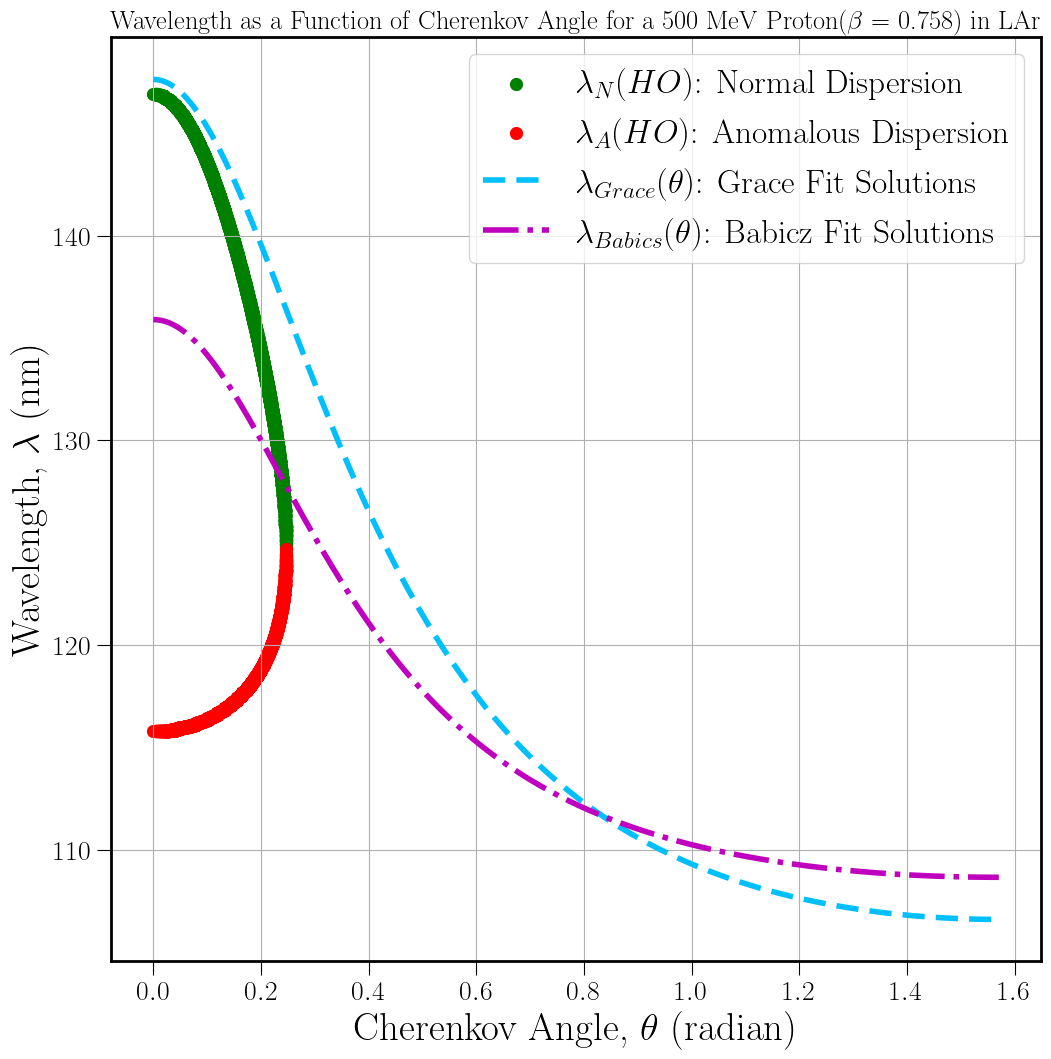

In [35]:
#Angular Distribution for Babics(2020) Fit: 500 MeV
#lambda(theta) for different betas

alpha = 1/137 #Fine-structure (EM coupling) constant 

mp = 938  #Proton's mass in MeV
# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000

# t = np.array([400, 500, 600, 650, 700]) #K>E in MeV 

beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
lamd_peak = 124.68 #where n is max 

# theta = np.linspace(0, np.pi/2, 10000)
# x = np.cos(theta)
# x_all = np.linspace(0, 1, 10000)
# lamd = np.linspace(90,700,10000)

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

b = 0.7579653181328908 #beta-> T = 500,700,800 MeV



#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

# n_grace = complex(n1,n2)
n_grace = np.sqrt(a_0g + (a_uvg*lamd**2/(lamd**2-lamd_uv**2))) #+ (a_irg*lamd**2/(lamd**2-lamd_ir**2)))) #(ignoring the 3rd term)

# b1 = 0.7579653181328908 #beta
# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])

# lamd_thetalist = []
# func_angtlist = []
# func_ang = 2* np.pi * 1e6 * (alpha/a_uvg) * ((b * a_0g * (lamd_theta**2 - lamd_uv**2)/(lamd_theta**3 * lamd_uv**2)) + (b * a_uvg /(lamd_theta * lamd_uv**2)) -  ((lamd_theta**2 - lamd_uv**2)/(b * lamd_theta**3 * lamd_uv**2)))                                      

# for b in beta: 
# b = 0.7579653181328908 #beta-> T = 500,700,800 MeV

lamd_thetag = np.sqrt((a_0g*b**2*np.cos(theta)**2 - 1)/((a_0g + a_uvg)*b**2*np.cos(theta)**2 - 1)) * lamd_uv



#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008

# b = np.array([0.7579653181328908, 0.7578303147381336, 0.7576951498969984, 0.7575598232721383, 0.7574243345251596, 0.7572886833166151, 0.7571528693060026, 0.7570168921517577, 0.7568807515112517, 0.7567444470407855, 0.7566079783955859, 0.7564713452298011, 0.7563345471964956, 0.7561975839476465, 0.756060455134138, 0.7559231604057575, 0.755785699411191, 0.7556480717980177, 0.7555102772127064, 0.7553723153006094, 0.7552341857059597, 0.7550958880718638, 0.7549574220402998, 0.7548187872521097, 0.754679983346997, 0.7545410099635202, 0.7544018667390884, 0.7542625533099574, 0.7541230693112227, 0.7539834143768168, 0.7538435881395024, 0.7537035902308686, 0.7535634202813252, 0.7534230779200978, 0.7532825627752229, 0.7531418744735427, 0.7530010126406996, 0.7528599769011316, 0.7527187668780668, 0.7525773821935179, 0.7524358224682773, 0.752294087321912, 0.7521521763727579, 0.7520100892379145, 0.7518678255332395, 0.7517253848733438, 0.7515827668715855, 0.7514399711400648, 0.7512969972896183, 0.7511538449298137, 0.7510105136689442, 0.7508670031140227, 0.7507233128707762, 0.7505794425436405, 0.7504353917357542, 0.7502911600489532, 0.7501467470837648, 0.7500021524394018, 0.7498573757137571, 0.7497124165033976, 0.7495672744035583, 0.7494219490081363, 0.7492764399096855, 0.7491307466994097, 0.7489848689671572, 0.7488388063014149, 0.7486925582893011, 0.7485461245165616, 0.7483995045675609, 0.7482526980252782, 0.7481057044712999, 0.7479585234858139, 0.7478111546476035, 0.7476635975340403, 0.7475158517210785, 0.7473679167832487, 0.7472197922936509, 0.747071477823948, 0.7469229729443603, 0.7467742772236576, 0.7466253902291535, 0.7464763115266991, 0.746327040680675, 0.746177577253986, 0.7460279208080539, 0.7458780709028101, 0.7457280270966904, 0.7455777889466261, 0.745427356008039, 0.7452767278348331, 0.7451259039793887, 0.7449748839925544, 0.7448236674236414, 0.7446722538204145, 0.7445206427290869, 0.7443688336943122, 0.7442168262591768, 0.7440646199651937, 0.7439122143522939, 0.7437596089588205, 0.7436068033215202, 0.7434537969755363, 0.7433005894544015, 0.7431471802900299, 0.7429935690127099, 0.7428397551510962, 0.742685738232203, 0.7425315177813947, 0.7423770933223802, 0.7422224643772034, 0.7420676304662366, 0.7419125911081719, 0.7417573458200136, 0.7416018941170703, 0.7414462355129469, 0.741290369519536, 0.7411342956470106, 0.7409780134038155, 0.7408215222966595, 0.7406648218305065, 0.7405079115085679, 0.7403507908322936, 0.7401934593013643, 0.7400359164136826, 0.7398781616653645, 0.7397201945507313, 0.7395620145623004, 0.7394036211907772, 0.7392450139250457, 0.739086192252161, 0.7389271556573387, 0.7387679036239481, 0.7386084356335013, 0.7384487511656458, 0.7382888496981546, 0.7381287307069174, 0.7379683936659314, 0.7378078380472923, 0.7376470633211851, 0.7374860689558739, 0.7373248544176941, 0.7371634191710419, 0.7370017626783648, 0.7368398844001527, 0.7366777837949278, 0.7365154603192353, 0.7363529134276335, 0.7361901425726838, 0.7360271472049414, 0.7358639267729453, 0.7357004807232075, 0.7355368085002046, 0.7353729095463664, 0.735208783302066, 0.7350444292056099, 0.7348798466932281, 0.7347150351990626, 0.7345499941551582, 0.7343847229914511, 0.7342192211357594, 0.7340534880137715, 0.733887523049036, 0.733721325662951, 0.733554895274753, 0.7333882313015065, 0.7332213331580926, 0.7330542002571979, 0.7328868320093043, 0.7327192278226771, 0.7325513871033538, 0.7323833092551332, 0.7322149936795638, 0.7320464397759324, 0.731877646941253, 0.7317086145702544, 0.7315393420553692, 0.7313698287867219, 0.7312000741521175, 0.7310300775370286, 0.7308598383245848, 0.7306893558955593, 0.730518629628358, 0.7303476588990065, 0.7301764430811387, 0.7300049815459829, 0.7298332736623516, 0.7296613187966269, 0.7294891163127489, 0.7293166655722036, 0.7291439659340091, 0.7289710167547028, 0.7287978173883296, 0.7286243671864276, 0.7284506654980161, 0.7282767116695813, 0.7281025050450644, 0.7279280449658467, 0.7277533307707378, 0.7275783617959609, 0.7274031373751395, 0.7272276568392838, 0.7270519195167771, 0.7268759247333614, 0.7266996718121241, 0.7265231600734832, 0.7263463888351737, 0.7261693574122327, 0.7259920651169861, 0.7258145112590336, 0.7256366951452334, 0.7254586160796886, 0.7252802733637325, 0.7251016662959128, 0.7249227941719775, 0.7247436562848593, 0.7245642519246612, 0.7243845803786407, 0.7242046409311942, 0.7240244328638422, 0.7238439554552132, 0.7236632079810287, 0.7234821897140864, 0.7233008999242454, 0.7231193378784094, 0.7229375028405113, 0.7227553940714962, 0.7225730108293057, 0.7223903523688612, 0.7222074179420476, 0.7220242067976961, 0.7218407181815679, 0.7216569513363374, 0.7214729055015751, 0.7212885799137294, 0.7211039738061117, 0.7209190864088761, 0.7207339169490049, 0.7205484646502887, 0.7203627287333094, 0.7201767084154229, 0.7199904029107405, 0.7198038114301107, 0.7196169331811015, 0.7194297673679816, 0.7192423131917022, 0.719054569849878, 0.7188665365367687, 0.7186782124432602, 0.7184895967568454, 0.7183006886616051, 0.7181114873381885, 0.7179219919637942, 0.7177322017121504, 0.7175421157534946, 0.7173517332545551, 0.71716105337853, 0.7169700752850667, 0.7167787981302428, 0.7165872210665449, 0.7163953432428483, 0.7162031638043957, 0.7160106818927772, 0.7158178966459086, 0.7156248071980108, 0.7154314126795877, 0.7152377122174052, 0.71504370493447, 0.7148493899500065, 0.7146547663794359, 0.7144598333343541, 0.7142645899225089, 0.7140690352477775, 0.7138731684101445, 0.7136769885056784, 0.7134804946265093, 0.7132836858608052, 0.7130865612927492, 0.7128891200025153, 0.712691361066246, 0.7124932835560273, 0.7122948865398653, 0.7120961690816618, 0.71189713024119, 0.7116977690740699, 0.711498084631744, 0.7112980759614517, 0.7110977421062048, 0.7108970821047621, 0.7106960949916032, 0.7104947797969045, 0.7102931355465107, 0.7100911612619124, 0.7098888559602161, 0.7096862186541201, 0.709483248351887, 0.7092799440573174, 0.7090763047697219, 0.7088723294838948, 0.7086680171900861, 0.7084633668739737, 0.7082583775166362, 0.7080530480945236, 0.7078473775794306, 0.7076413649384661, 0.7074350091340263, 0.7072283091237643, 0.7070212638605616, 0.7068138722924986, 0.7066061333628245, 0.7063980460099281, 0.7061896091673068, 0.7059808217635369, 0.7057716827222428, 0.7055621909620661, 0.7053523453966342, 0.7051421449345298, 0.7049315884792579, 0.7047206749292158])

x = (a_0b + (a_uvb*lamd**2/(lamd**2-lamd_uv**2)) + (a_irb*lamd**2/(lamd**2-lamd_ir**2))) #(ignoring the 3rd term)
# x = a_0b + a_uvb + a_irb
n_babics = np.sqrt(1+(3*x/(3-x)))


# for b in beta: 
# b = 0.7579653181328908 #beta

lamd_thetab = np.sqrt(((a_0b - 3) + (b**2 * np.cos(theta)**2 * (3 + 2*a_0b))) / ((b**2 * np.cos(theta)**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv
print(lamd_thetab)   
# func_ang = 2*np.pi*1e6*(alpha/a_uvg)*((b*a_0g*(lamd_theta**2-lamd_uv**2)/(lamd_theta**3*lamd_uv**2)) + (b*a_uvg/(lamd_theta*lamd_uv**2)) -  ((lamd_theta**2-lamd_uv**2)/(b*lamd_theta**3*lamd_uv**2)))                                      

#Plot of lambda vs theta in the LAr medium near Resonance  

fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(111)

# #TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title("Wavelength as a Function of Cherenkov Angle for a 500 MeV Proton($\\beta$ = 0.758) in LAr", fontsize= 19)

#Apprx PVS fit WL solution
# ax.scatter(theta, lamd_thetap, linewidth = 3.5, label= "$\\lambda_{N}(SVE)$: Normal Dispersion")
# ax.scatter(theta, lamd_thetan, linewidth = 3.5, label= "$\\lambda_{A}(SVE)$: Anomalous Dispersion")

#Exact HO fit WL solution
ax.scatter(np.arccos(x_all), lamdmaxr, c= 'g', linewidth = 3.5, label= "$\\lambda_{N}(HO)$: Normal Dispersion")
ax.scatter(np.arccos(x_all), lamdminr, c= 'r', linewidth = 3.5, label= "$\\lambda_{A}(HO)$: Anomalous Dispersion")

ax.plot(theta, lamd_thetag, linewidth = 4, dashes=[4,2], color='deepskyblue', label= "$\\lambda_{Grace}(\\theta)$: Grace Fit Solutions")
ax.plot(theta, lamd_thetab, linewidth = 4, ls='dashdot', color='m', label= "$\\lambda_{Babics}(\\theta)$: Babicz Fit Solutions")

# ax.scatter(theta, lamd_theta, color='g', label= "$\\lambda_{Grace}(\\theta)$: Grace Fit Solutions")

# ax.plot(lamd, y, linewidth = 3.5,label="$1/ \\beta$")

ax.tick_params(axis='both',which='major',labelsize=20,length=10)

ax.set_xlabel("Cherenkov Angle, $\\theta$ (radian)",fontsize=28)
ax.set_ylabel("Wavelength, $\lambda$ (nm)",fontsize=28)
ax.grid()
ax.legend(fontsize=24, loc= 'best')

# plt.ylim([0,300])
# plt.xlim([0,30])

# plt.savefig("wavelength_solutions_BabicsnGrace.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 
# plt.savefig("wavelength_solutions_BabicznGracevsOurs.jpg", bbox_inches="tight") #Ctrl+/ to comment in or out 

# AD

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.2278
beta= 0.7579653181328908, cos_ang_min= 0.969732876547658, cos_ang_maxN= 1, cos_ang_maxA= 1


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1202338997.py:127: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1202338997.py:166: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


[0.00000000e+00 2.00040008e-04 4.00080016e-04 ... 9.99599920e-01
 9.99799960e-01 1.00000000e+00] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

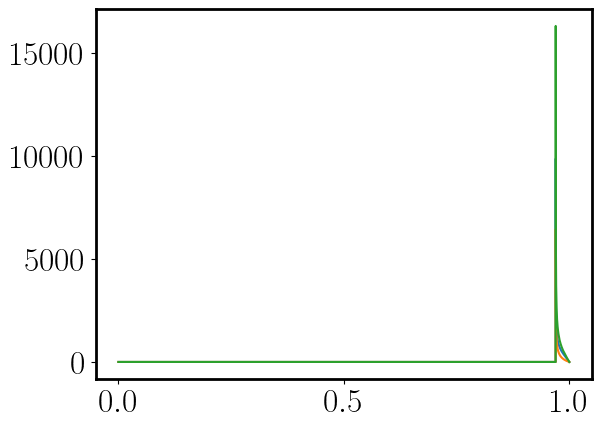

In [651]:
#Instantaneous AD with HO fit: 500 MeV 

# AD Instantaneous HO/ Jackson fit 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([500])
t = 500
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
i  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV
#T = 90 K

# PVS {a0 -> 1.18416, aPVS -> 0.000325985, \[CapitalGamma] -> 0.000693652}
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.419


lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 


#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 5000)
x_all = np.linspace(0, 1, 5000)
x = np.cos(theta)

lamd = np.linspace(90,700,5000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_500, n_asymtoter))


# cerenkovangnsum = []
# cerenkovangasum = []
# cerenkovangtsum = []

cerenkov_alln =  [] #[[] for j in t] #normal
cerenkov_alla =  [] #[[] for j in t] #anomalous

cerenkov_all =  [] #[[] for j in t] #total
scint_all =  []  #[[] for j in t]

# beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# # print(beta)

# for j in t: #range(len(t)) 

cerenkovanglist = []
cerenkovangsum = [0 for x in x_all]
cerenkovangnsum = [0 for x in x_all]
cerenkovangasum = [0 for x in x_all]

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

lamdminr = []
lamdmaxr = []
    

cos_ang_min = 1/(i * n_peakr)
cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

for x in x_all: 
        
    def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))
    
           
    # print(j, i, lamdminr, lamdmaxr)
    # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

    def func_angn(x):  #Normal AD_
        
        if x >= cos_ang_min and x <= cos_ang_maxn:
            
            y= 1/(i*x)
            y = np.linspace(y,y,5000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_500 < 1/(i*x) < n_peakr:   
                # lmin = lamd[min(idx)]
                lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_500:
                # lmin = max(lamd[min(idx)], 106.67)
                lmax = 500            
    
            d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
            lamdmaxr.append(lmax)
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
        else: 
            return 0 #To avaid getting negative contribution 

    func_angnc500 = [func_angn(x) for x in x_all]  
    # print(x_all, func_angnc)
    # plt.plot(x_all, func_angnc)
            
    # cerenkovangnsum = np.add(func_angnc, cerenkovangnsum) 
            
    
    def func_anga(x):  #Anomalous AD
        if x >= cos_ang_min and x <= cos_ang_maxa:
            
            y= 1/(i*x)
            y = np.linspace(y,y,5000)   #wavelength of light 
            # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
            funclamd = n_jacksonr - y
            idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
#             if 1/(i*x) > n_peakr:
#                 lmin = lamd_peakr
#                 lmax = lamd_peakr
            
            if n_uvr < 1/(i*x) < n_peakr:   
                lmin = max(lamd[min(idx)], 106.67)
                # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
            if 1/(i*x) <= n_uvr:
                lmin = 106.67
                # lmax = 500            
    
            lamdminr.append(lmin)
            d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
            return 2*np.pi*1e7 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
        else: 
            return 0 #To avaid getting negative contribution 

    func_angac500 = [func_anga(x) for x in x_all]       
           
    # cerenkovangasum = np.add(func_angac, cerenkovangasum) 
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
    
        
    func_angtc500 = [(func_angn(x) + func_anga(x)) for x in x_all]  
            # func_angtc = func_angnc + func_angac 
print(x_all, func_angtc500)

# plt.plot(x_all, lamdminr)
# plt.plot(x_all, lamdmaxr)

plt.plot(x_all, func_angnc500)
plt.plot(x_all, func_angac500)
        
plt.plot(x_all, func_angtc500)
    
print("Instantaneous Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(t, (sum(func_angtc500) * (dx/0.1))/5000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


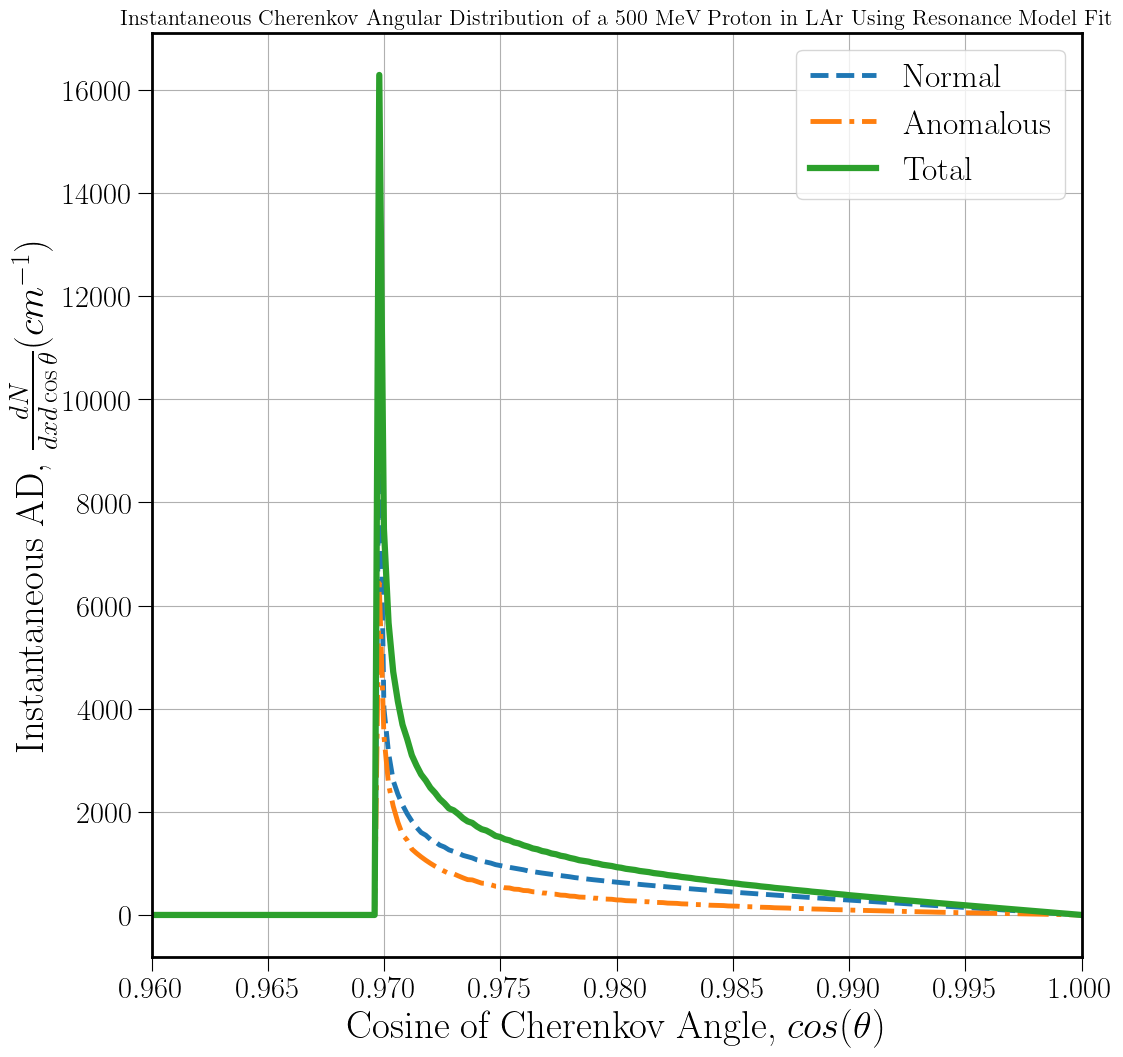

In [652]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)


ax.set_title(r"Instantaneous Cherenkov Angular Distribution of a 500 MeV Proton in LAr Using Resonance Model Fit", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=28)
ax.set_ylabel(r"Instantaneous AD, $\frac{dN}{dx d\cos\theta} (cm^{-1})$",fontsize=28)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)

ax.plot(x_all, func_angnc500, ls='dashed', linewidth= 3.5, label='Normal') #.format(float(j))) #normal
ax.plot(x_all, func_angac500, ls='dashdot', linewidth= 3.5, label='Anomalous') #.format(float(j))) #anomalous

ax.plot(x_all, func_angtc500, linewidth= 4.5, label='Total') #.format(float(j))) #total
    
# plt.xlim([0.99/(n_max*filtered_betalist[0]), 1])
# plt.ylim(0,0.2e7)
plt.xlim(0.96,1)

ax.grid()

# #     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=24) #loc='best' ,framealpha=None,shadow=True
plt.savefig('AD_Cherenkov_HOmodel_500MeV.jpg', bbox_inches= "tight") 
    

C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1724153887.py:146: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1724153887.py:188: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 450 Mev Proton in LAr: 0.389
Total Cerenkov photons emitted by a 500 Mev Proton in LAr: 200.542
Total Cerenkov photons emitted by a 600 Mev Proton in LAr: 2670.212
Total Cerenkov photons emitted by a 700 Mev Proton in LAr: 9486.070
Total Cerenkov photons emitted by a 800 Mev Proton in LAr: 22241.969
Total Cerenkov photons emitted by a 1000 Mev Proton in LAr: 62094.038
Total Cerenkov photons emitted by a 1200 Mev Proton in LAr: 116259.639
Total Cerenkov photons emitted by a 1500 Mev Proton in LAr: 216147.885
Total Cerenkov photons emitted by a 2000 Mev Proton in LAr: 412182.522
Total Cerenkov photons emitted by a 2500 Mev Proton in LAr: 628821.502
Total Cerenkov photons emitted by a 3000 Mev Proton in LAr: 856484.543
[[450, 0.3893988858512326], [500, 200.54196066548536], [600, 2670.2120077632144], [700, 9486.069895733595], [800, 22241.96917969575], [1000, 62094.038447192426], [1200, 116259.63945778129], [1500, 216147.88484624555], [2000, 412182.522033

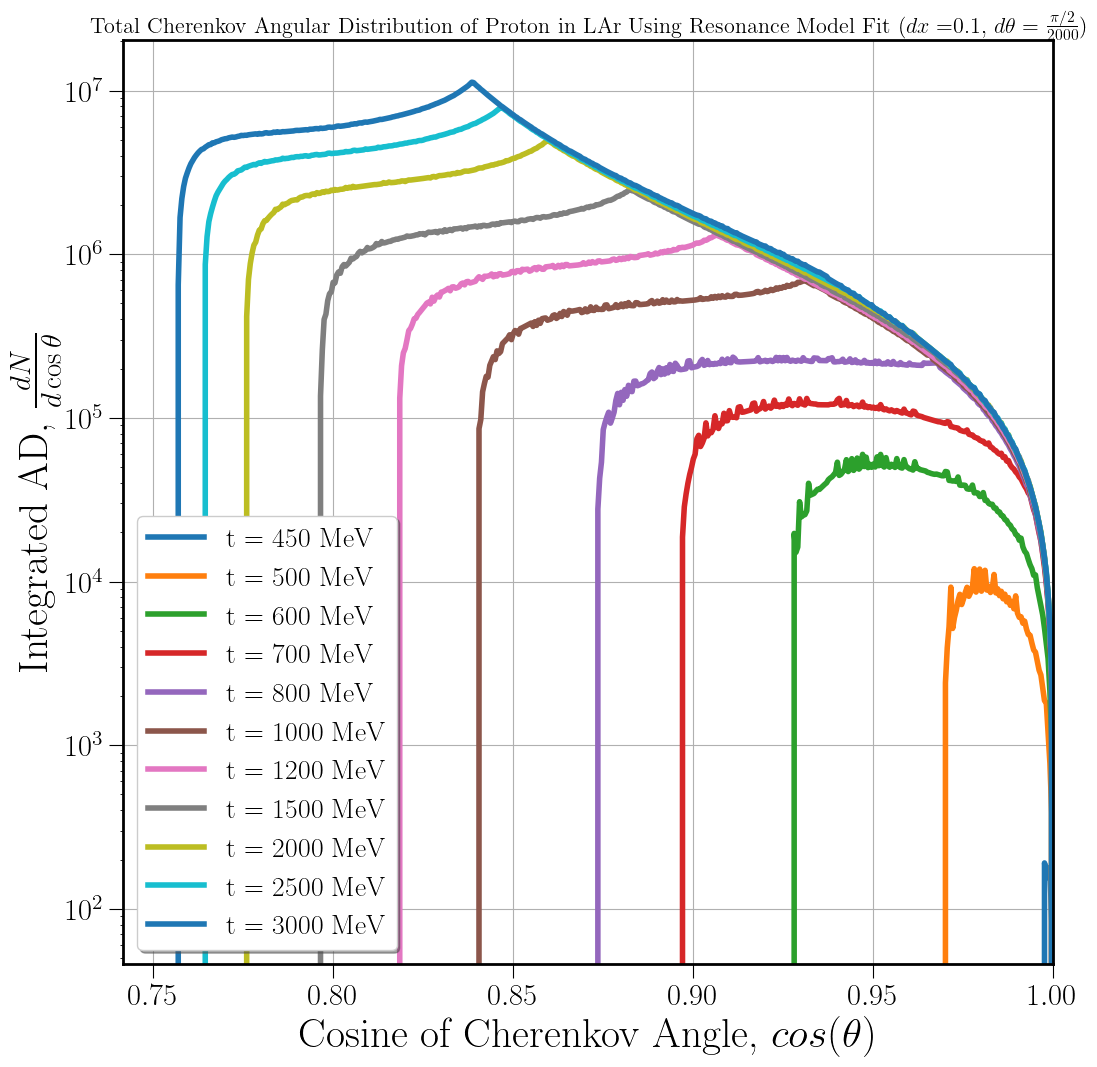

In [791]:
#Integrated AD with HO fit: T MeV 

from scipy.misc import derivative

# t = np.array([10,100,150,200,250,300,383.96,400,450,500,550,600,650,697.678,700,750,800,850,900,950,1000,1050,1100,1200,1300,1400,1500,1600]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([400, 500, 800]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t = np.array([440,450,460,470,475,480,490,500])
# t = 500
dx = 0.1 #cm

alpha = 1/137
mp = 938  #Proton's mass in MeV
beta  = np.sqrt(1 - (1/(1 + t/mp)**2)) #Relativistic Approach 
# y = 1/beta
# y = np.linspace(y,y,2000)   #wavelength of light 

mp = 938  #Proton's mass in MeV

lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 
lamd = np.linspace(90,700,2000)

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV
n_500 = 1.2278


# print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))


cerenkovanglist = []

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
        return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []
    

t = np.array([450,500,600,700,800,1000,1200,1500,2000,2500,3000]) #initial  K.E of the proton in MeV 600,700,800,900,1000

#TeX up labels and text:

plt.rc("text", usetex=True)
plt.rcParams['text.latex.preamble'] = r'\usepackage{graphicx}'
plt.rc('font', size=24) 
plt.rc('font', family='serif')

#     matplotlib.rcParams['text.latex.preamble'] = [r'\boldmath']
plt.rcParams["font.weight"] = "bold"     
#     plt.rcParams["axes.labelweight"] = "bold"
plt.rc('axes', linewidth=2)



fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)

ax.set_title(r"Total Cherenkov Angular Distribution of Proton in LAr Using Resonance Model Fit ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)", fontsize= 16) # ($dx=$0.1, $d\theta=\frac{\pi/2}{2000}$)
ax.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
ax.set_ylabel(r"Integrated AD, $\frac{dN}{d\cos\theta}$",fontsize=30)
ax.tick_params(axis='both',which='major',labelsize=22,length=10)
ax.grid()



cerenkovfinallistho = []
cerenkovtsumallts = []

for j in t: 
    cerenkovtlist = []
    # cerenkovsum = 0
    cerenkovangnsumallt = [0 for x in x_all]
    cerenkovangasumallt = [0 for x in x_all]

    cerenkovangtsumallt = [0 for x in x_all]

#     print(j)
#     print(make_betalist(j))
    
    mybetalist = make_betalist(j,0,0.1)
    filtered_lst_res = [x for x in mybetalist if x > 0.735294]
    # print(filtered_lst_res)
    
    for i in filtered_lst_res:  #[0:20]

        cos_ang_min = 1/(i * n_peakr)
        cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
        cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

        # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

        
        def func_angn(x):  #Normal AD_
        
            if x >= cos_ang_min and x <= cos_ang_maxn:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()
           
                    
                # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    # lmin = lamd[min(idx)]
                    lmax = lamd[max(idx)] #lamd[idx[1]]
            
                # if 1/(i*x) <= n_500:
                    # lmin = max(lamd[min(idx)], 106.67)
                    # lmax = 500            

                # lamdminr.append(lmin)
                lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)
        
            else: 
                return 0 #To avaid getting negative contribution 

        func_angnc = [func_angn(x) for x in x_all]  
        # print(x_all, func_angnc)
        # plt.plot(x_all, func_angnc)
            
            
    
        def func_anga(x):  #Anomalous AD
        
            if x >= cos_ang_min and x <= cos_ang_maxa:
            
                y= 1/(i*x)
                y = np.linspace(y,y,2000)   #wavelength of light 
                # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                funclamd = n_jacksonr - y
                idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

            
               # if 1/(i*x) > n_peakr:
                   # lmin = lamd_peakr
                   # lmax = lamd_peakr
            
                if 1/(i*x) < n_peakr:   
                    lmin = lamd[min(idx)]  #, 106.67)
                   # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]
            
                # if 1/(i*x) <= n_uvr:
                    # lmin = 106.67
                    #     # lmax = 500        
                    
                lamdminr.append(lmin)
                # lamdmaxr.append(lmax)
        
                # print(j, i, lamdminr, lamdmaxr)
                # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))
    
                d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
            
                return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)
    
            else: 
                return 0 #To avaid getting negative contribution 

        func_angac = [func_anga(x) for x in x_all]       
           
            
    # cerenkovangsum = cerenkovangnsum + cerenkovangasum  
           
        func_angtc = [(func_angn(x) + func_anga(x)) for x in x_all]
            
        cerenkovangnsumallt = np.add(func_angnc, cerenkovangnsumallt) 
        cerenkovangasumallt = np.add(func_angac, cerenkovangasumallt) 
        cerenkovangtsumallt = np.add(func_angtc, cerenkovangtsumallt)
            # func_angtc = func_angnc + func_angac 
    cerenkovfinallistho.append(cerenkovtlist)
    cerenkovtsumallts.append(sum(cerenkovangtsumallt) * (dx/0.1)/2000) #conversion factor to standard units
    # print(x_all, cerenkovangtsum)

    # plt.plot(x_all, cerenkovangnsum)
    # plt.plot(x_all, cerenkovangasum)
        
        # ax.plot(x_all, cerenkovangnsum, label='t = {} MeV'.format(float(j)))

    print("Total Cerenkov photons emitted by a {} Mev Proton in LAr: {:.3f}" .format(j, sum(cerenkovangtsumallt) * (dx/0.1)/2000)) #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*
    # ax.grid()

    ax.plot(x_all, cerenkovangtsumallt* (dx/0.1), lw= 4, label='t = {} MeV'.format(j))
    
    plt.yscale("log")
    
    # plt.xlim(0.74,1)
    plt.xlim([0.98/(n_peakr*filtered_lst_res[0]), 1])

list_ad = list(map(list, list(zip(t, cerenkovtsumallts))))
print(list_ad)
    
#     ax.text(0.94,1e2,r'dx={} cm'.format(dx),fontsize=16)
ax.legend(loc='best',fontsize=20,framealpha=None,shadow=True) #loc='best'fig = plt.figure(figsize=(12,12))
# plt.savefig('AD_HO_resonancefit_allTsnew_dxp1dth2k_logplot.jpg', bbox_inches="tight")
# print(t, sum(cerenkovangtsumallt) * (dx/0.1)/2000)


['costheta', 'normal500', 'anomalous500', 'total500']
[0.00000000e+00 5.00250125e-04 1.00050025e-03 ... 9.98999500e-01
 9.99499750e-01 1.00000000e+00]
[  0.           0.           0.         ... 815.41580483 401.85100588
   0.        ]


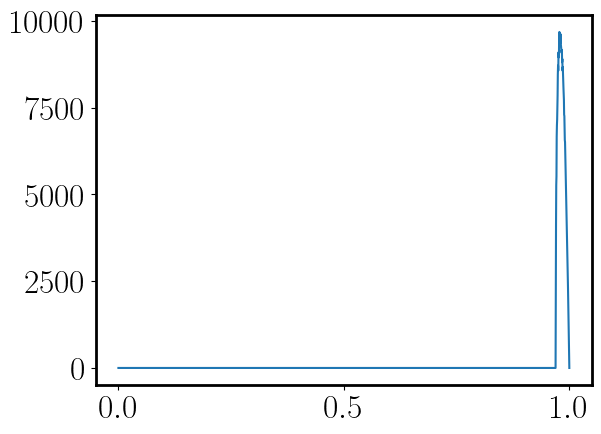

In [48]:
import numpy as np

# Load the .npz file
data = np.load('Cherenkov Data files\\npz\\cerenkovdata500.npz')

# List the names of the arrays in the file
print(data.files)

# Access a specific array
costheta = data['costheta']
total = data['total500']
# scint = data['scint500']
# Use the arrays
print(costheta)
print(total)

plt.plot(costheta, total)

# Close the file
# data.close()

In [480]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation (500 MeV)

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 500 MeV Proton in LAr", fontsize= 20)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)
#     colors_all =) ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    colors_all = ['lime','crimson','hotpink','green','dimgray'] 
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approximate(SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='Exact(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    # Plot sigma ticks on the right twin axis
    scint_value = 40000*500*0.275
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 14  # How many sigmas to plot
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    plt.savefig('signal_over_background_500MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200
    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=15, tm_hour=1, tm_min=24, tm_sec=35, tm_wday=4, tm_yday=258, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\469552733.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\469552733.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 500 Mev Proton in LAr from Resonance MOdel fit: 200.159
Total Cerenkov photons emitted by a 500 Mev Proton in LAr using Apprx (PVS) fit: 912.567


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\469552733.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\469552733.py:265: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * la

Total Cerenkov photons emitted by a 500 Mev Proton in LAr from Grace fit: 17393.786
Total Cerenkov photons emitted by a 500 Mev Proton in LAr using Babicz fit: 10503.681
5500000.0 5500000.0


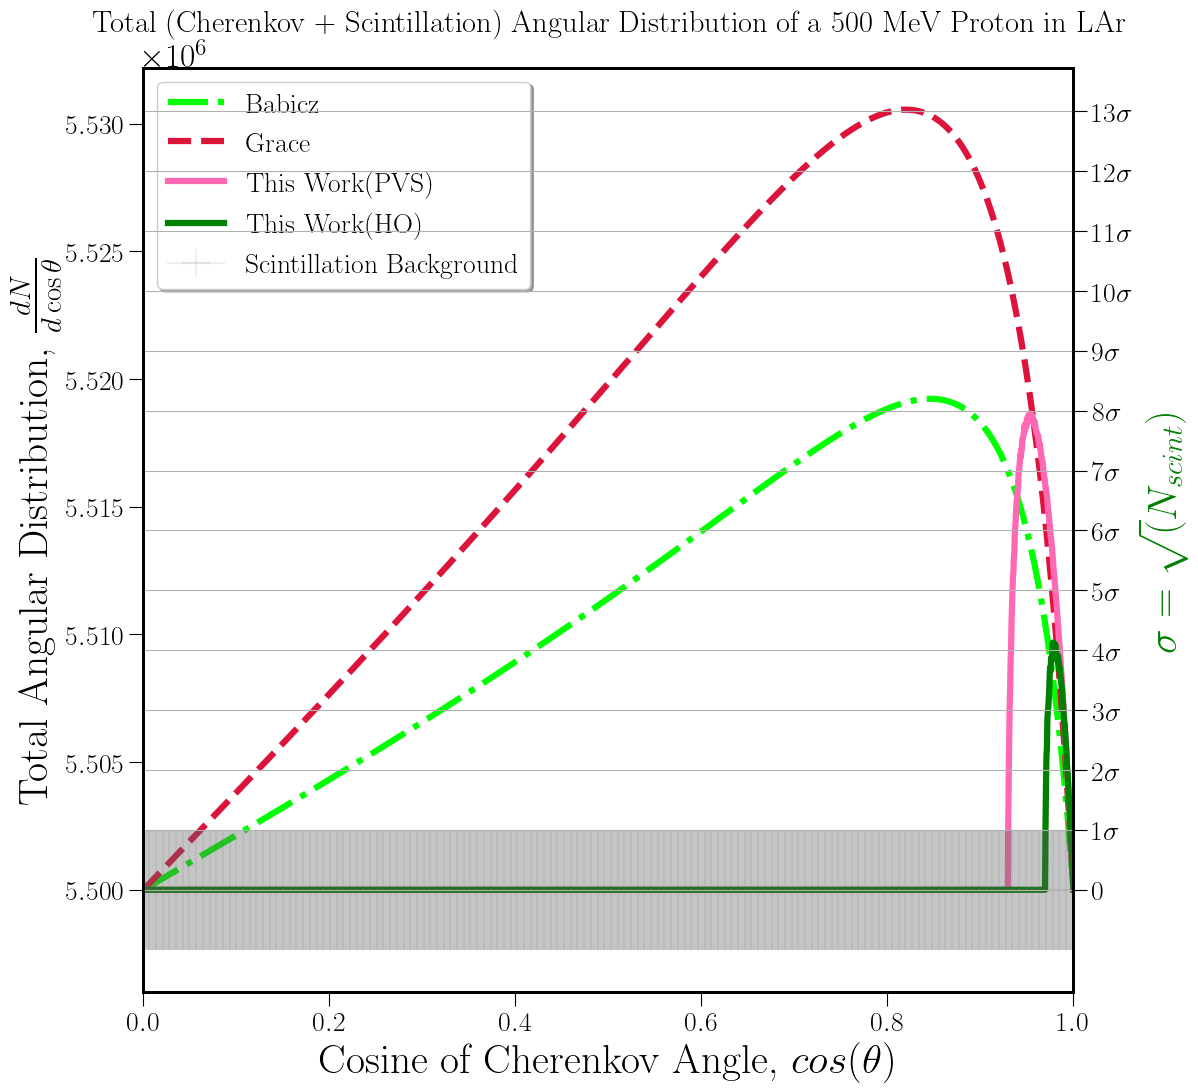

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=15, tm_hour=1, tm_min=55, tm_sec=57, tm_wday=4, tm_yday=258, tm_isdst=0)


In [481]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [497]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation 600 MeV

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([600]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000


def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 600 MeV Proton in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)
    # colors_all =) ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] 
    colors_all = ['red','cyan','deeppink','orange','dimgray'] 
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approximate(SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='Exact(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)
    
    t=600
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 26 # How many sigmas to plot
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    plt.savefig('signal_over_background_600MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200
    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))
   

n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=15, tm_hour=2, tm_min=52, tm_sec=45, tm_wday=4, tm_yday=258, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1978316719.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1978316719.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 600 Mev Proton in LAr from Resonance MOdel fit: 2669.057
Total Cerenkov photons emitted by a 600 Mev Proton in LAr using Apprx (PVS) fit: 4455.703


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1978316719.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1978316719.py:265: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 600 Mev Proton in LAr from Grace fit: 28730.074
Total Cerenkov photons emitted by a 600 Mev Proton in LAr using Babicz fit: 17863.250
6600000.000000001 6600000.000000001


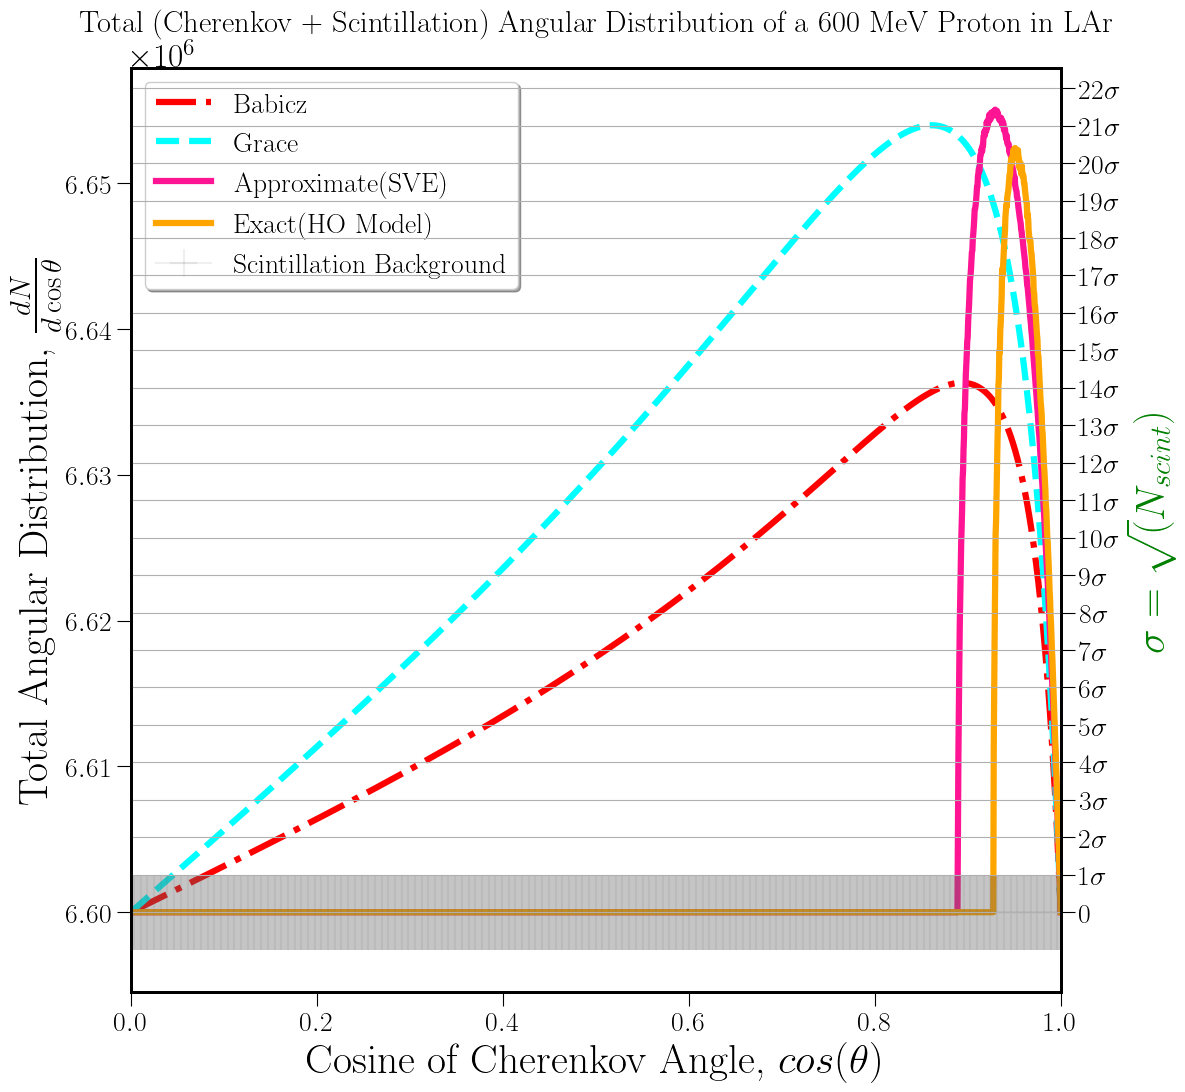

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=15, tm_hour=3, tm_min=39, tm_sec=53, tm_wday=4, tm_yday=258, tm_isdst=0)


In [498]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [699]:
''# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation 700 MeV

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
t_arr = np.array([700])
# t_arr = np.array([800])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 700 MeV Proton in LAr", fontsize= 22)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
       
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approximate(SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='Exact(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    # sigma = 4
    # num_ticks = 21
    # ax1.set_ylim(0,(num_ticks-1)*sigma)
    # sigma_tick_locations = np.arange(0, num_ticks*sigma, 5*sigma) # Create a list of the tick positions
    # sigma_tick_number = np.arange(0, (num_ticks-1)/4)
    # sigma_tick_labels = np.array([r'${}\sigma$'.format(num) for num in sigma_tick_number])  #Create matching list of labels from the list of numbers of sigmas
    # ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    # ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    t=700 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    
#     #1 \sigma increment
#     sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
#     ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
#     ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    num_ticks = 51 # How many sigmas to plot

    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 5)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(5, num_ticks-1, 5)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    plt.savefig('signal_over_background_700MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_800MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=20, tm_hour=21, tm_min=29, tm_sec=52, tm_wday=2, tm_yday=263, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:163: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:202: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 700 Mev Proton in LAr from Resonance MOdel fit: 9526.764
Total Cerenkov photons emitted by a 700 Mev Proton in LAr using Apprx (PVS) fit: 12399.387


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:267: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1601217613.py:267: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 700 Mev Proton in LAr from Grace fit: 44575.405
Total Cerenkov photons emitted by a 700 Mev Proton in LAr using Babicz fit: 29163.899
7700000.000000001 7700000.000000001


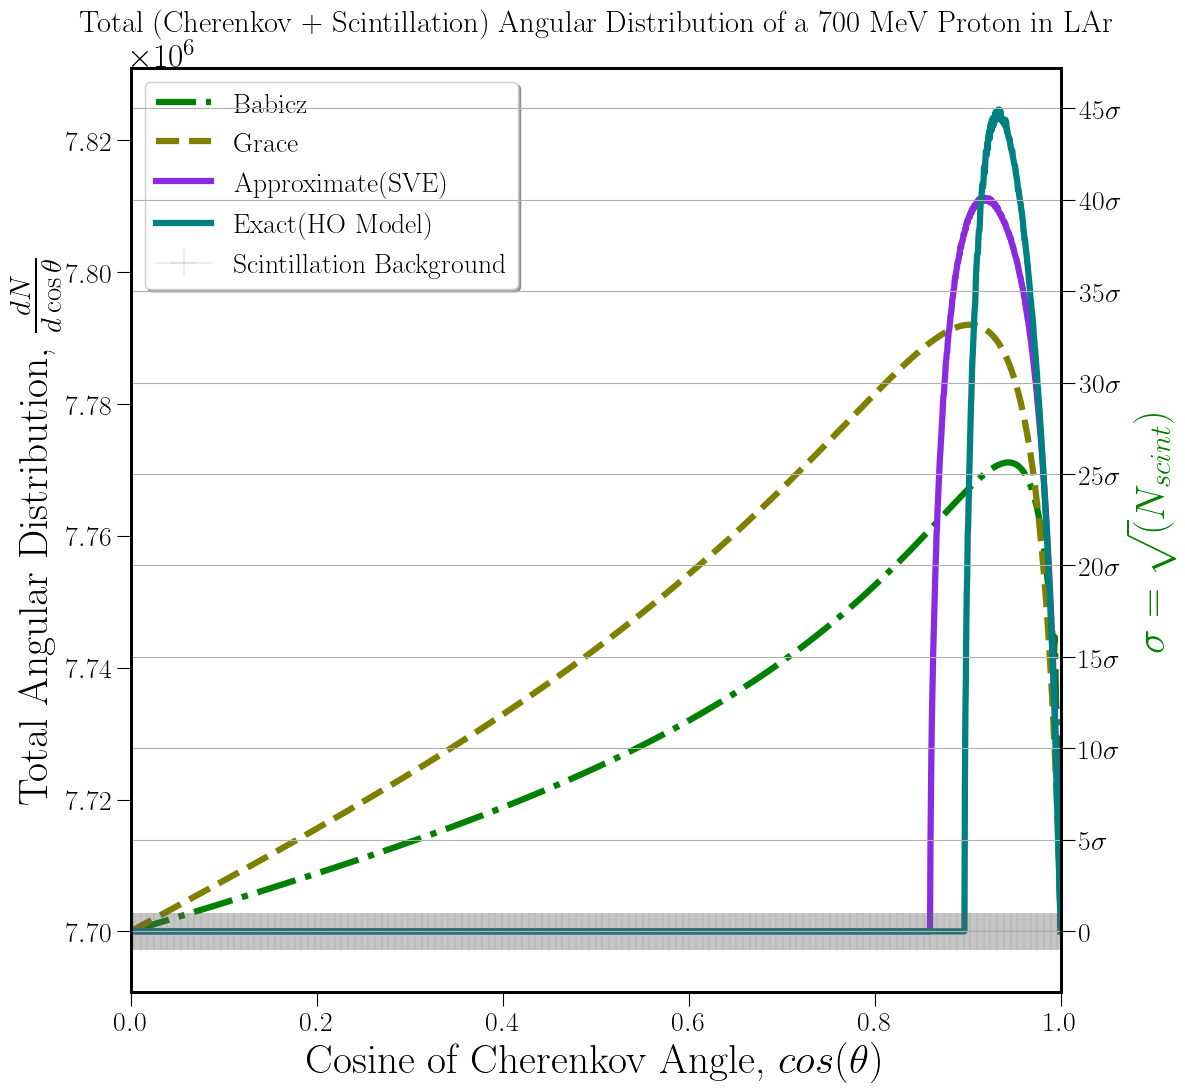

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=20, tm_hour=22, tm_min=32, tm_sec=58, tm_wday=2, tm_yday=263, tm_isdst=0)


In [700]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [717]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
dx = 0.1
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([800])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 800 MeV Proton in LAr", fontsize= 21)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
       
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx (SVE)', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='Exact (HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)
    
    # sigma = 4
    # num_ticks = 21
    # ax1.set_ylim(0,(num_ticks-1)*sigma)
    # sigma_tick_locations = np.arange(0, num_ticks*sigma, 5*sigma) # Create a list of the tick positions
    # sigma_tick_number = np.arange(0, (num_ticks-1)/4)
    # sigma_tick_labels = np.array([r'${}\sigma$'.format(num) for num in sigma_tick_number])  #Create matching list of labels from the list of numbers of sigmas
    # ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    # ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    t=800 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 181 # How many sigmas to plot

    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 10)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(10, num_ticks-1, 10)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_800MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=20, tm_hour=23, tm_min=48, tm_sec=11, tm_wday=2, tm_yday=263, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:163: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:202: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 800 Mev Proton in LAr from Resonance MOdel fit: 22195.923
Total Cerenkov photons emitted by a 800 Mev Proton in LAr using Apprx (PVS) fit: 27339.532


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:267: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\919277586.py:267: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * la

Total Cerenkov photons emitted by a 800 Mev Proton in LAr from Grace fit: 67240.407
Total Cerenkov photons emitted by a 800 Mev Proton in LAr using Babicz fit: 47491.966
8800000.0 8800000.0


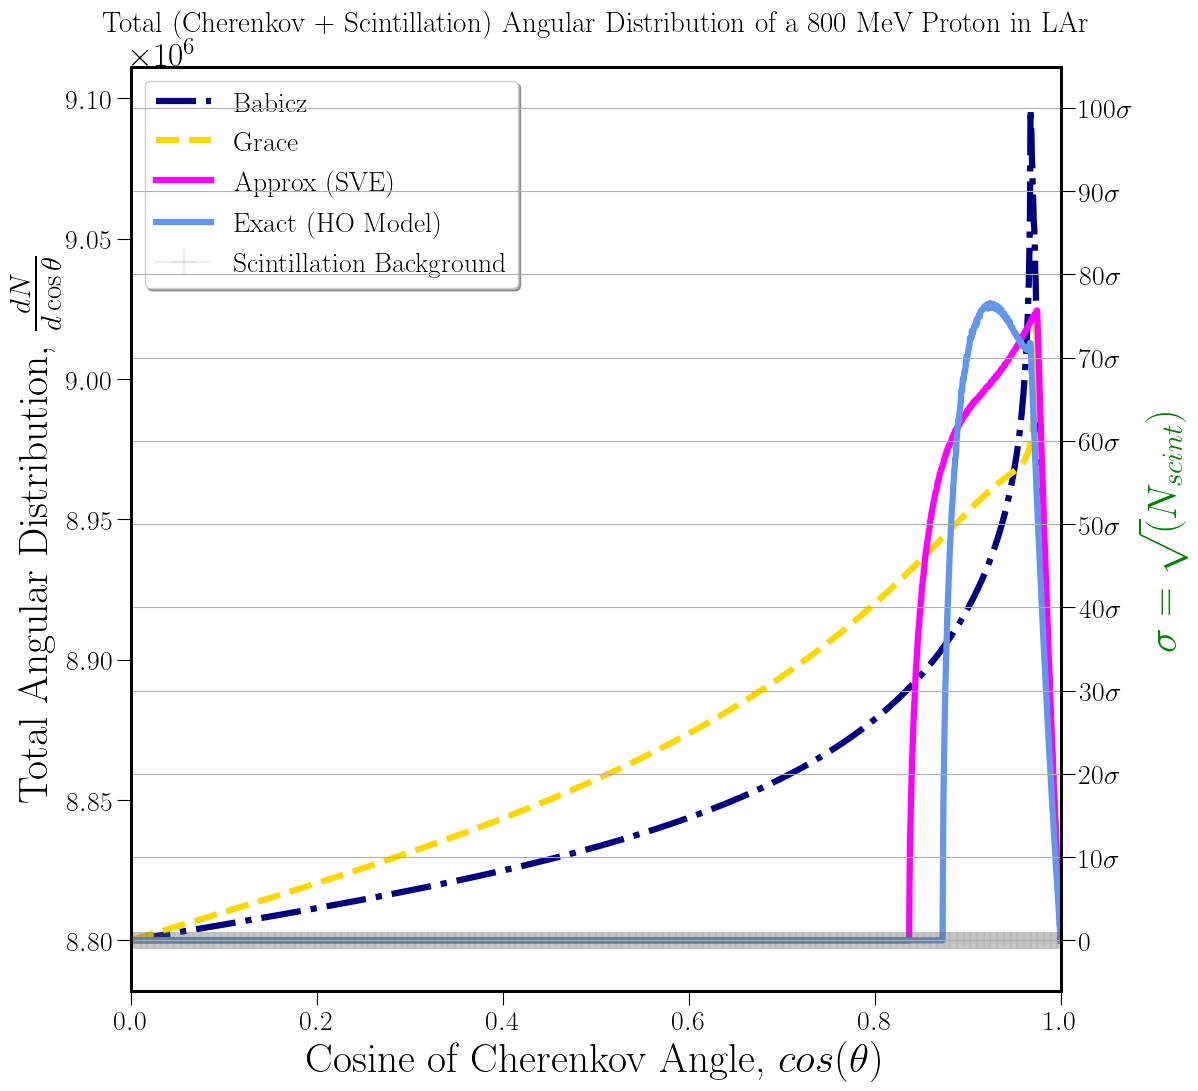

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=1, tm_min=28, tm_sec=44, tm_wday=3, tm_yday=264, tm_isdst=0)


In [718]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [731]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([1000])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 1000 MeV Proton in LAr", fontsize= 21)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
    colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #1000 MeV 'brown','purple'
       
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    t=1000 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 351 # How many sigmas to plot
       
    # 25*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 25)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(25, num_ticks-1, 25)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_1000MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=4, tm_min=40, tm_sec=57, tm_wday=3, tm_yday=264, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:163: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:202: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 1000 Mev Proton in LAr from Resonance MOdel fit: 62030.343
Total Cerenkov photons emitted by a 1000 Mev Proton in LAr using Apprx (PVS) fit: 76163.712


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:267: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1360842741.py:267: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 1000 Mev Proton in LAr from Grace fit: 131511.873
Total Cerenkov photons emitted by a 1000 Mev Proton in LAr using Babicz fit: 102751.991
11000000.0 11000000.0


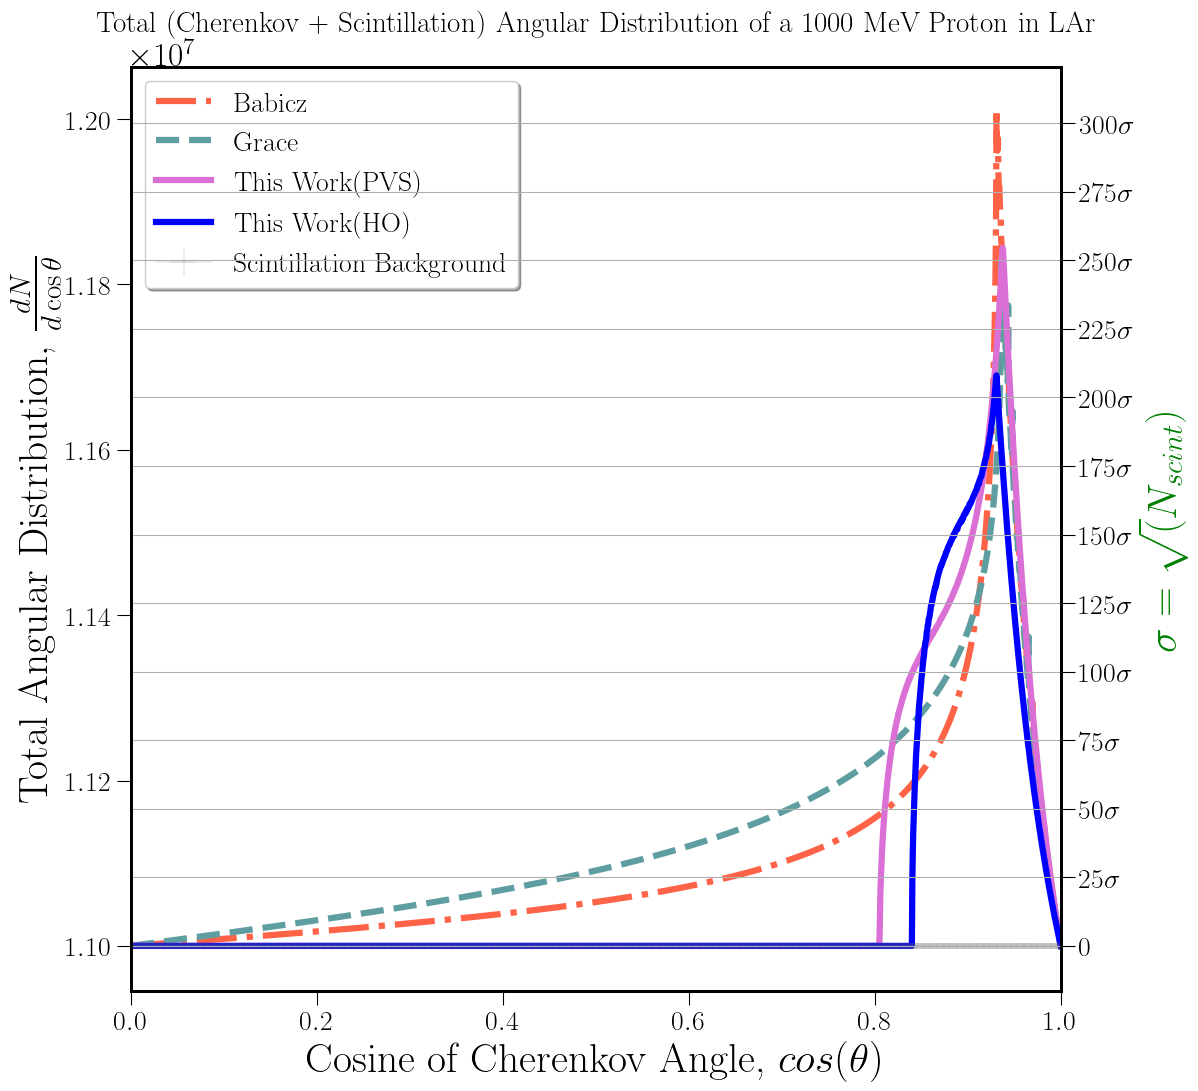

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=7, tm_min=8, tm_sec=53, tm_wday=3, tm_yday=264, tm_isdst=0)


In [732]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [761]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([1200])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 1200 MeV Proton in LAr", fontsize= 20)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #600 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #1000 MeV 'brown','purple'
    colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #1200 MeV   
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    t=1200 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 801 # How many sigmas to plot
    
#     #1 \sigma increment
#     sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
#     ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
#     ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 100)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(100, num_ticks-1, 100)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_1200MeV_allfitsnew_p01.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=8, tm_min=20, tm_sec=35, tm_wday=3, tm_yday=264, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 1200 Mev Proton in LAr from Resonance MOdel fit: 116268.126
Total Cerenkov photons emitted by a 1200 Mev Proton in LAr using Apprx (PVS) fit: 143554.795


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:266: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\3463335706.py:266: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 1200 Mev Proton in LAr from Grace fit: 213969.943
Total Cerenkov photons emitted by a 1200 Mev Proton in LAr using Babicz fit: 176203.342
13200000.000000002 13200000.000000002


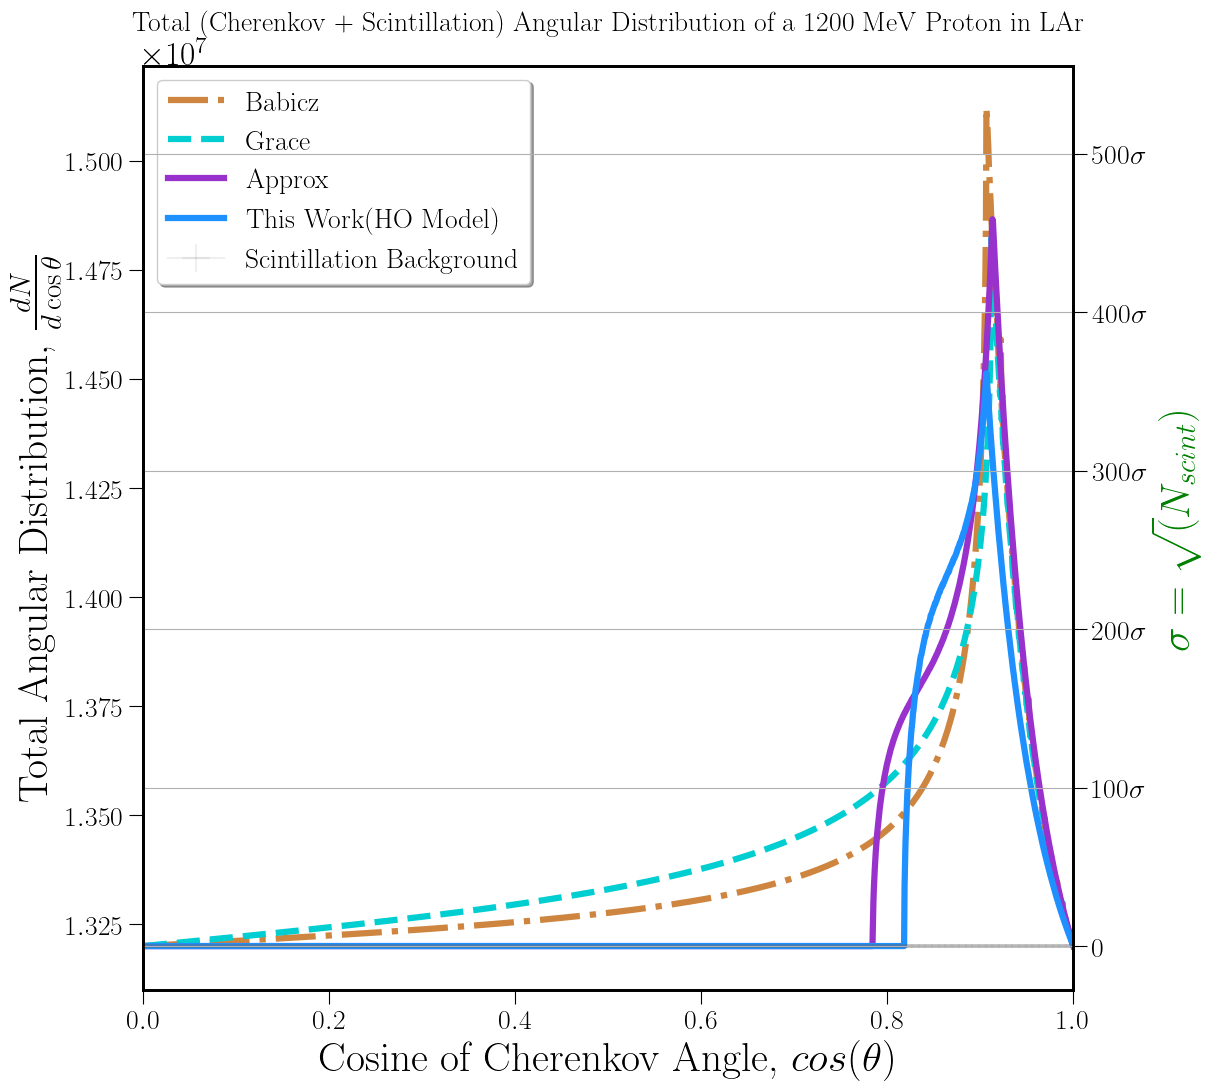

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=12, tm_min=4, tm_sec=31, tm_wday=3, tm_yday=264, tm_isdst=0)


In [762]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.01,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


In [765]:
# Angular Distribution of Cerenkov Radiation: All Fits + Scintillation

alpha = 1/137 #Fine-structure (EM coupling) constant 

# lamd = np.linspace(0,700,2000)   #wavelength of light 
# lamd_peak = 115.11 #where n is max 

#Babics: 
    
#T = 90 K
a_0b = 0.334 
a_uvb = 0.100
a_irb = 0.008
lamd_uv = 106.6 #lambda_UV = 106.6 nm
lamd_ir = 908.3 #lambda_IR = 908.3 nm 

#Grace, Nikkel: 
    
#T = 90 K
a_0g = 1.26 
a_uvg = 0.23
a_irg = 0.0023

#Our (PVS) Fit: 
    
alpha = 1/137 #Fine-structure (EM coupling) constant 
a_0 = 1.18416
a_pvs = 0.000325985
gamma = 0.000693652
n_max = 1.4191220261503081

#HO/Jackson fit parameters
a_0j = 1.10232
a_j = 0.0000105811
gamma_j = 0.0025239

lamd_peakr = 124.68 #nm
n_peakr = 1.3605 #res model peak


theta = np.linspace(0, np.pi/2, 2000)
x_all = np.linspace(0, 1, 2000)
x = np.cos(theta)
# z = np.cos(theta)


lamd = np.linspace(90,700,2000)

n_asymtoter = a_0j + a_j * lamd_uv**2  #When lamd-> inf
n_uvr = a_0j #when lamd -> lamd_UV

print("n_uv = {}, n_peak = {}, n_asymtote = {}".format(n_uvr, n_peakr, n_asymtoter))

n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
# funclamd = n_jacksonr - y
# idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

#     print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamd[idx[0]], lamd[idx[1]]))

def n2_j(lamd):
    return (a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))))**2

    # d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
    # d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point
    # print("d_norm = {}, d_anom = {}".format(d_norm, d_anom))


lamdminr = []
lamdmaxr = []

# t_arr = np.array([383.96156,400,500,600,650,700,750,800]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([500]) #,900,1000]]) #initial  K.E of the proton in MeV 600,700,800,900,1000
# t_arr = np.array([700])
t_arr = np.array([1500])

def find_angular_dist(t,x,dx,plotx1,plotx2):
    
    #Scintillation 
    cerenkovangtsum = []
#     cerenkovangtsumg = []
#     cerenkovangtsumb = []
#     cerenkovangtsump = []
    
    cerenkov_all = [[] for j in t]
    
    cerenkov_allg = [[] for j in t]
    cerenkov_allb = [[] for j in t]
    cerenkov_allp = [[] for j in t]

    cerenkov_allhon = [[] for j in t]
    cerenkov_allhoa = [[] for j in t]
    cerenkov_allhot = [[] for j in t]

    scint_all = [[] for j in t]
    
#     print(np.shape(cerenkov_all))
    
    
    for j in range(len(t)): 
        
#         i+=1 #index

        cerenkovanglist = []
        cerenkovangsum = [0 for z in x_all]
        cerenkovangsumg = [0 for z in x_all]
        cerenkovangsumb = [0 for z in x_all]
        cerenkovangsump = [0 for z in x_all]
        
        cerenkovangsumhon = [0 for z in x_all]
        cerenkovangsumhoa = [0 for z in x_all]
        cerenkovangsumhot = [0 for z in x_all]
   
        mybetalist = make_betalist(t[j],x,dx) ##HO betalist
        filtered_lst_res = [y for y in mybetalist if y > 0.735294]
        # print(filtered_lst_res)
        
        # mybetalist = make_betalist(t[j],x,dx) #PVS betalist
        filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        # print(filtered_betalist)

        scintp = 40000*t[j]*0.275 #27.5% is the fast component of Scintillation & 40k scint photons/MeV lost 
        scint = np.linspace(scintp, scintp, 2000)

    
        for i in filtered_lst_res:  #[0:20]

            cos_ang_min = 1/(i * n_peakr)
            cos_ang_maxn = min(1/(i * n_500), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))
            cos_ang_maxa = min(1/(i * n_uvr), 1)  #= 1/(b * (a_0j + a_j * lamd_uv**2))

            # print("beta= {}, cos_ang_min= {}, cos_ang_maxN= {}, cos_ang_maxA= {}".format(i, cos_ang_min, cos_ang_maxn, cos_ang_maxa))

            def func_angn(x):  #Normal AD_
        
                if x >= cos_ang_min and x <= cos_ang_maxn:
            
                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()

                    
                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr
            
                    if 1/(i*x) < n_peakr:   
                        # lmin = lamd[min(idx)]
                        lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]

                        # if 1/(i*x) <= n_500:
                        #     # lmin = max(lamd[min(idx)], 106.67)
                        #     lmax = 500            

                        # lamdminr.append(lmin)
                    lamdmaxr.append(lmax)

                        # print(j, i, lamdminr, lamdmaxr)
                        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmax**2)) * ((1-x**2)/(x**3*d_norm))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchon = [func_angn(z) for z in x_all] 
            # print(x_all, func_angnc)
            # plt.plot(x_all, func_angnc)



            def func_anga(x):  #Anomalous AD

                if x >= cos_ang_min and x <= cos_ang_maxa:

                    y= 1/(i*x)
                    y = np.linspace(y,y,2000)   #wavelength of light 
                    # n_jacksonr = a_0j + (a_j * ((lamd_uv**(-2) - lamd**(-2)) / ((lamd_uv**(-2) - lamd**(-2))**2 + gamma_j**2 * lamd**(-2)))) #HO Model: Resonance
                    funclamd = n_jacksonr - y
                    idx = np.argwhere(np.diff(np.sign(funclamd))).flatten()


                    # if 1/(i*x) > n_peakr:
                    # lmin = lamd_peakr
                    # lmax = lamd_peakr

                    if 1/(i*x) < n_peakr:   
                        lmin = max(lamd[min(idx)], 106.67)
                        # lmax = min(lamd[max(idx)], 500) #lamd[idx[1]]


                    lamdminr.append(lmin)
                        # lamdmaxr.append(lmax)

        # print(j, i, lamdminr, lamdmaxr)
        # print("Numerical Method: Wavelength_min = {} nm, Wavelength_max = {} nm".format(lamdminr, lamdmaxr))

                    d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point

                    return 2*np.pi*1e6 * ((2*alpha)/(i**2*lmin**2)) * ((1-x**2)/(x**3*d_anom))   #dN/dx.dcos(theta)

                else: 
                    return 0 #To avaid getting negative contribution 

            func_angchoa = [func_anga(z) for z in x_all]
            func_angchot = [(func_angn(z) + func_anga(z)) for z in x_all]
            
            cerenkovangsumhoa = np.add(func_angchoa, cerenkovangsumhoa)
            cerenkovangsumhot = np.add(func_angchot, cerenkovangsumhot)
            
        cerenkov_allhon[j].append(cerenkovangsumhon)
        cerenkov_allhoa[j].append(cerenkovangsumhoa)
        cerenkov_allhot[j].append(cerenkovangsumhot)
        scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Resonance MOdel fit: {:.3f}" .format(t[j], (sum(cerenkovangsumhot) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*


        
                
        
        # Our Fit (PVS)
        
#         mybetalist = make_betalist(t[j],x,dx)
#         filtered_betalist = [y for y in mybetalist if y > 0.7046534357] 
        
        for b in filtered_betalist: 

            cos_ang_min = 1/(b*n_max)
#             cos_ang_max = min(((1+ (gamma**2 * lamd_uv**2))/ (a_0 * (1+ (gamma**2 * lamd_uv**2)) + (a_pvs*lamd_uv))) , 1)
            cos_ang_max = min(1/(b * (a_0 + (a_pvs * (lamd_uv**-1/(lamd_uv**-2 + gamma**2))))) , 1)


            def func_angtp(x):
                if x >= cos_ang_min and x <= cos_ang_max:
                    return (2*np.pi*1e6) * (((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) + ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))) + ((alpha/a_pvs) * ((((b*a_0**2) - (1/b)) * np.abs((gamma**2  + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)**2/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((2*a_0*a_pvs*b) * (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1))) * np.abs((gamma**2 + (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2))) + ((b*a_pvs**2*(((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)/np.abs(gamma**2 - (((-b*a_pvs*x) - ((b**2*a_pvs**2*x**2) - (4 * ((b*a_0*x) - 1) * ((b*a_0*gamma**2*x) - gamma**2)))**(1/2))/(2*((b*a_0*x) - 1)))**2)))))  #dN/dx.dcos(theta)
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtp(z) for z in x_all]       
            
            cerenkovangsump = np.add(func_angtc, cerenkovangsump) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allp[j].append(cerenkovangsump)
        # scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Apprx (PVS) fit: {:.3f}" .format(t[j], (sum(cerenkovangsump) * (dx/0.1))/2000))  #, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #GRACE AD: 
        for b in mybetalist: 

            cos_ang_ming = 0
            cos_ang_maxg = min(1/(b*np.sqrt(a_0g + a_uvg)), 1)
#             print(cos_ang_maxg)

            
            def func_angtg(x):
                if x >= cos_ang_ming and x <= cos_ang_maxg:
                    return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))                                      
                else: 
                    return 0 #To avaid getting negative contribution 

            func_angtc = [func_angtg(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumg = np.add(func_angtc, cerenkovangsumg) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allg[j].append(cerenkovangsumg)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr from Grace fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumg) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

        
        
        #BABICZ AD:        
        for b in mybetalist: 

            cos_ang_minb = 0
            cos_ang_maxb = min((np.sqrt((3 - a_0b - a_uvb)/(3 + 2*a_0b + 2*a_uvb)))/b , 1)

#             print(cos_ang_maxg)

            
            def func_angtb(x):
                if x >= cos_ang_minb and x <= cos_ang_maxb:
                    return (2*np.pi*1e6) * (alpha/(9 * a_uvb * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)
                else: 
                    return 0 #To avaid getting negative contribution 
                
#             def func_ang_babics(x):
            
#                 lamd_thetab = (np.sqrt(((a_0b - 3) + (b**2 * x**2 * (3 + 2*a_0b))) / ((b**2 * x**2 * (3 + 2*a_0b + 2*a_uvb)) - (3 - a_0b - a_uvb))) * lamd_uv)

#                 func_ang_babics = (2*np.pi*1e6) * (alpha/(9 * a_uvb * lamd_thetab**3 * lamd_uv**2)) * (b * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2)) / (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2)) - (1/b)) * (((3 + 2*a_0b + 2*a_uvb) * lamd_thetab**2) - ((2*a_0b + 3) * lamd_uv**2))**(1/2) * (((3- a_0b - a_uvb) * lamd_thetab**2) + ((a_0b - 3) * lamd_uv**2))**(3/2)

            func_angtc = [func_angtb(z) for z in x_all]   
#             print(func_angtc)

            cerenkovangsumb = np.add(func_angtc, cerenkovangsumb) 
            
#         print(np.shape(cerenkovangsum))
        
        cerenkov_allb[j].append(cerenkovangsumb)
#         scint_all[j].append(scint)
        
        print("Total Cerenkov photons emitted by a {} Mev Proton in LAr using Babicz fit: {:.3f}" .format(t[j], (np.nansum(cerenkovangsumb) * (dx/0.1))/2000) )#, sum(cerenkovangsum)/5000 (1e6 * dx/0.1)*

       
        
    #Make plot:
    
    fig = plt.figure(figsize=(12,12))
    ax1 = fig.add_subplot(111)
#     ax2 = fig.add_subplot(111)
    ax2 = ax1.twinx()

    
    ax1.set_title(r"Total (Cherenkov + Scintillation) Angular Distribution of a 1500 MeV Proton in LAr", fontsize= 20)
    ax1.set_xlabel(r"Cosine of Cherenkov Angle, $cos(\theta)$ ",fontsize=30)
    ax1.set_ylabel(r"Total Angular Distribution, $\frac{dN}{d\cos\theta}$",fontsize=30)
    ax2.set_ylabel('$\\sigma= \sqrt(N_{scint})$',fontsize=30, color='g')

#     ax2.grid()
    ax1.tick_params(axis='both',which='major',labelsize=20,length=10)
    ax2.tick_params(axis='both',which='major',labelsize=20,length=10)
    
#     ax.tick_params(axis='both',which='major',labelsize=16,length=10)

#     colors_all = ['tomato','cadetblue','brown','purple','red','orange','yellow','green','cyan','royalblue','navy','blueviolet','grey'] 
    # colors_all = ['lime','crimson','hotpink','green','dimgray'] #500 MeV
    # colors_all = ['red','cyan','deeppink','orange','dimgray'] #600 MeV
    # colors_all = ['green','olive','blueviolet', 'teal', 'dimgrey'] #700 MeV
    # colors_all = ['navy','gold','magenta','cornflowerblue','dimgrey']  #800 MeV
    # colors_all = ['tomato','cadetblue','orchid','b','dimgrey']  #1000 MeV 'brown','purple'
    # colors_all = ['peru','darkturquoise','darkorchid','dodgerblue','dimgrey']  #1200 MeV   
    colors_all = ['aqua','crimson','fuchsia','mediumslateblue','dimgrey']  #1500 MeV   
    
       
#     colors_all = ['cadetblue','brown','purple','red','orange', 'green','cyan','royalblue', 'navy','blueviolet']
    
    for k in range(len(cerenkov_all)):
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allb[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashdot', label='Babicz', c=colors_all[k]) #linewidth= 4,label='t = {} MeV'.format(float(t[k])) #Babicz
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allg[k][0])+scint_all[k][0], linewidth= 4.5, ls='dashed', label='Grace', c=colors_all[k+1]) #linewidth= 4, #Grace
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allp[k][0])+scint_all[k][0], linewidth= 4.5, label='Approx', c=colors_all[k+2]) #PVS
        ax1.plot(x_all, ((dx/0.1)*cerenkov_allhot[k][0])+scint_all[k][0], linewidth= 4.5, label='This Work(HO Model)', c=colors_all[k+3]) #HO
#         plt.plot(x_all, np.sqrt(scint_all[k][0]), c=colors_all[k])  #label='t = {} MeV'.format(float(t[k]))
        ax1.errorbar(x_all, scint_all[k][0], xerr=0, yerr=np.sqrt(scint_all[k][0]), c=colors_all[k-1], alpha=0.1, label='Scintillation Background')   #,label='t = {} MeV'.format(float(t[k])) #Scintillation
#         plt.plot(x_all, scint_all[k][0],c=colors_all[k],ls='--')
        print(np.min(scint_all[k][0]), np.max(scint_all[k][0]))
    
#         plt.plot(x_all,np.sqrt(scint_all[k][0]))
        
        
    ax2.grid()
#     plt.yscale("log")
    plt.xlim([plotx1,plotx2])
    ax1.legend(loc='best',fontsize=20,framealpha=None,shadow=True)
#     plt.savefig('Angular_dist_protons.png',dpi=200)
#     plt.ylim(4e6,6e6)
#     plt.ylim(5.4e6,5.6e6)

    t=1500 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    # Plot sigma ticks on the right twin axis
    scint_value = 40000*t*0.275 ###NEED AUTOMATION BY REPLACING AN ARRAY: T_ARR 
    sigma = np.sqrt(scint_value)  # Value of sigma
    num_ticks = 1001 # How many sigmas to plot
    
#     #1 \sigma increment
#     sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
#     sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(1, num_ticks)]))  # Create matching list of labels from the list of numbers of sigmas
#     ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
#     ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!
    
    # 5*\sigma increment
    sigma_tick_locations = np.array([scint_value + num*sigma for num in np.arange(0, num_ticks-1, 100)]) #np.arange(scint_value, scint_value + (num_ticks)*sigma-0.1, sigma)  # Create a list of the tick positions
    sigma_tick_labels = np.append(np.array(['0']), np.array([r'${}\sigma$'.format(num) for num in np.arange(100, num_ticks-1, 100)]))  # Create matching list of labels from the list of numbers of sigmas
    ax2.set_yticks(ticks=sigma_tick_locations, labels=sigma_tick_labels)  # Place the ticks with the given labels
    ax2.set_ylim(ax1.get_ylim())  # Force the right axis ticks to align with the left axis -- IMPORTANT!!!

    
    # plt.savefig('signal_over_background_50MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    # plt.savefig('signal_over_background_700MeV_allfitsnew.jpg', bbox_inches="tight") #,dpi=200
    plt.savefig('signal_over_background_1500MeV_allfitsnew_p1.jpg', bbox_inches="tight") #,dpi=200

    plt.show()
    
#     plt.xlim(0.8,1)
# plt.plot(theta, cerenkovangsum/(2*pi))


n_uv = 1.10232, n_peak = 1.3605, n_asymtote = 1.222558964716


started:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=23, tm_min=12, tm_sec=19, tm_wday=3, tm_yday=264, tm_isdst=0)


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:162: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_norm = np.abs(derivative(n2_j, lmax, dx=1e-6)) #value of normal derivative at a given point
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:201: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  d_anom = np.abs(derivative(n2_j, lmin, dx=1e-6)) #value of anomalous derivative at a given point


Total Cerenkov photons emitted by a 1500 Mev Proton in LAr from Resonance MOdel fit: 216147.565
Total Cerenkov photons emitted by a 1500 Mev Proton in LAr using Apprx (PVS) fit: 268010.188


C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:266: RuntimeWarning: divide by zero encountered in scalar divide
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)) - (1/b)) * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2)**(3/2) *  (np.sqrt(a_0g * ((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2-lamd_uv**2) + a_uvg * (np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**2)/((np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * lamd_uv)**3*lamd_uv**2))
C:\Users\hrrah\AppData\Local\Temp\ipykernel_11432\1557629153.py:266: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*np.pi*1e6*(alpha/a_uvg) * ((b*a_0g) + ((b*a_uvg*(np.sqrt((a_0g*b**2*x**2 - 1)/((a_0g + a_uvg)*b**2*x**2 - 1)) * 

Total Cerenkov photons emitted by a 1500 Mev Proton in LAr from Grace fit: 360716.438
Total Cerenkov photons emitted by a 1500 Mev Proton in LAr using Babicz fit: 309667.608
16500000.000000002 16500000.000000002


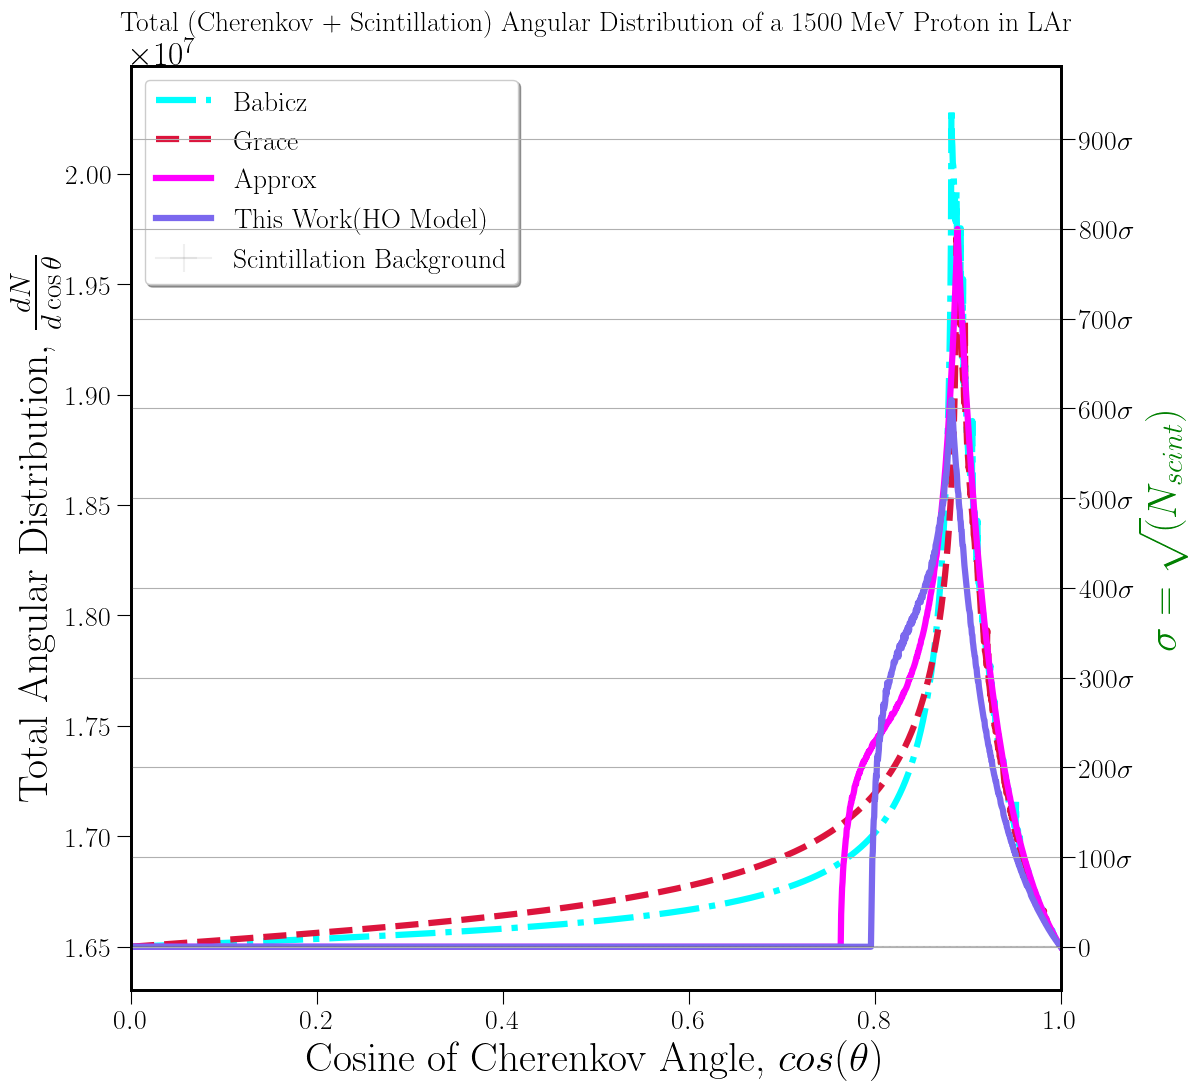

ended:  time.struct_time(tm_year=2023, tm_mon=9, tm_mday=21, tm_hour=23, tm_min=40, tm_sec=38, tm_wday=3, tm_yday=264, tm_isdst=0)


In [767]:

################### RUN THE FUNCTION: All Fit (Latest)

print('started: ', time.gmtime())

find_angular_dist(t_arr,x=0,dx=0.1,plotx1=0,plotx2=1)

print('ended: ', time.gmtime())


# Muons Wavelength Solutions & AD 